# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [2]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import platform

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [4]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [5]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Laser Data/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [6]:
print(Computer, folder, rootfolder)

SciClone /sciclone/scr10/dchendrickson01/Laser Data/ /sciclone/home20/dchendrickson01/


In [7]:
#Extra Headers:
import os as os
import statistics as st
import random
#import multiprocessing
#from joblib import Parallel, delayed
import time
import CoreFunctions as cf
import pywt
import scipy.signal as signal
from matplotlib import ticker

my_cmap = plt.get_cmap('gray')

In [8]:
# Directory = './Data'
#Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(folder)

In [9]:
wvlt = 'db3'

In [10]:
for i in range(len(files)):
    print(i,files[i])

0 stack 27 moving away rom close.csv
1 Satck 25 starting to hoist.csv
2 stack 27 accelerating out of tz.csv
3 Stack 25 accelerating away end of transfer zone.csv
4 stack 25 leaving waterside transfer 1.csv
5 Stack 25 both cranes moving away, half speed by center anchor.csv
6 stack 27 bar impacting 20 foot contaienr.csv
7 Stack 25 empty bar hoist down in transfer zone.csv
8 stack 25 spreader hitting container.csv
9 Stack 25 full speed towards me, 200 foot away, noise in track.csv
10 stack 27 slowly entering tz.csv
11 Stack 25 hoisting up.csv
12 stack 27 coming towards and slowing down 2.csv
13 Stack 25 leaving waterside transfer.csv
14 stack 27 accelerating out of tz 3.csv
15 Stack 26 both cranes moving toward, halfway down track.csv
16 stack 27 both cranes moving fast away.csv
17 top and end - enter tz.csv
18 Stack 26 far crane moving near crane half way down stack stationary.csv
19 stack 27 coming towards and slowing down.csv
20 Stack 26 stationary crane far down track.csv
21 stack 27

In [11]:
f2 = []
for file in files:
    if file[:8] == 'stack 27' or file[:8] =='Stack 27':
        f2.append(file)
for i in range(len(f2)):
    print(i,f2[i])

0 stack 27 moving away rom close.csv
1 stack 27 accelerating out of tz.csv
2 stack 27 bar impacting 20 foot contaienr.csv
3 stack 27 slowly entering tz.csv
4 stack 27 coming towards and slowing down 2.csv
5 stack 27 accelerating out of tz 3.csv
6 stack 27 both cranes moving fast away.csv
7 stack 27 coming towards and slowing down.csv
8 stack 27 5 bays down accelerating towards tz.csv
9 Stack 27 both cranes moving slowly near crane decclerating.csv
10 stack 27 runnding down track away.csv
11 Stack 27 entering transfer zone.csv
12 Stack 27 nnear crane stopped second crane moving toward over rough track.csv
13 stack 27 accelerating out of tz 4.csv
14 stack 27 crane moving away third down track.csv
15 stack 27 decelerating to enter tz.csv
16 stack 27 entering tz 2.csv
17 stack 27 hoisting in tz.csv
18 stack 27 leaving tz.csv
19 stack 27 accelerating out of tz 2.csv
20 stack 27 bar impacting container in tz.csv
21 stack 27 lowering empty bar.csv
22 stack 27 lowering box 6 bays down.csv
23 s

In [12]:
good = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,23,26,29,30,31]

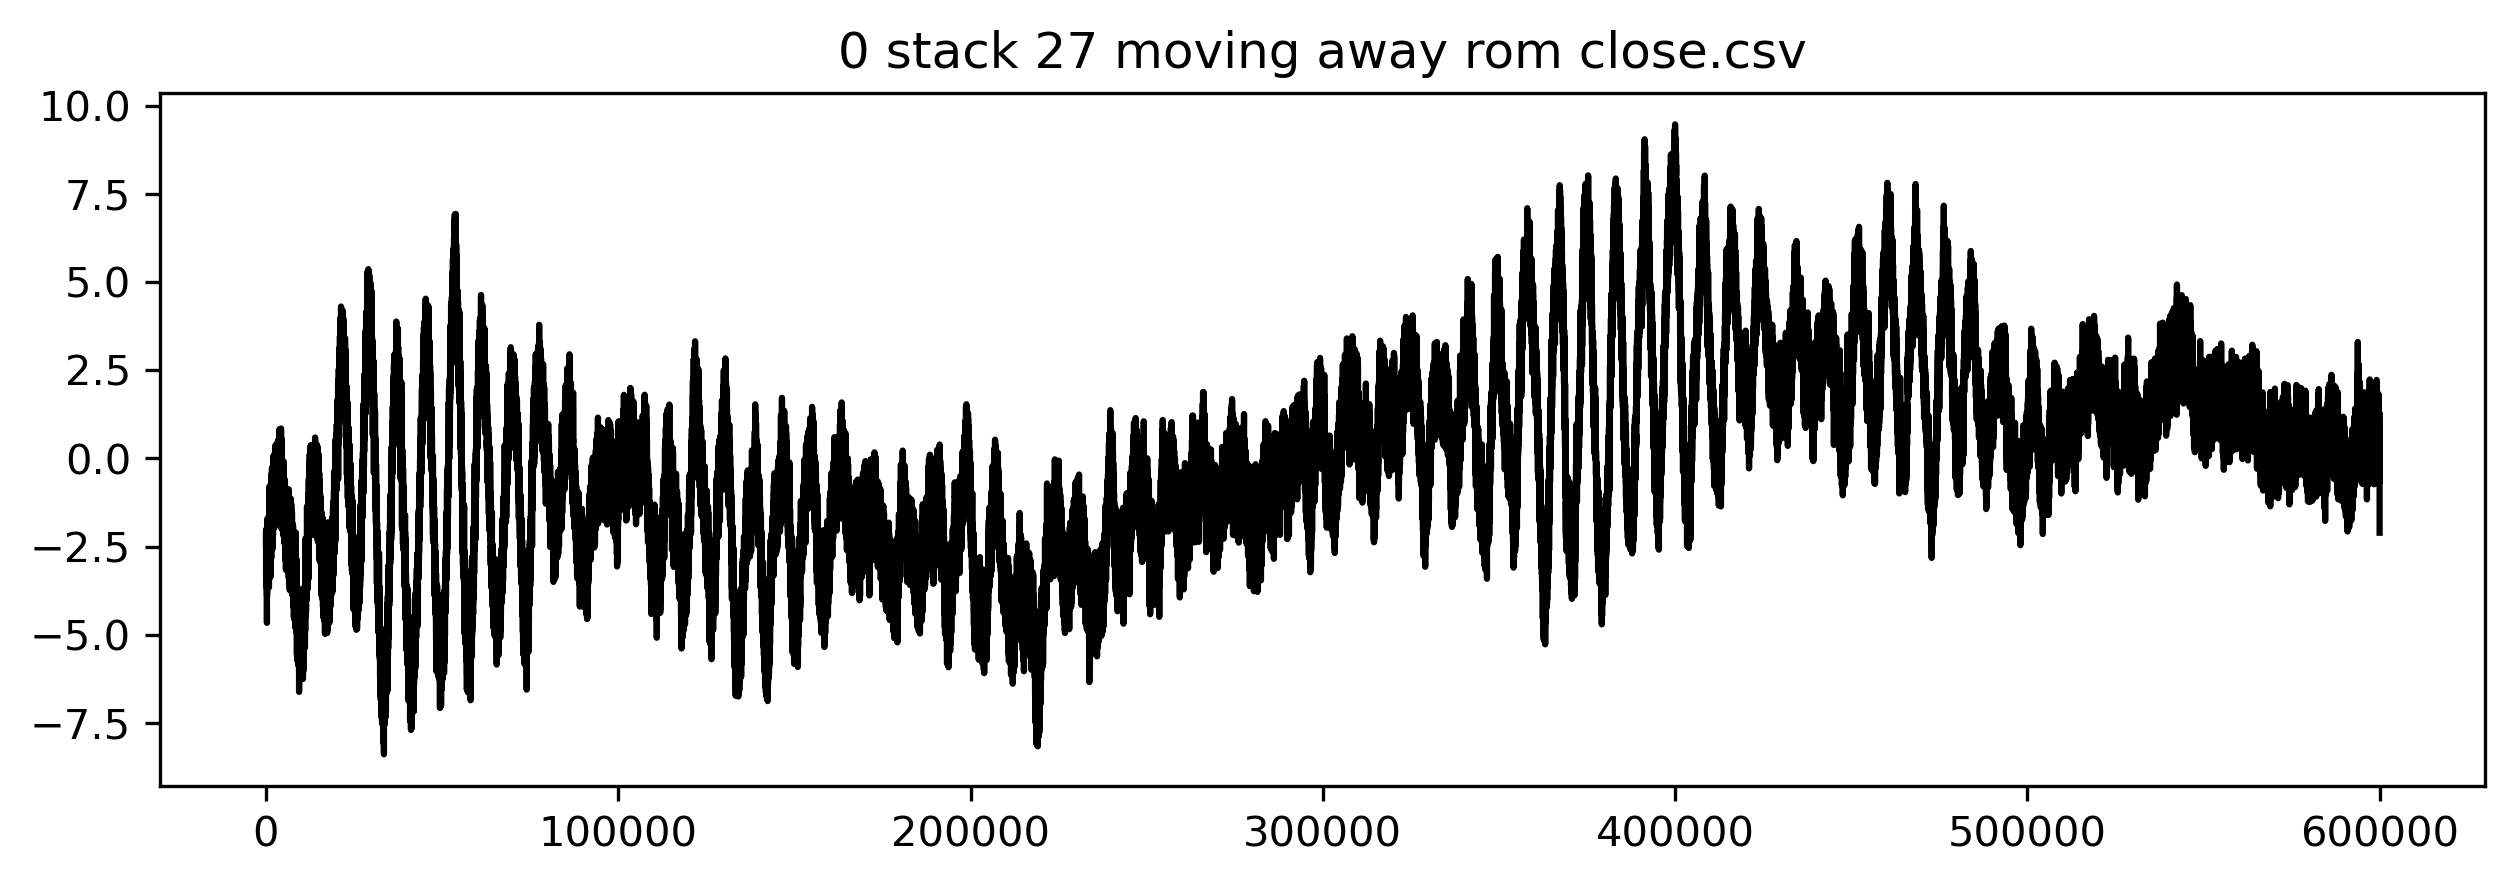

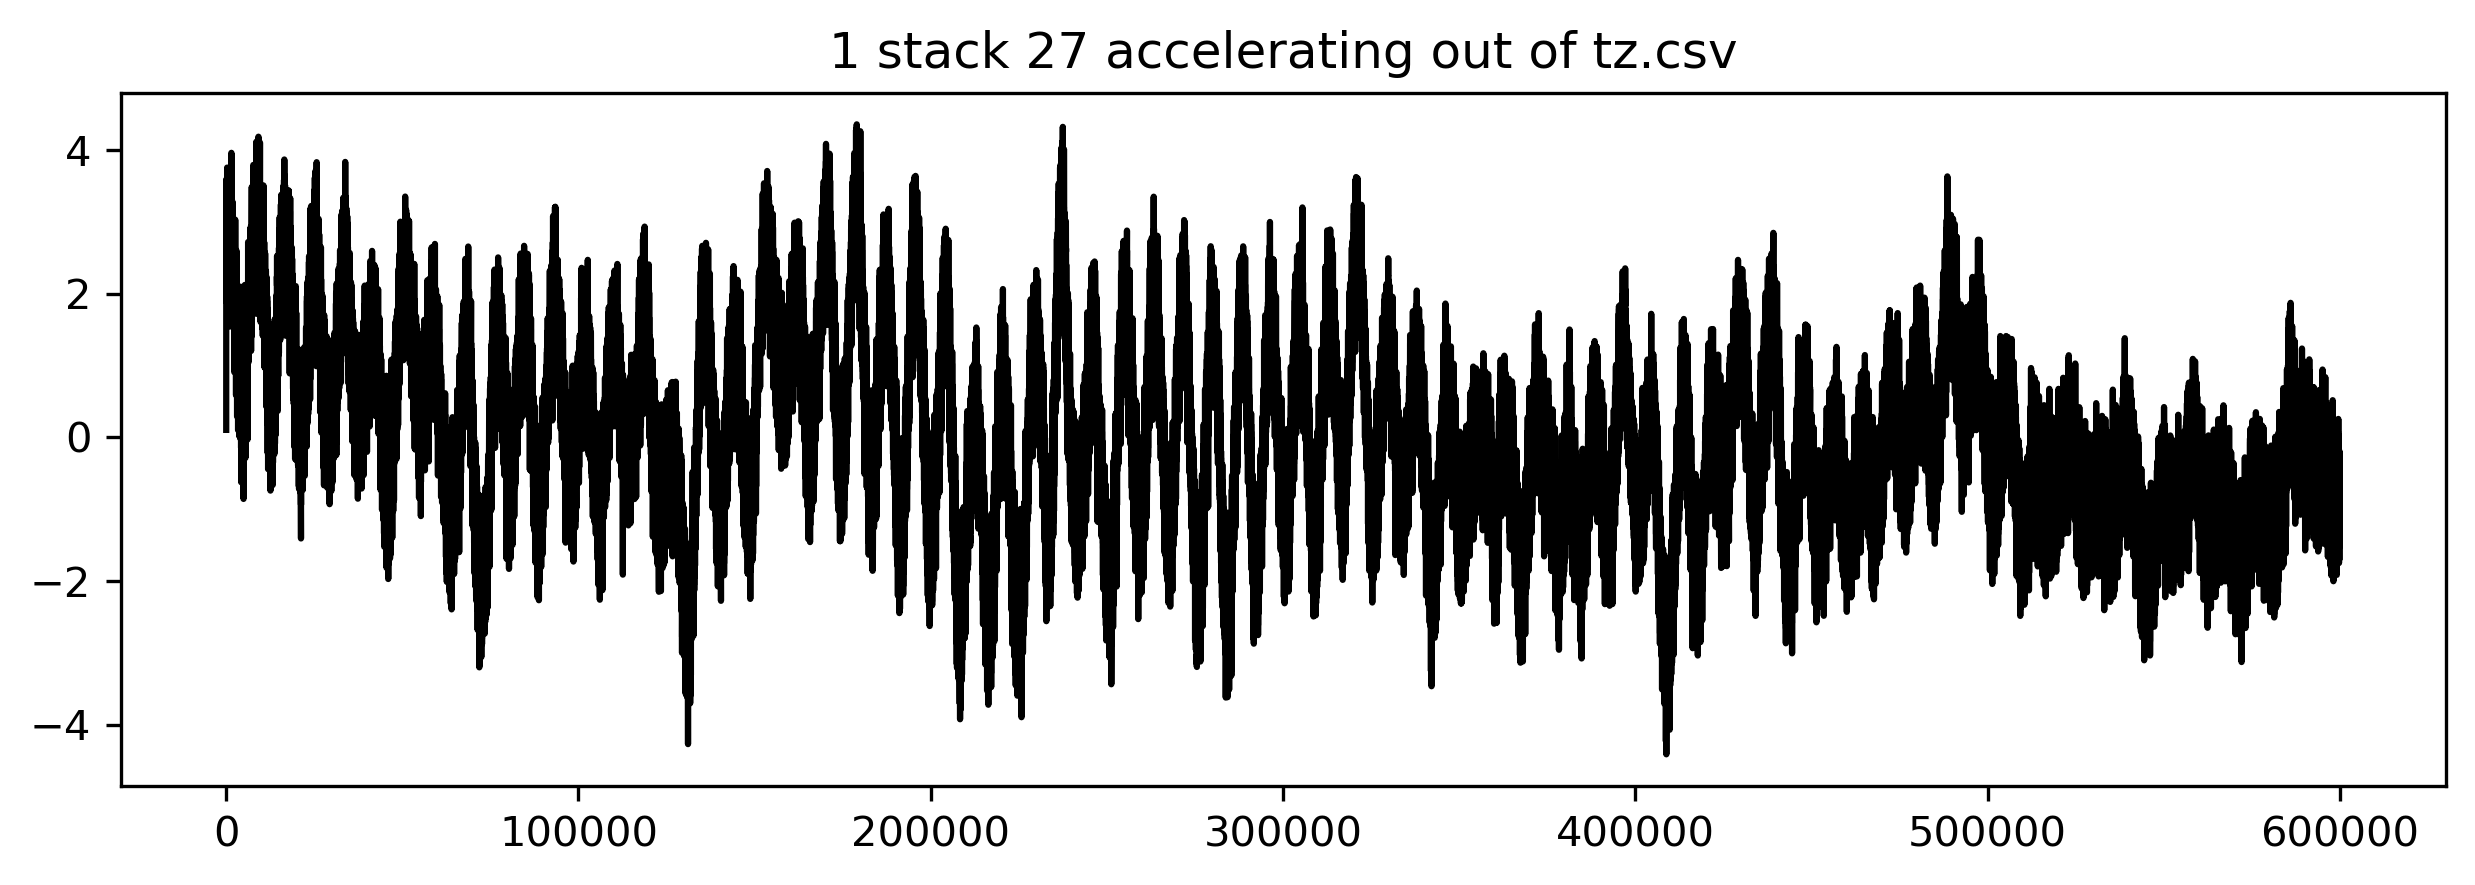

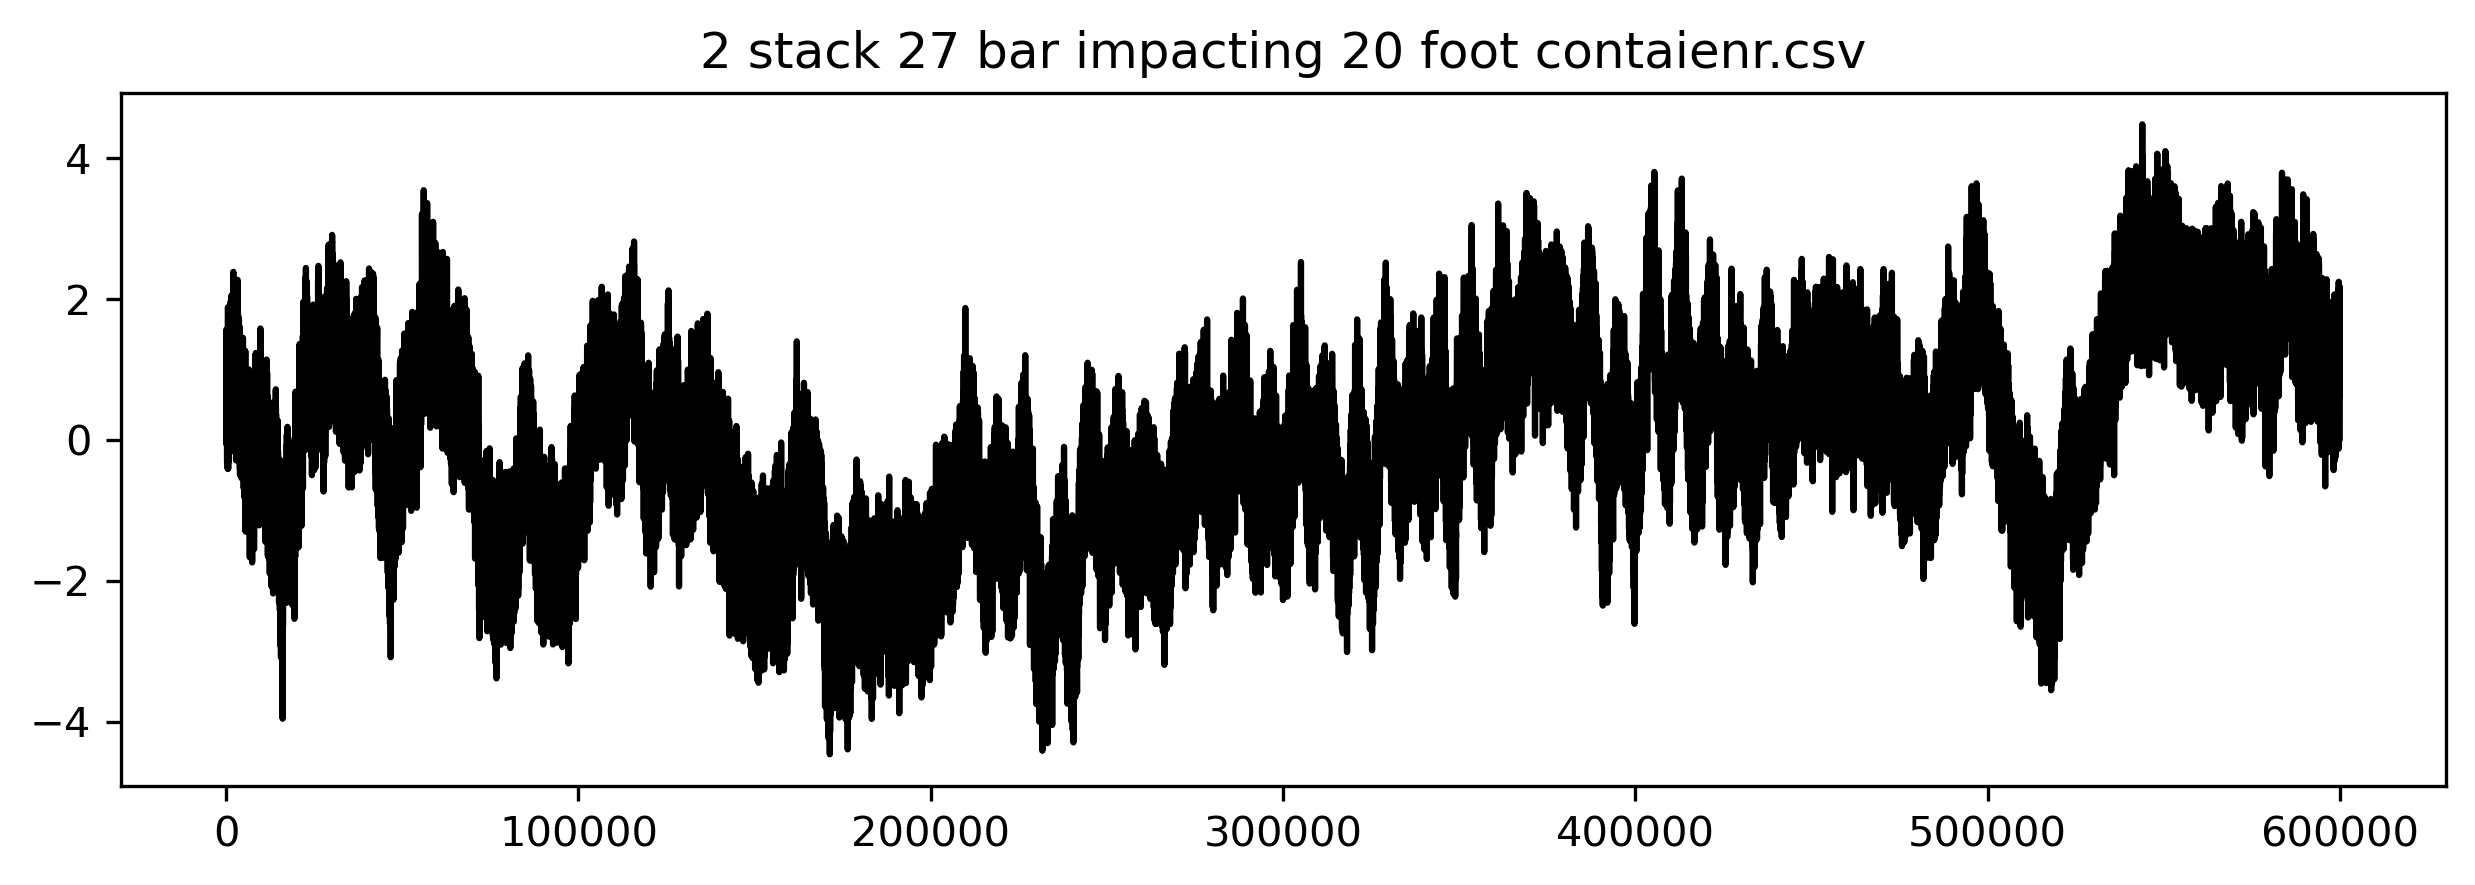

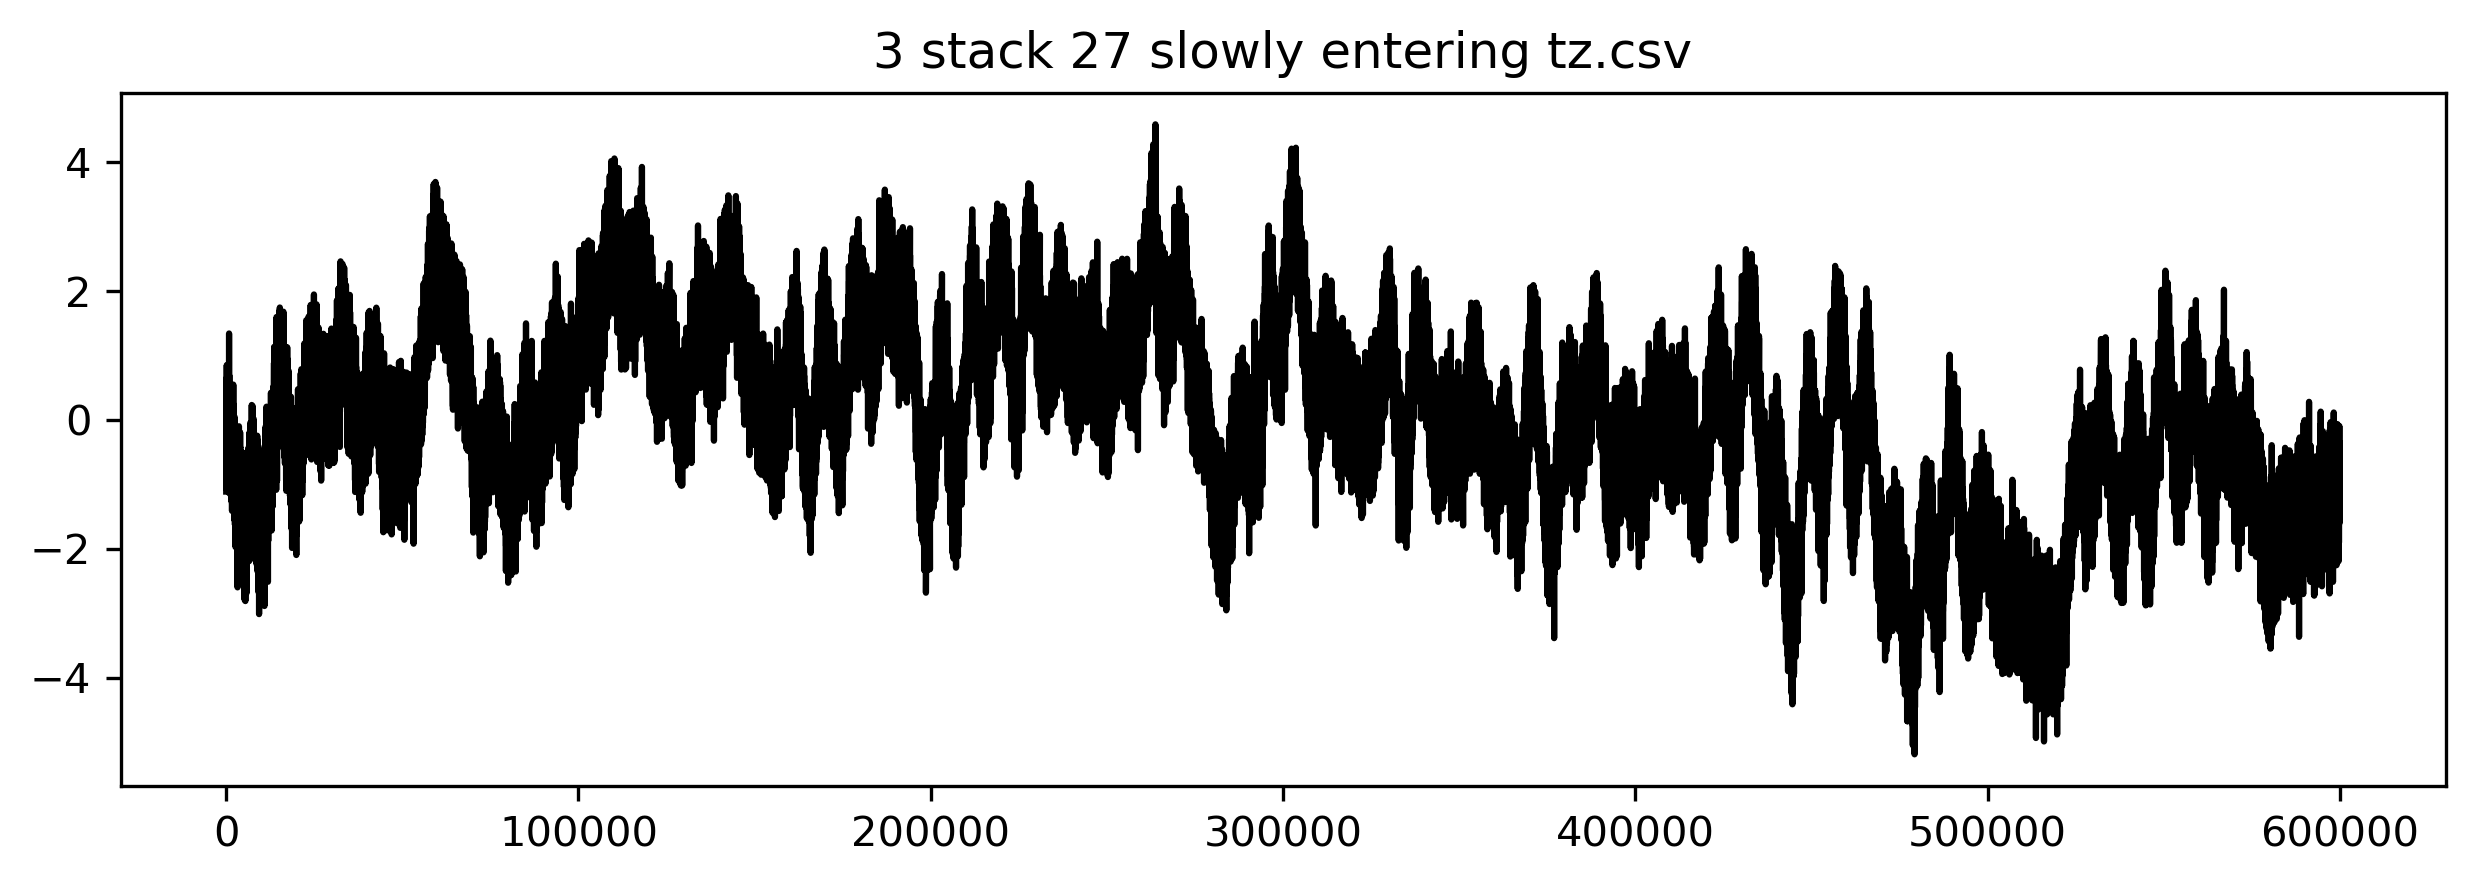

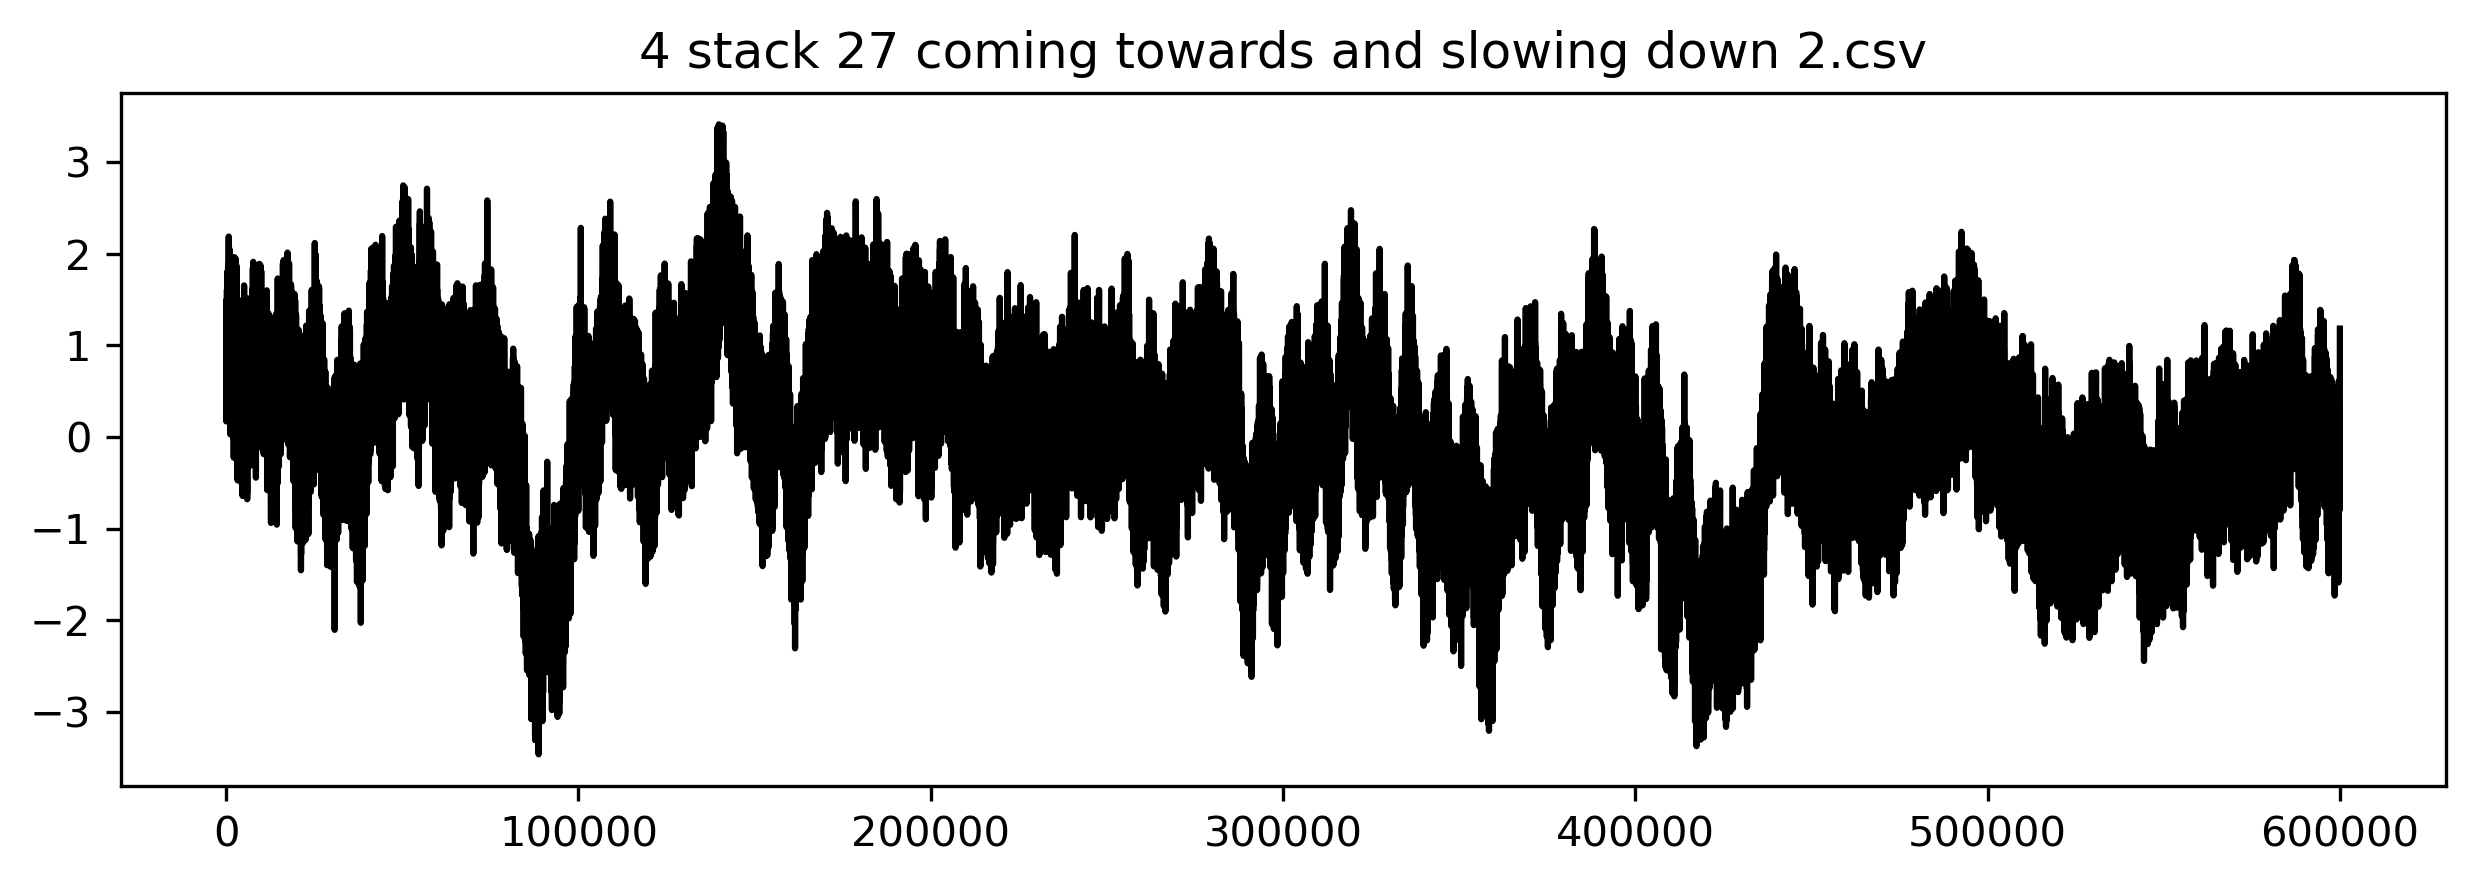

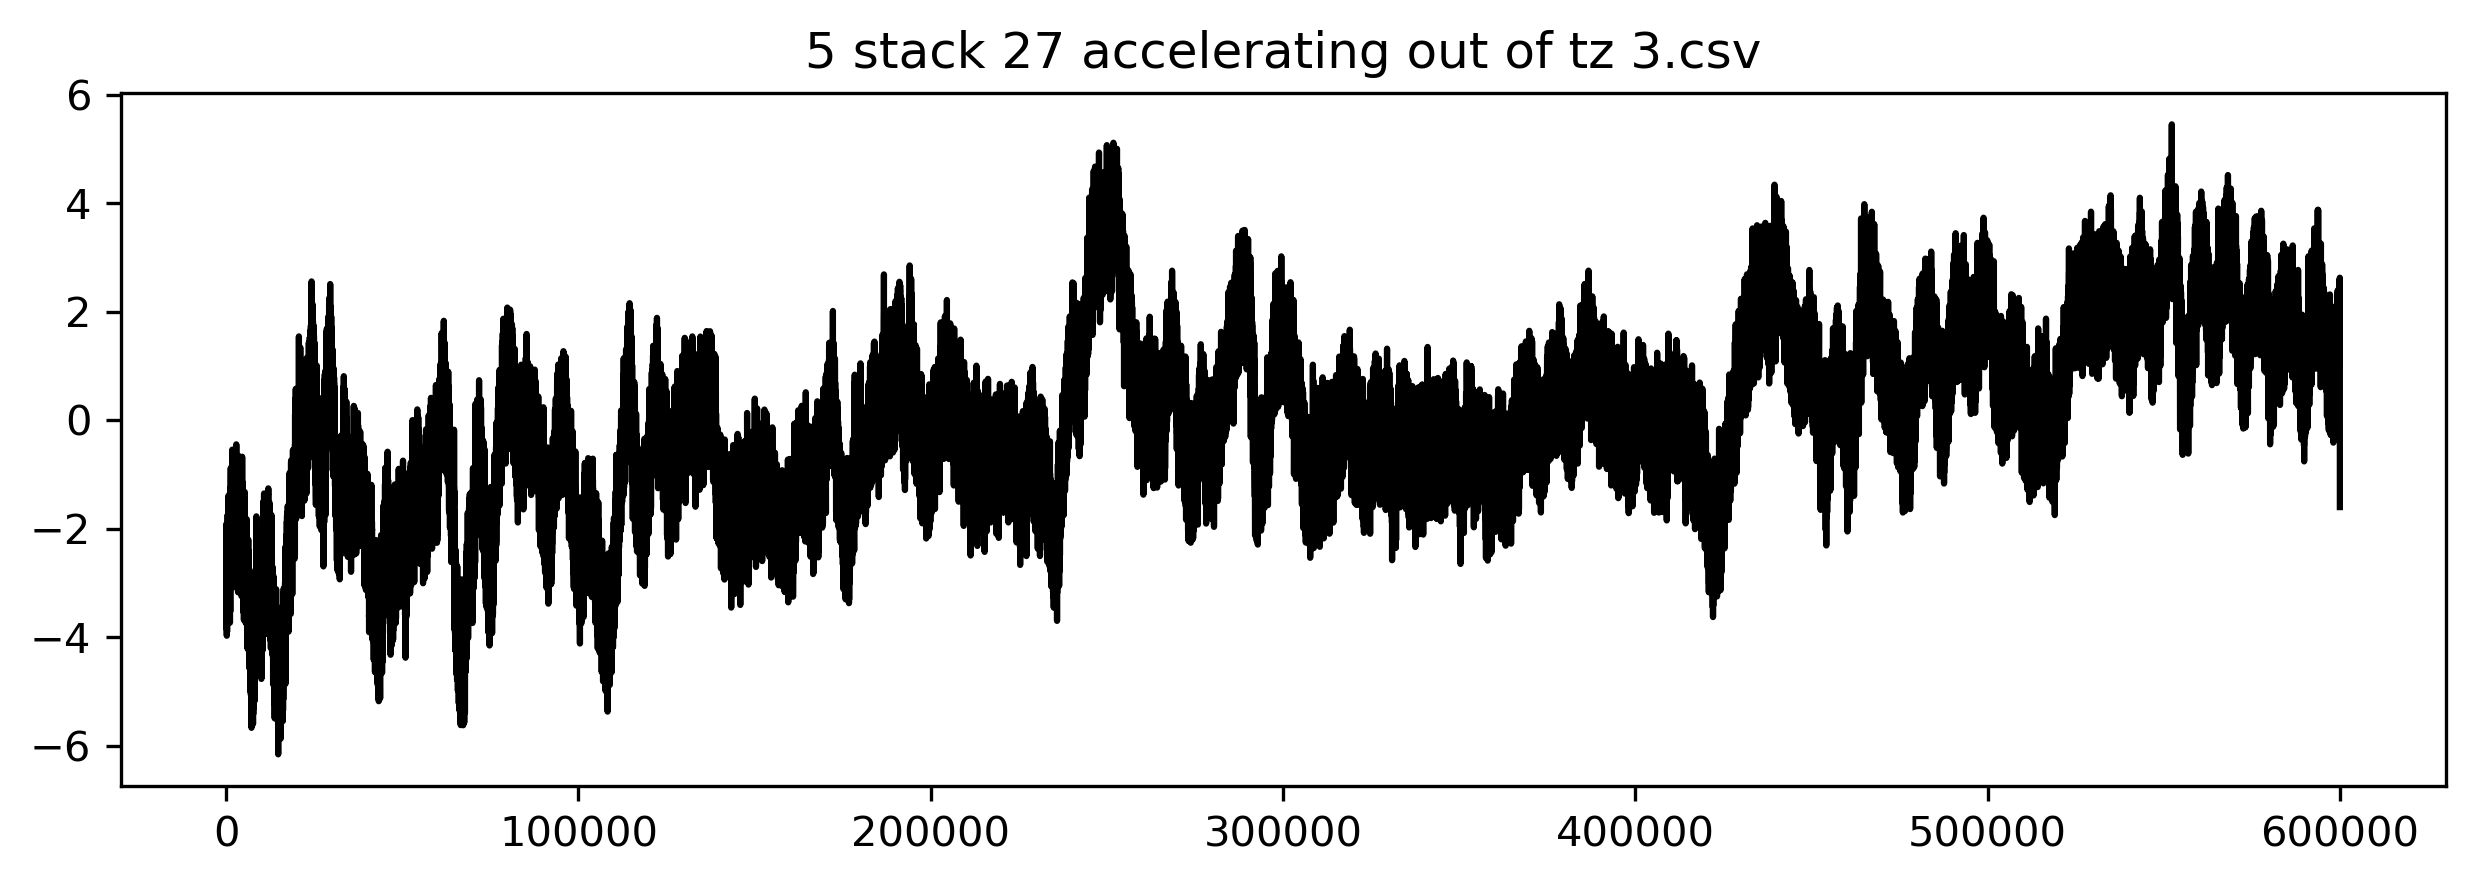

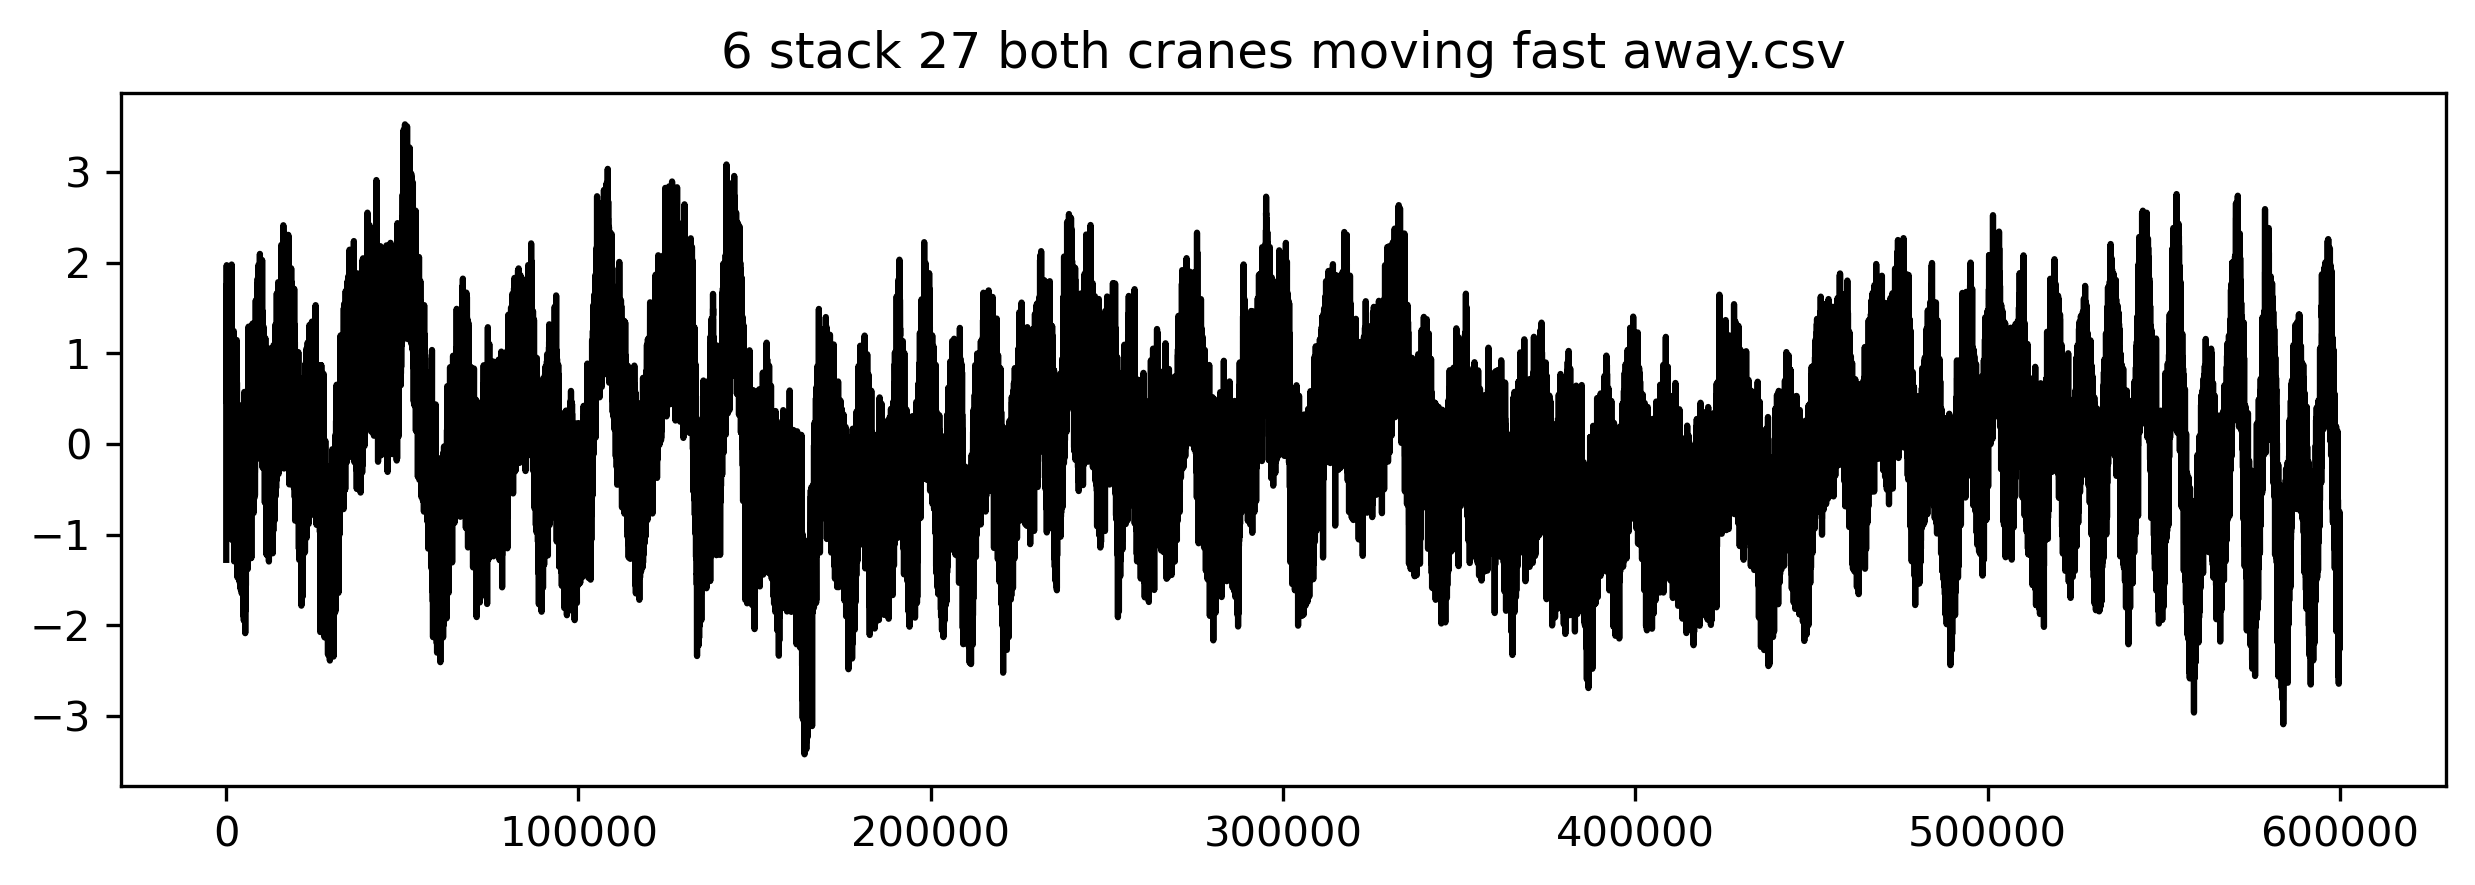

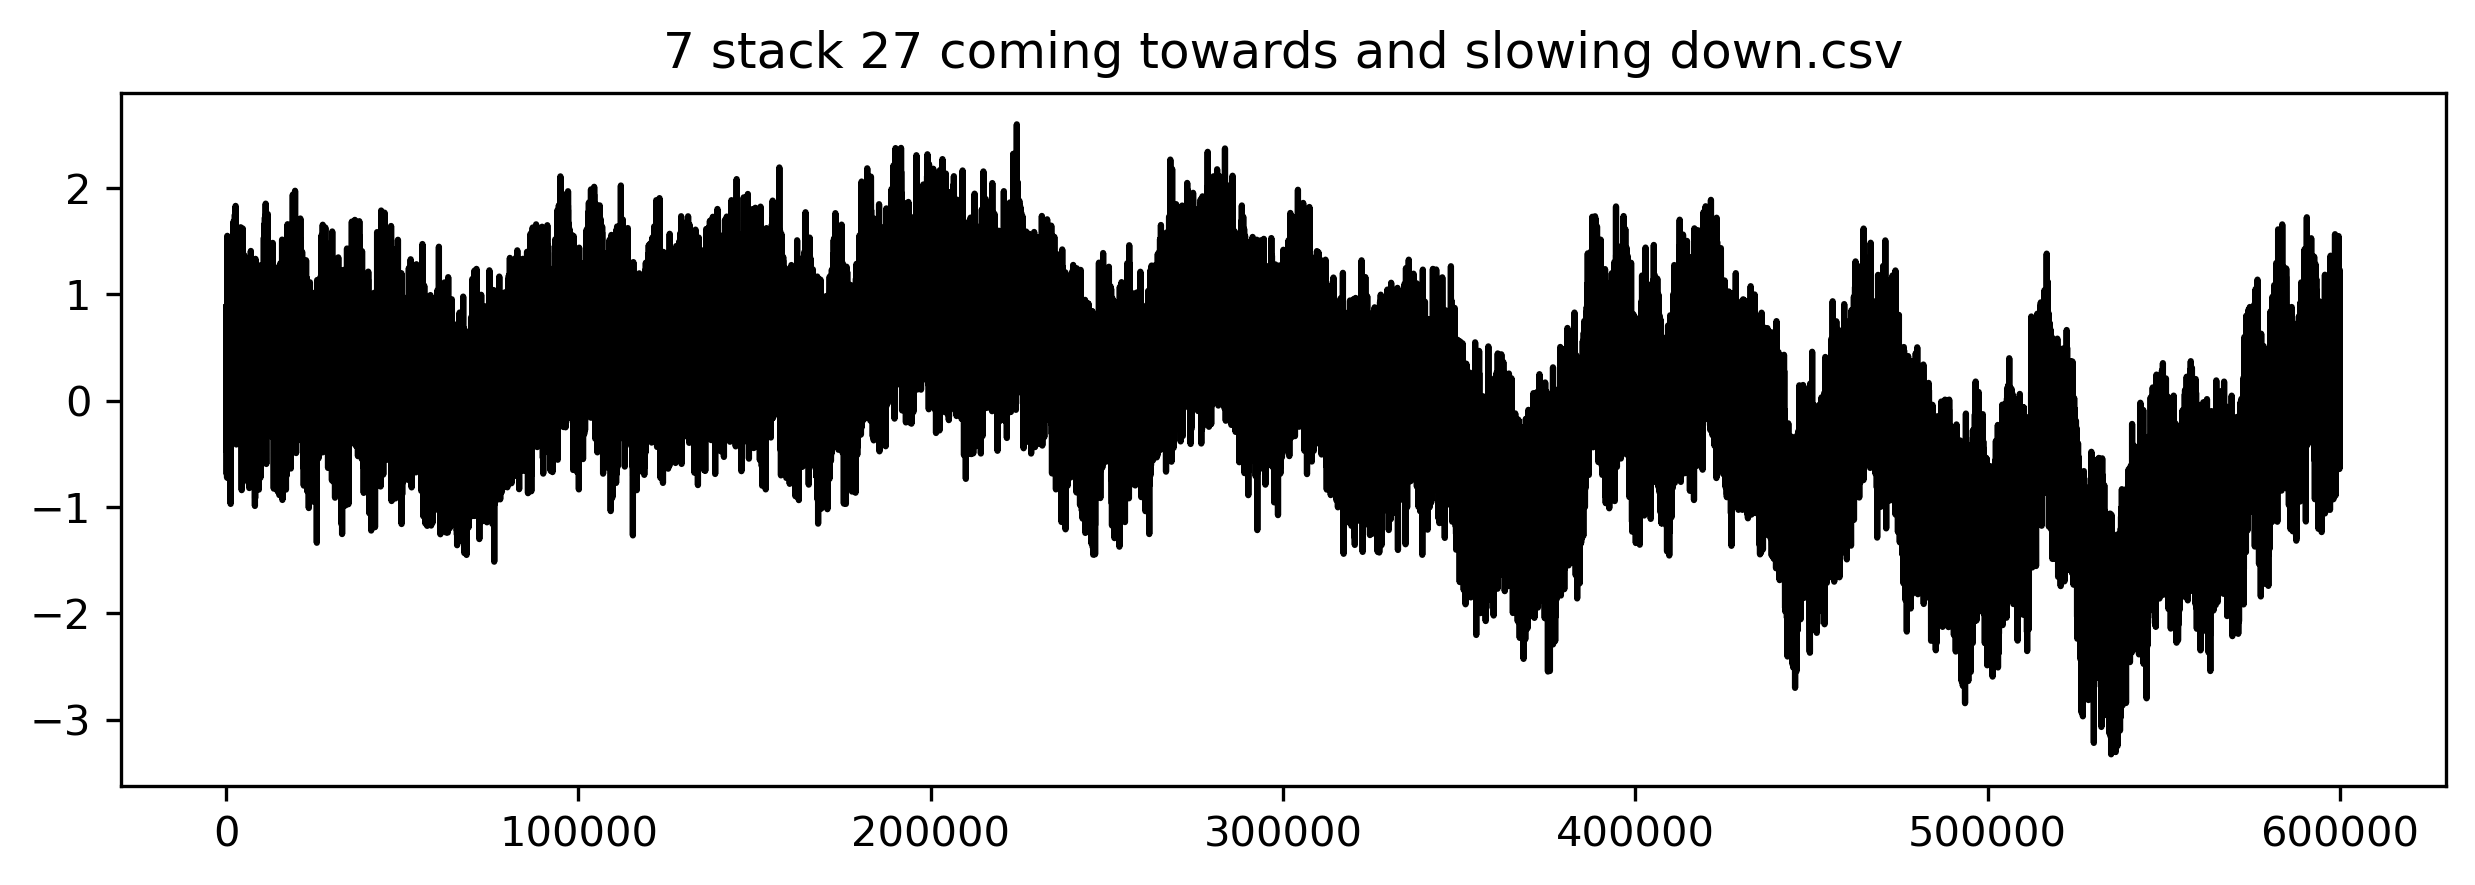

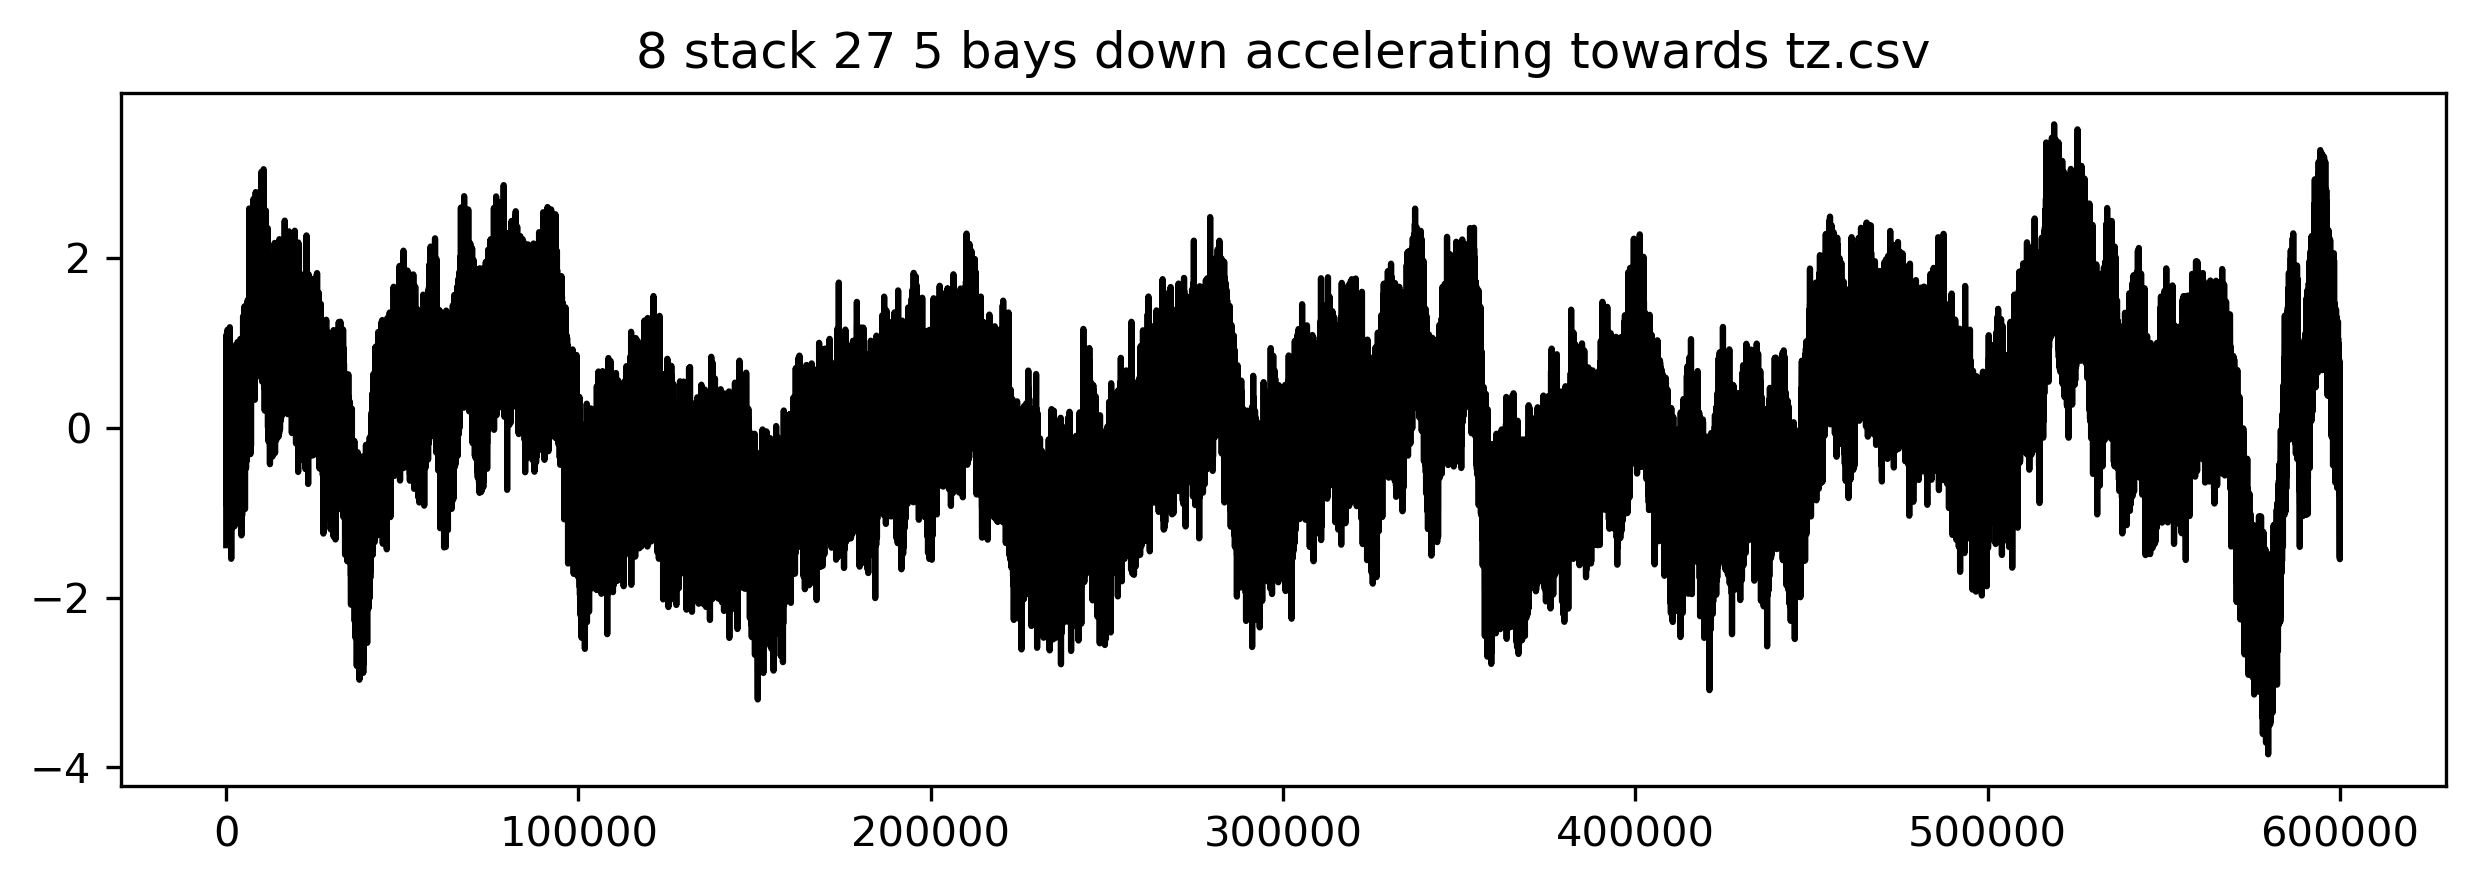

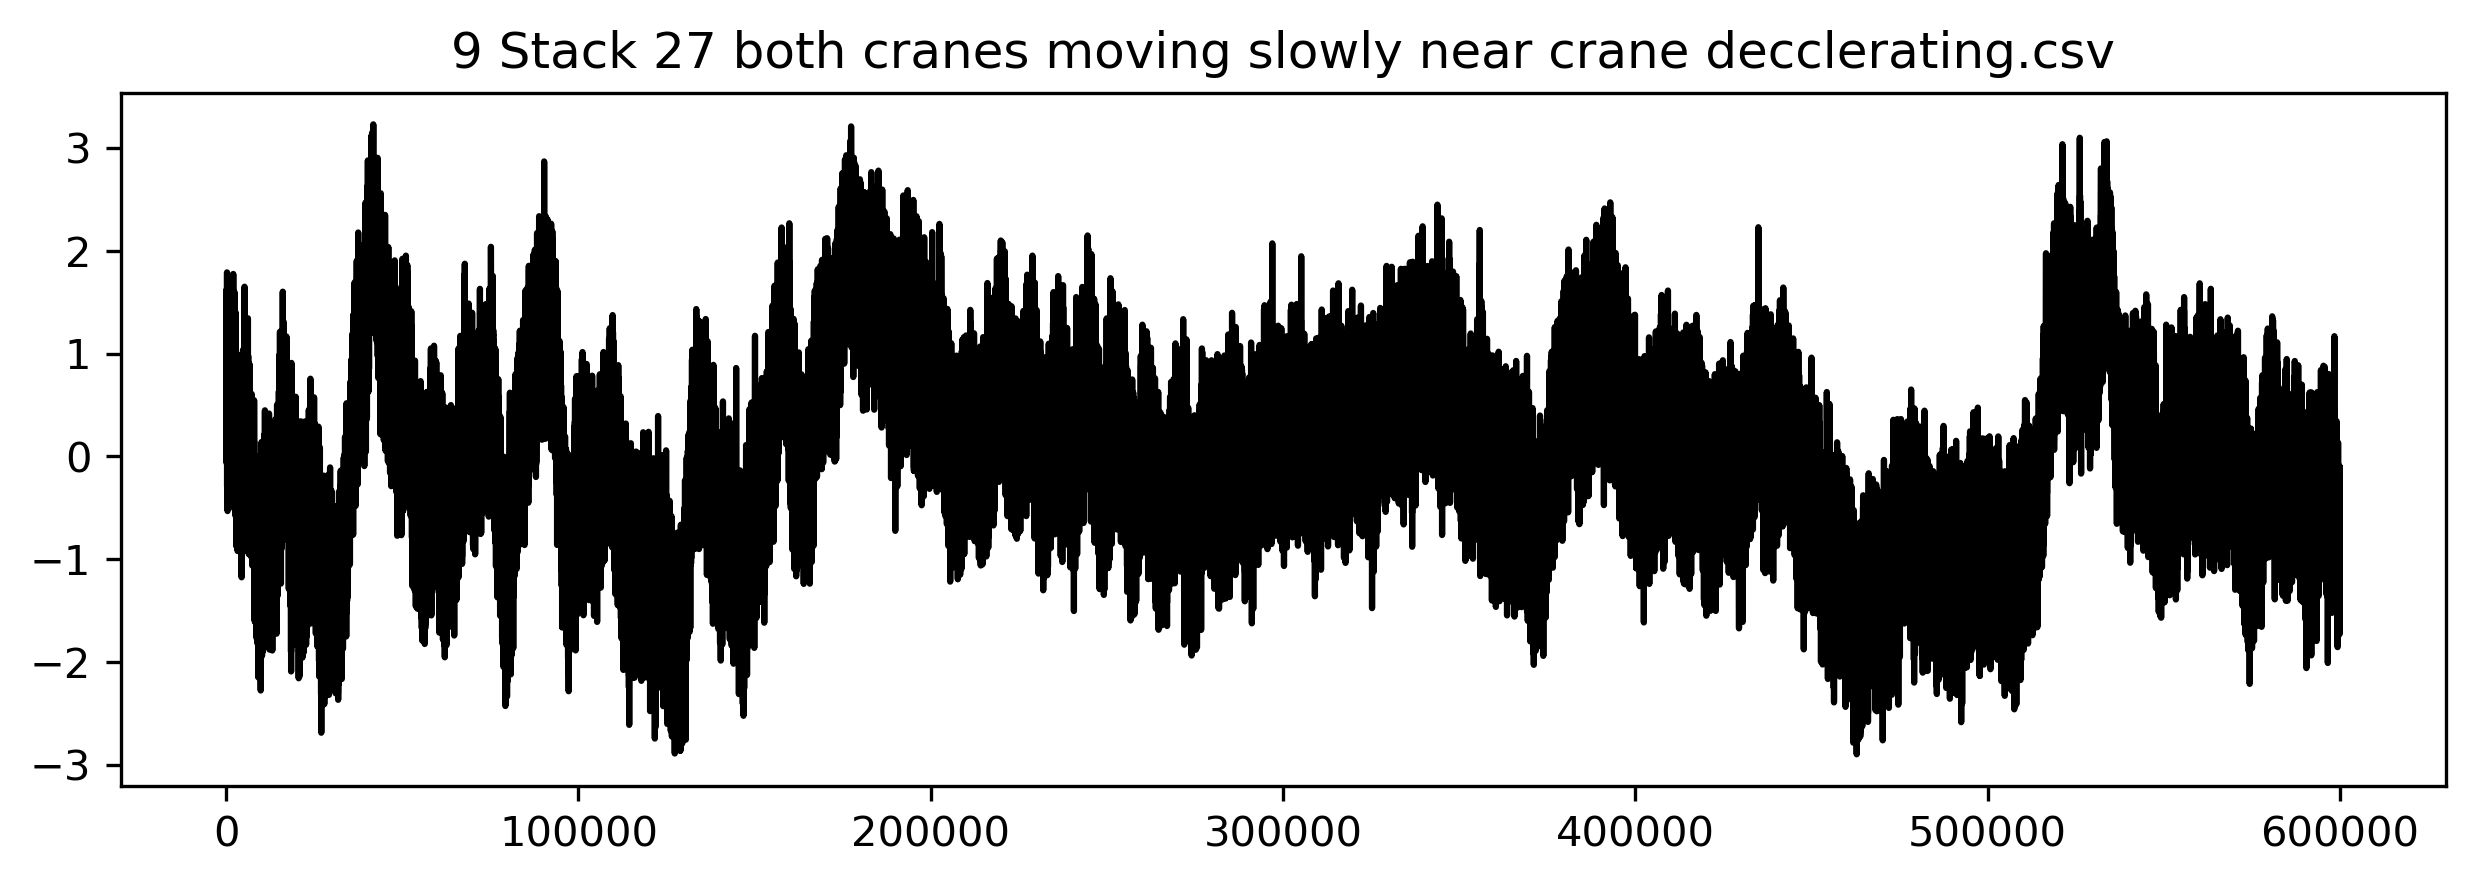

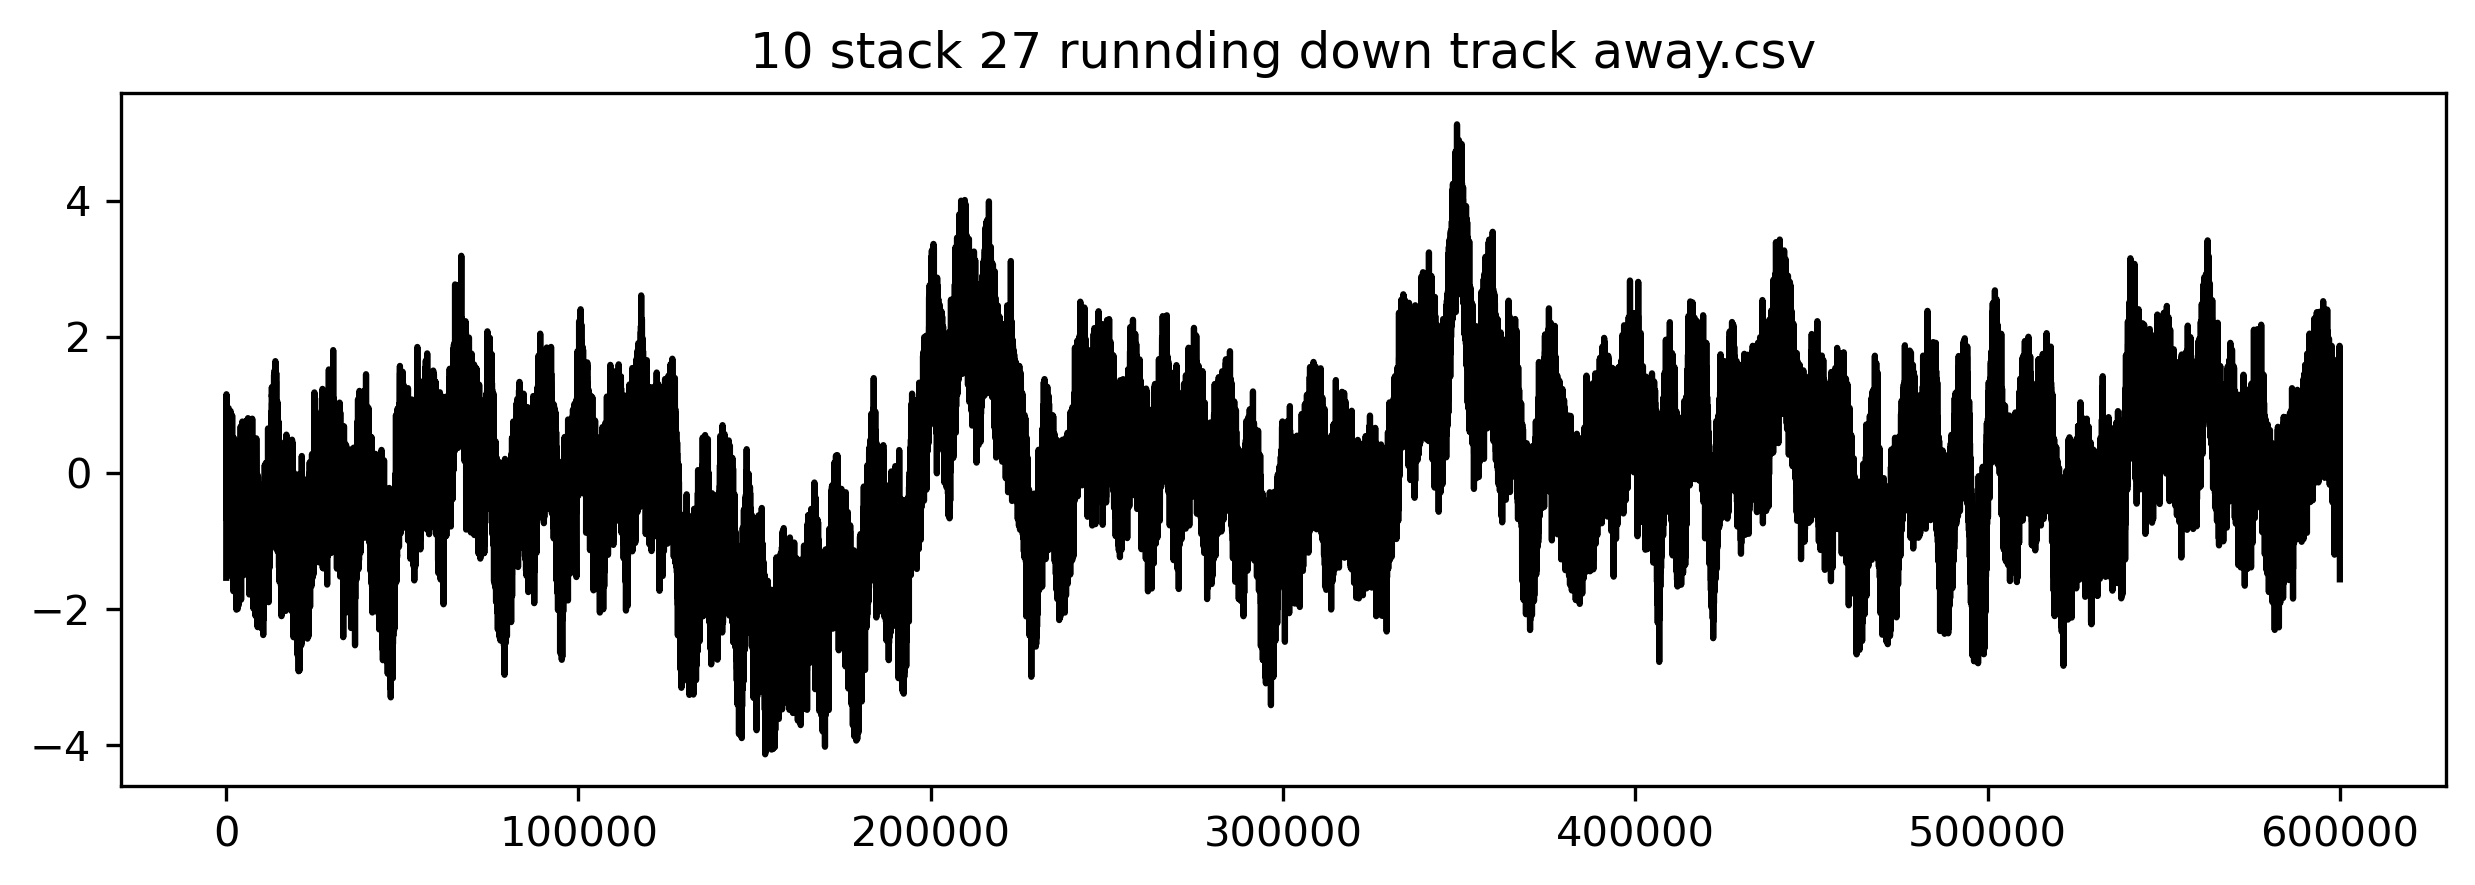

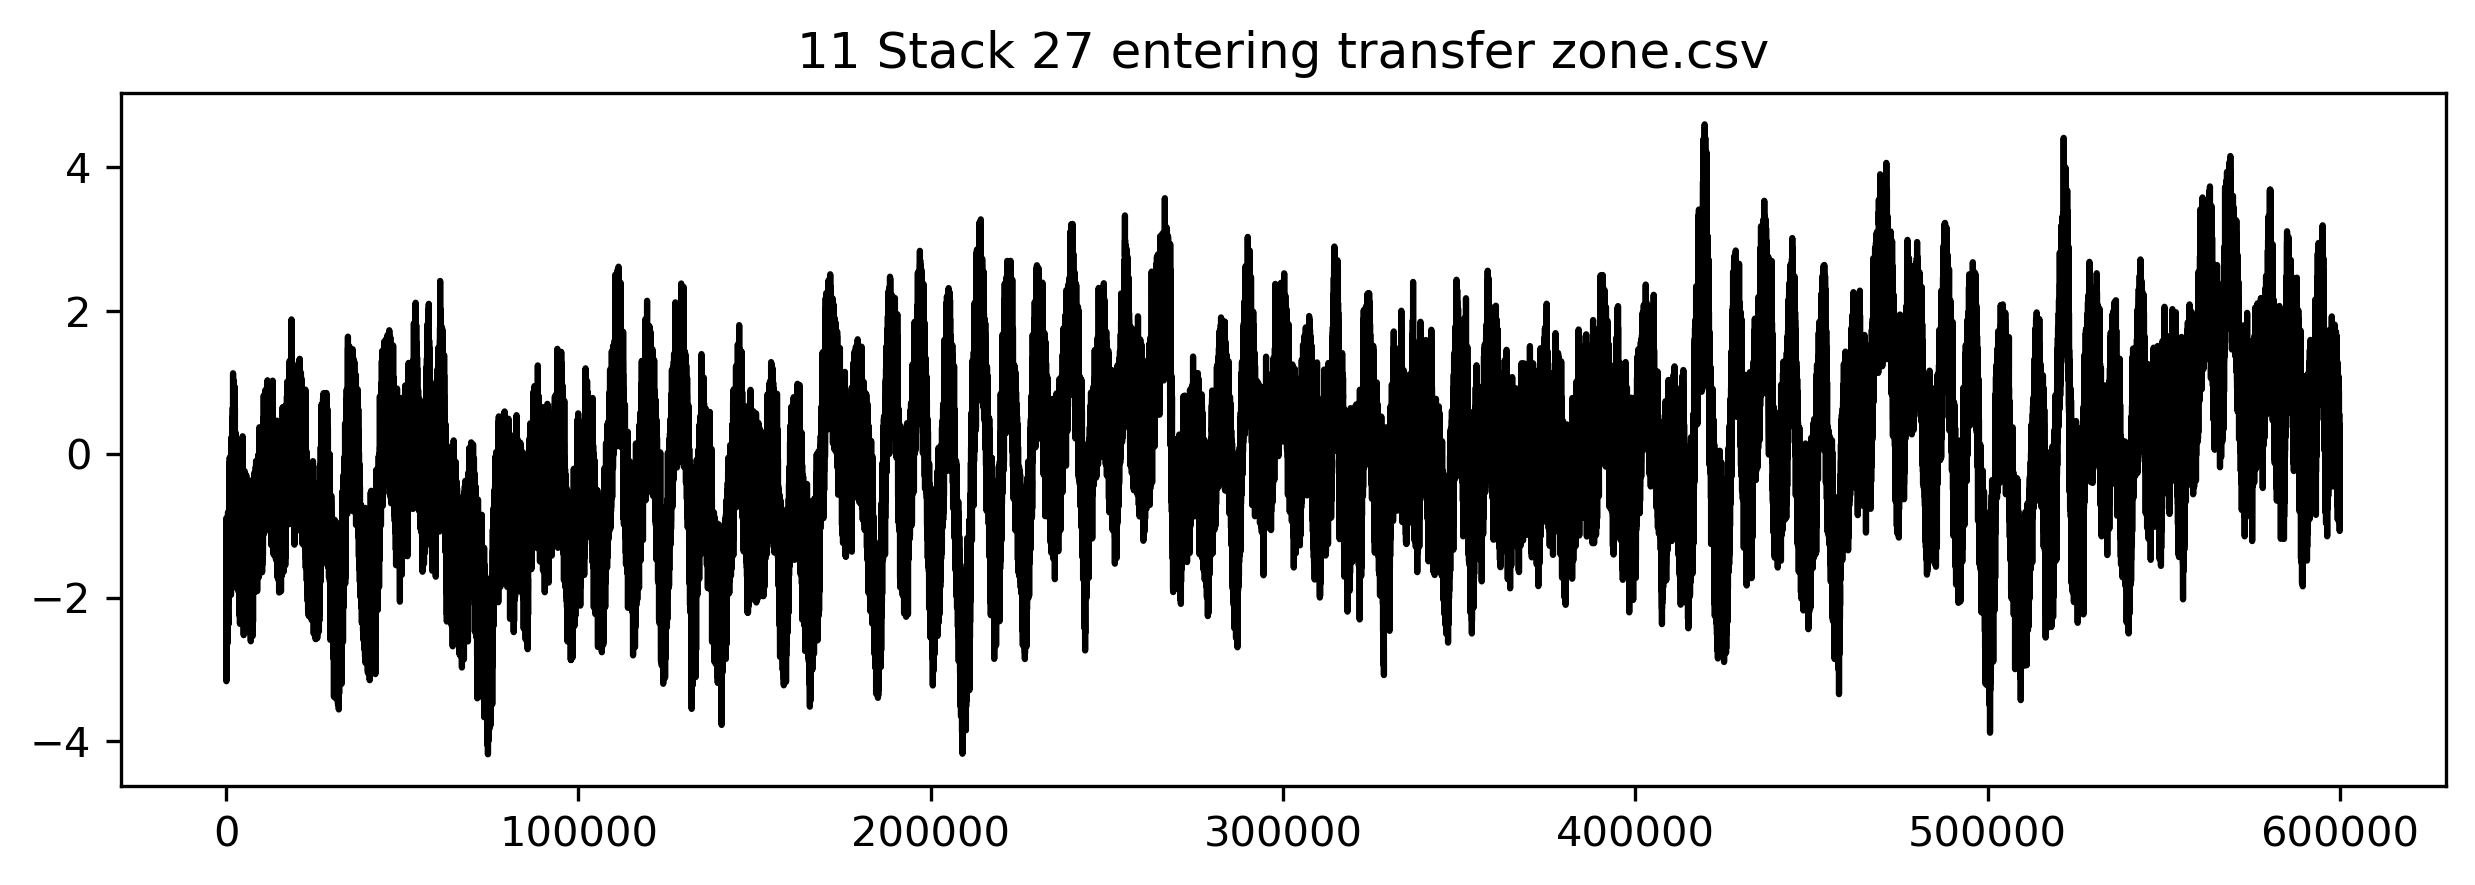

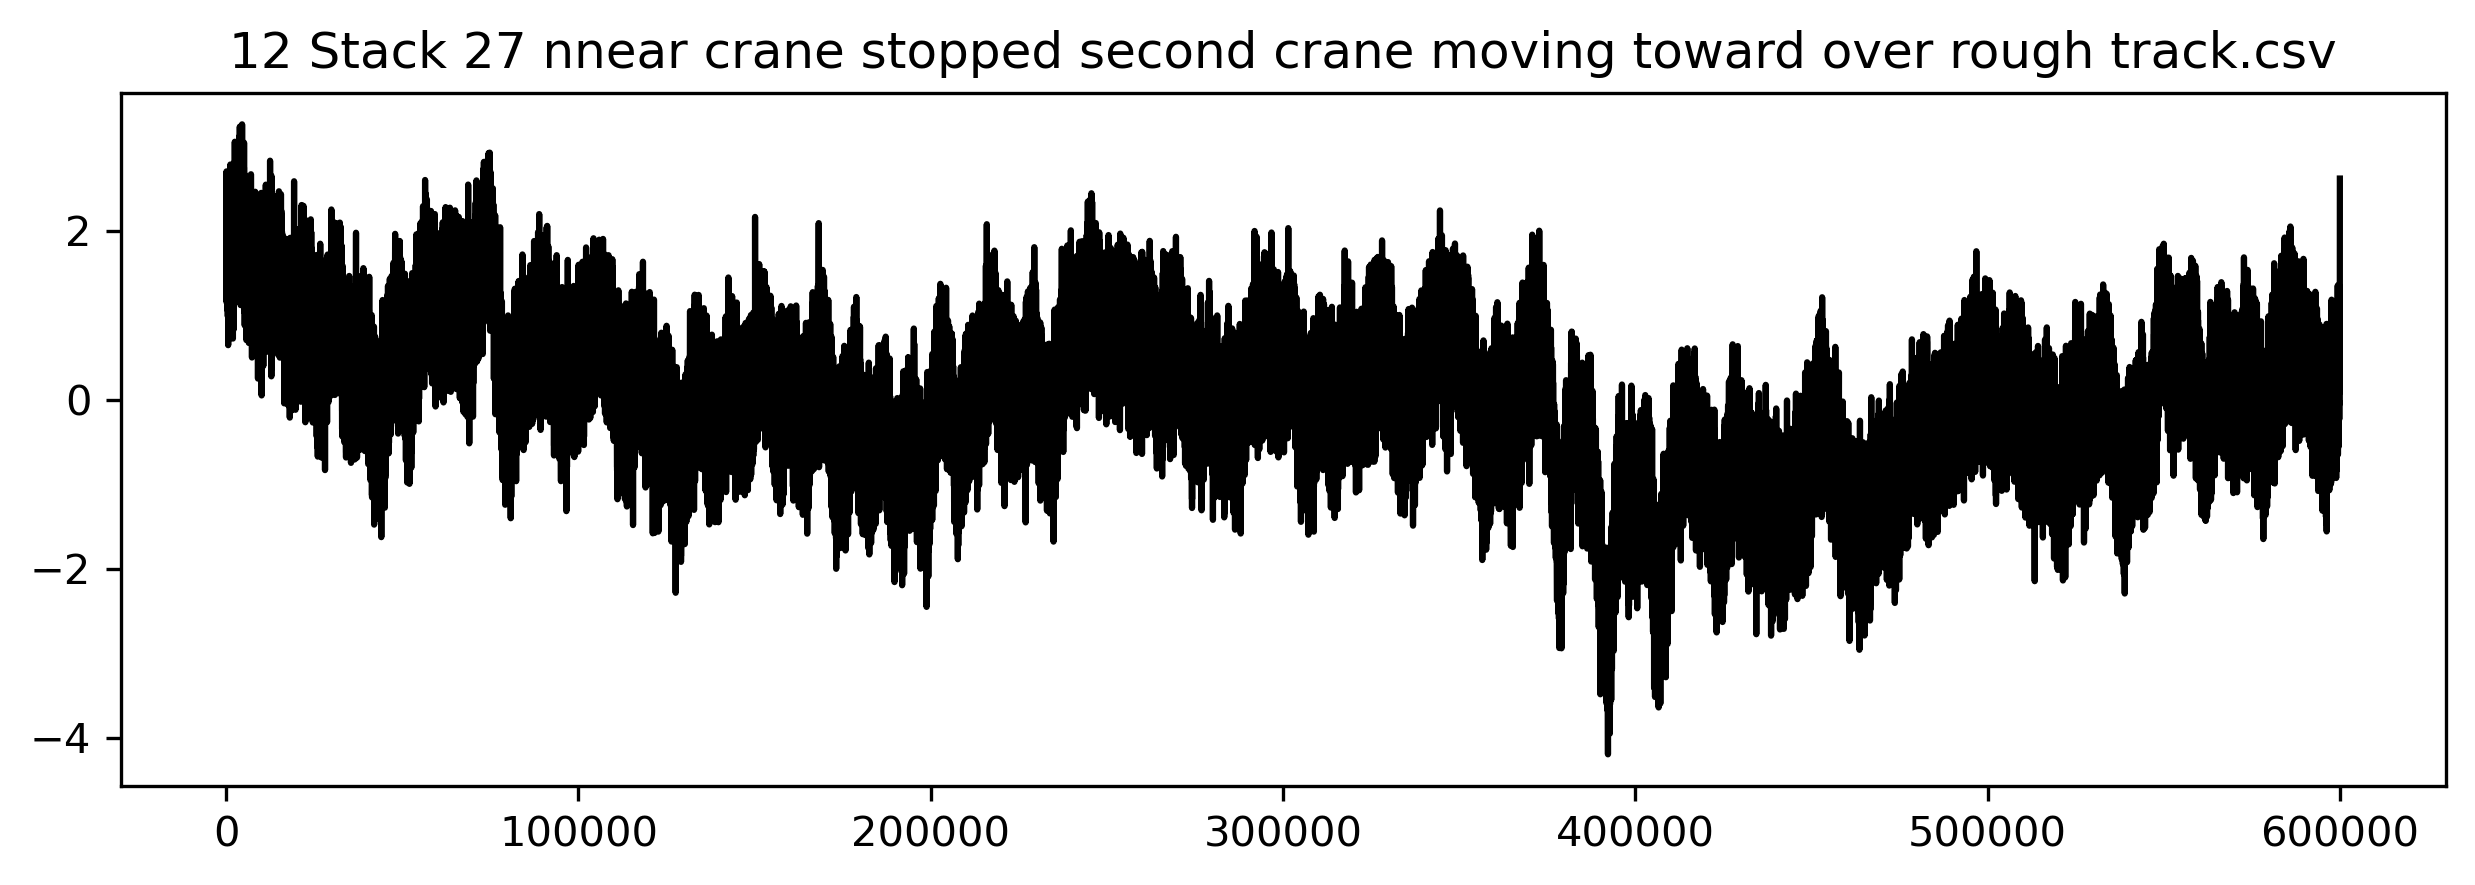

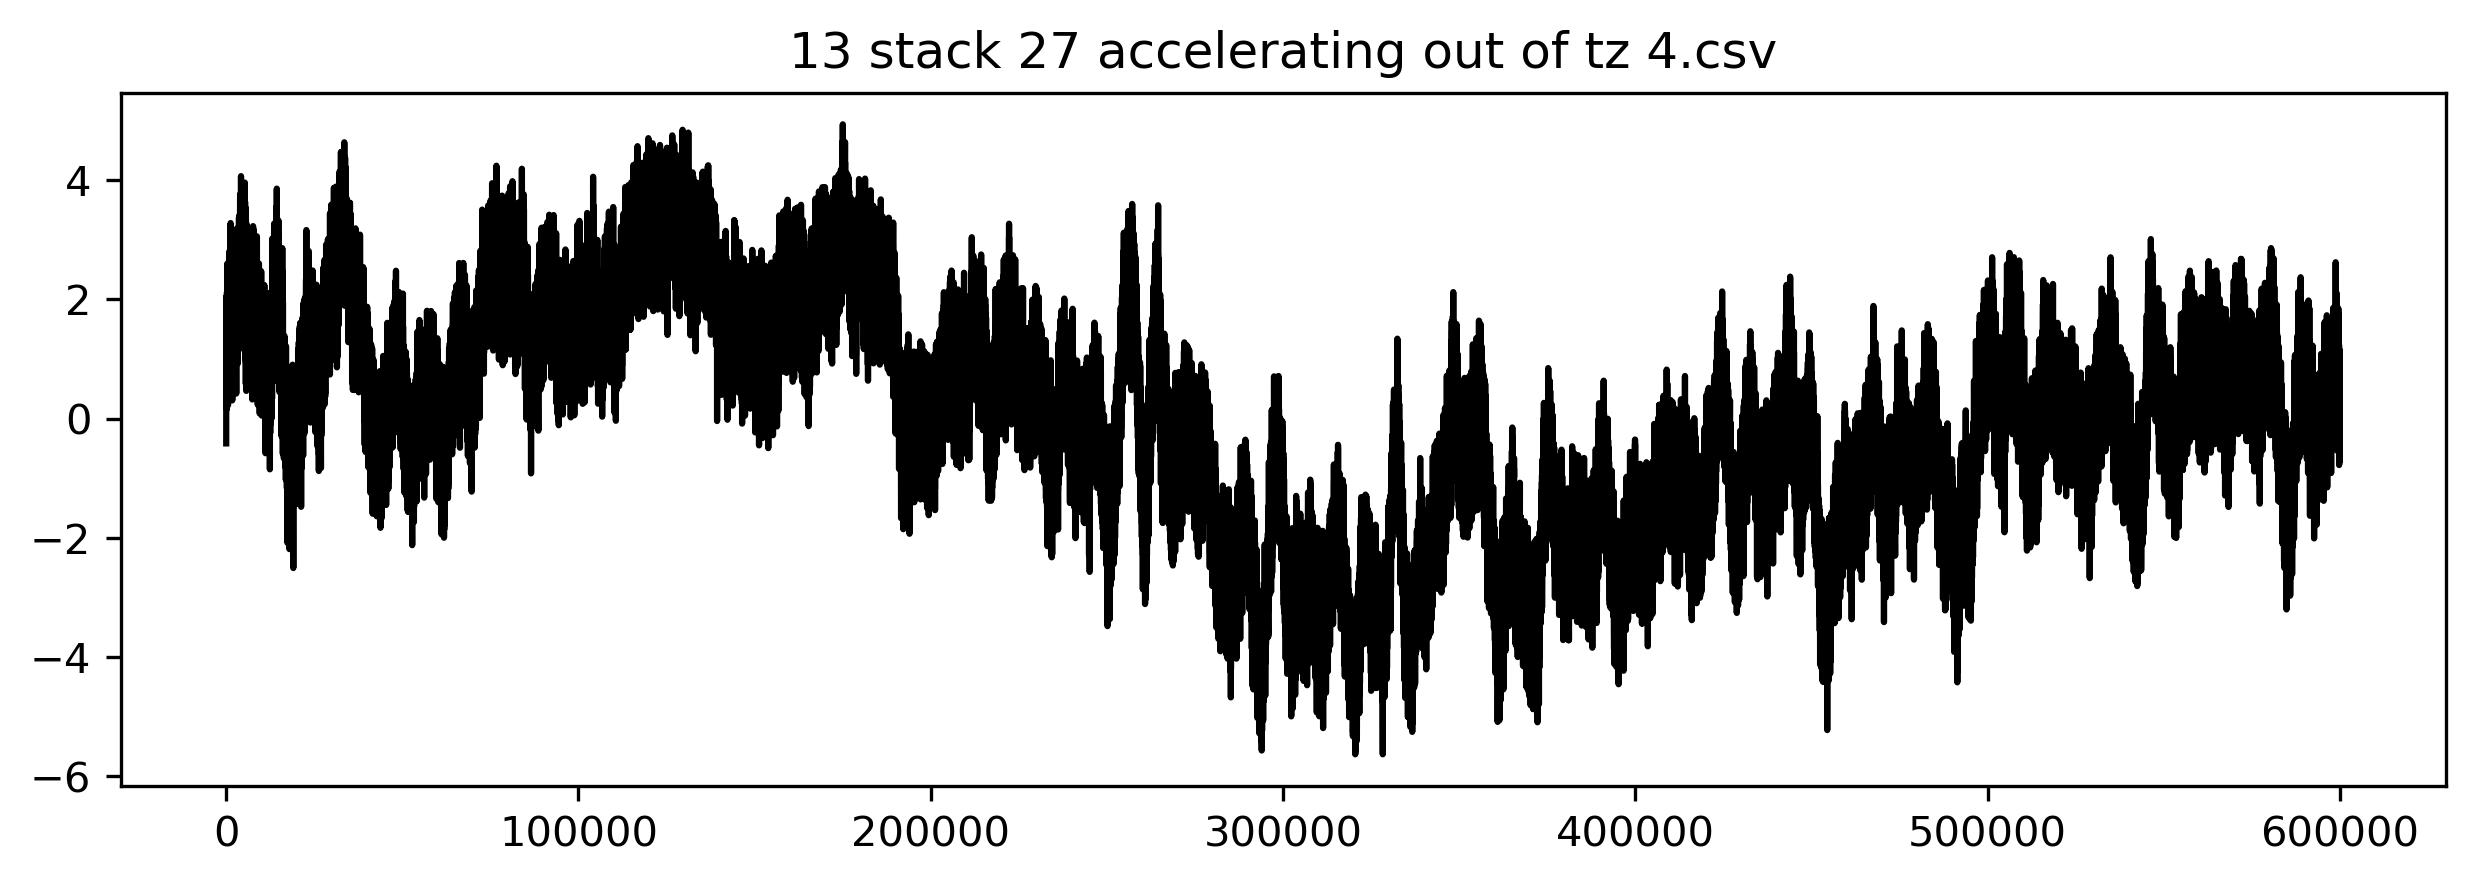

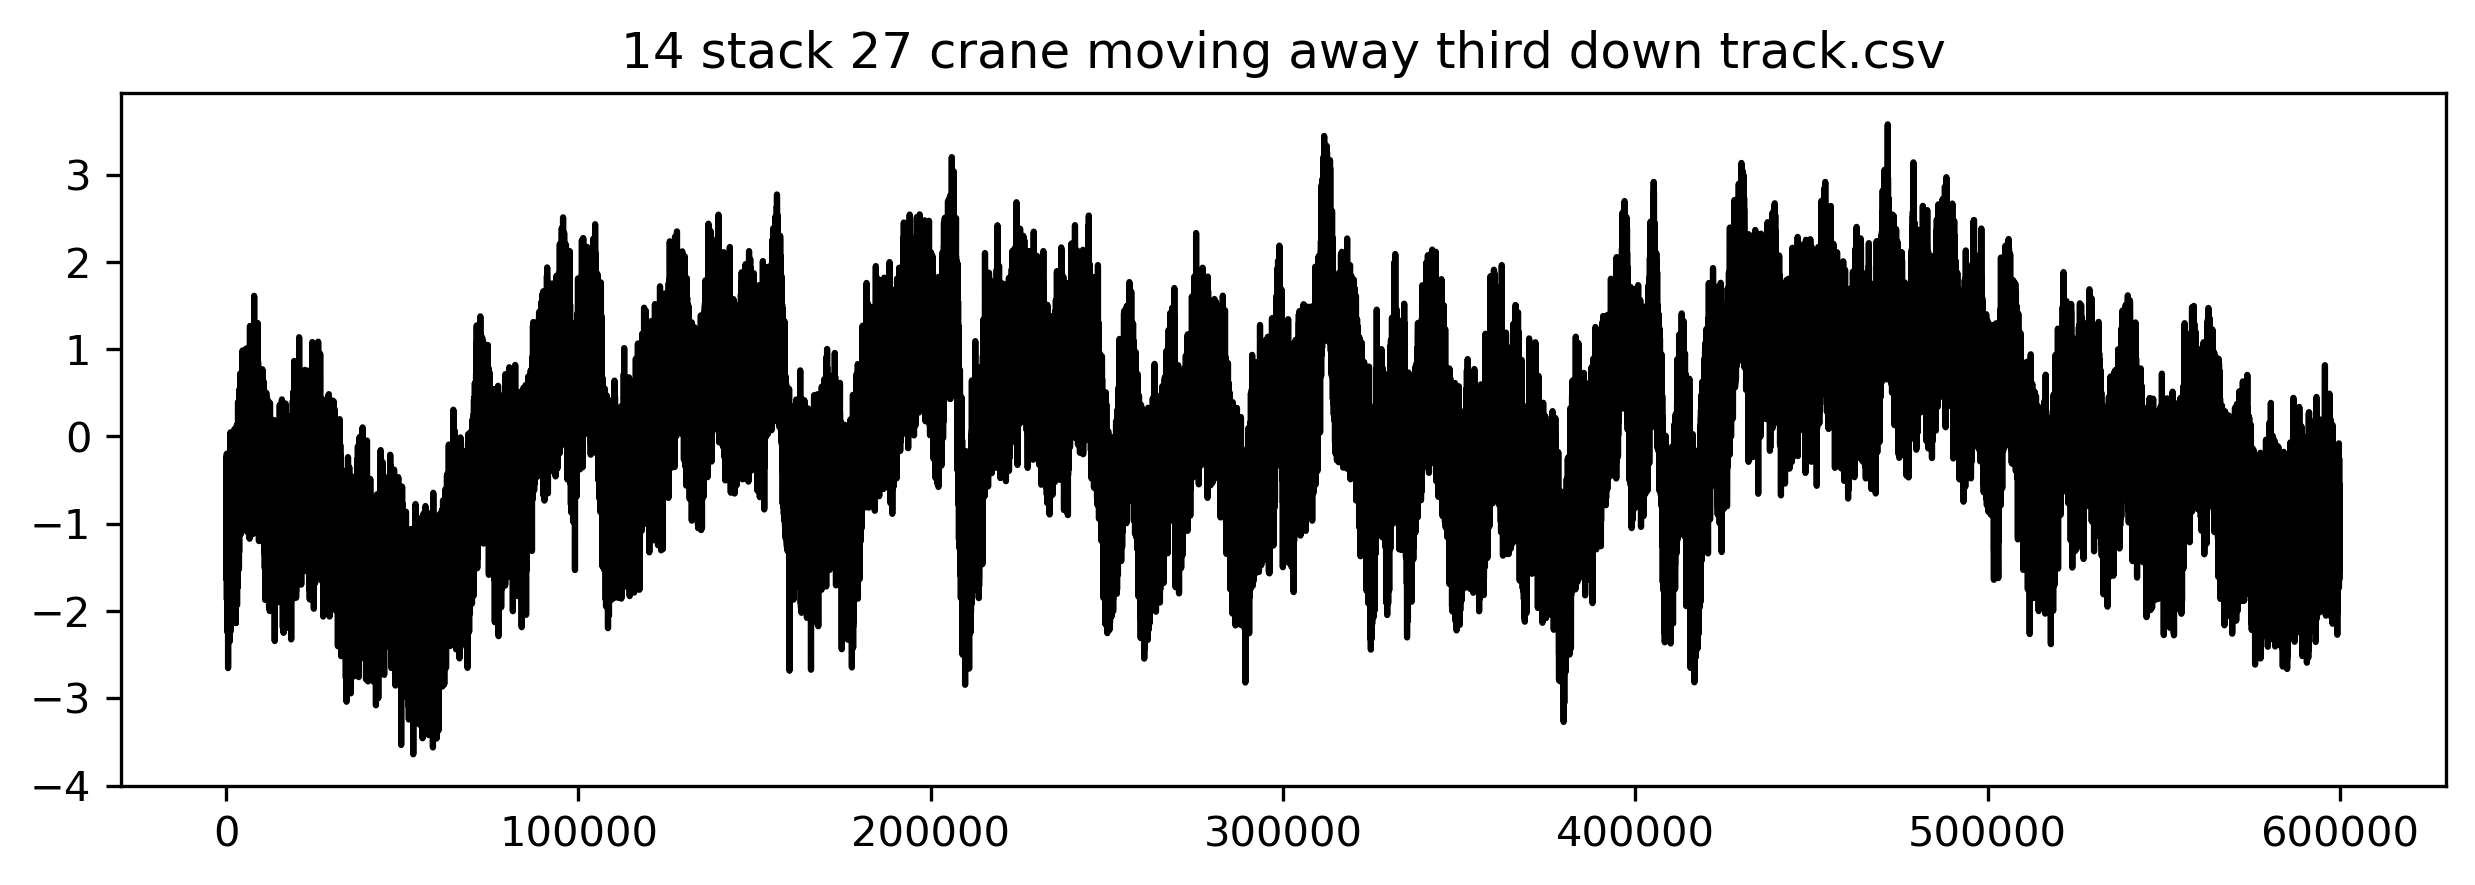

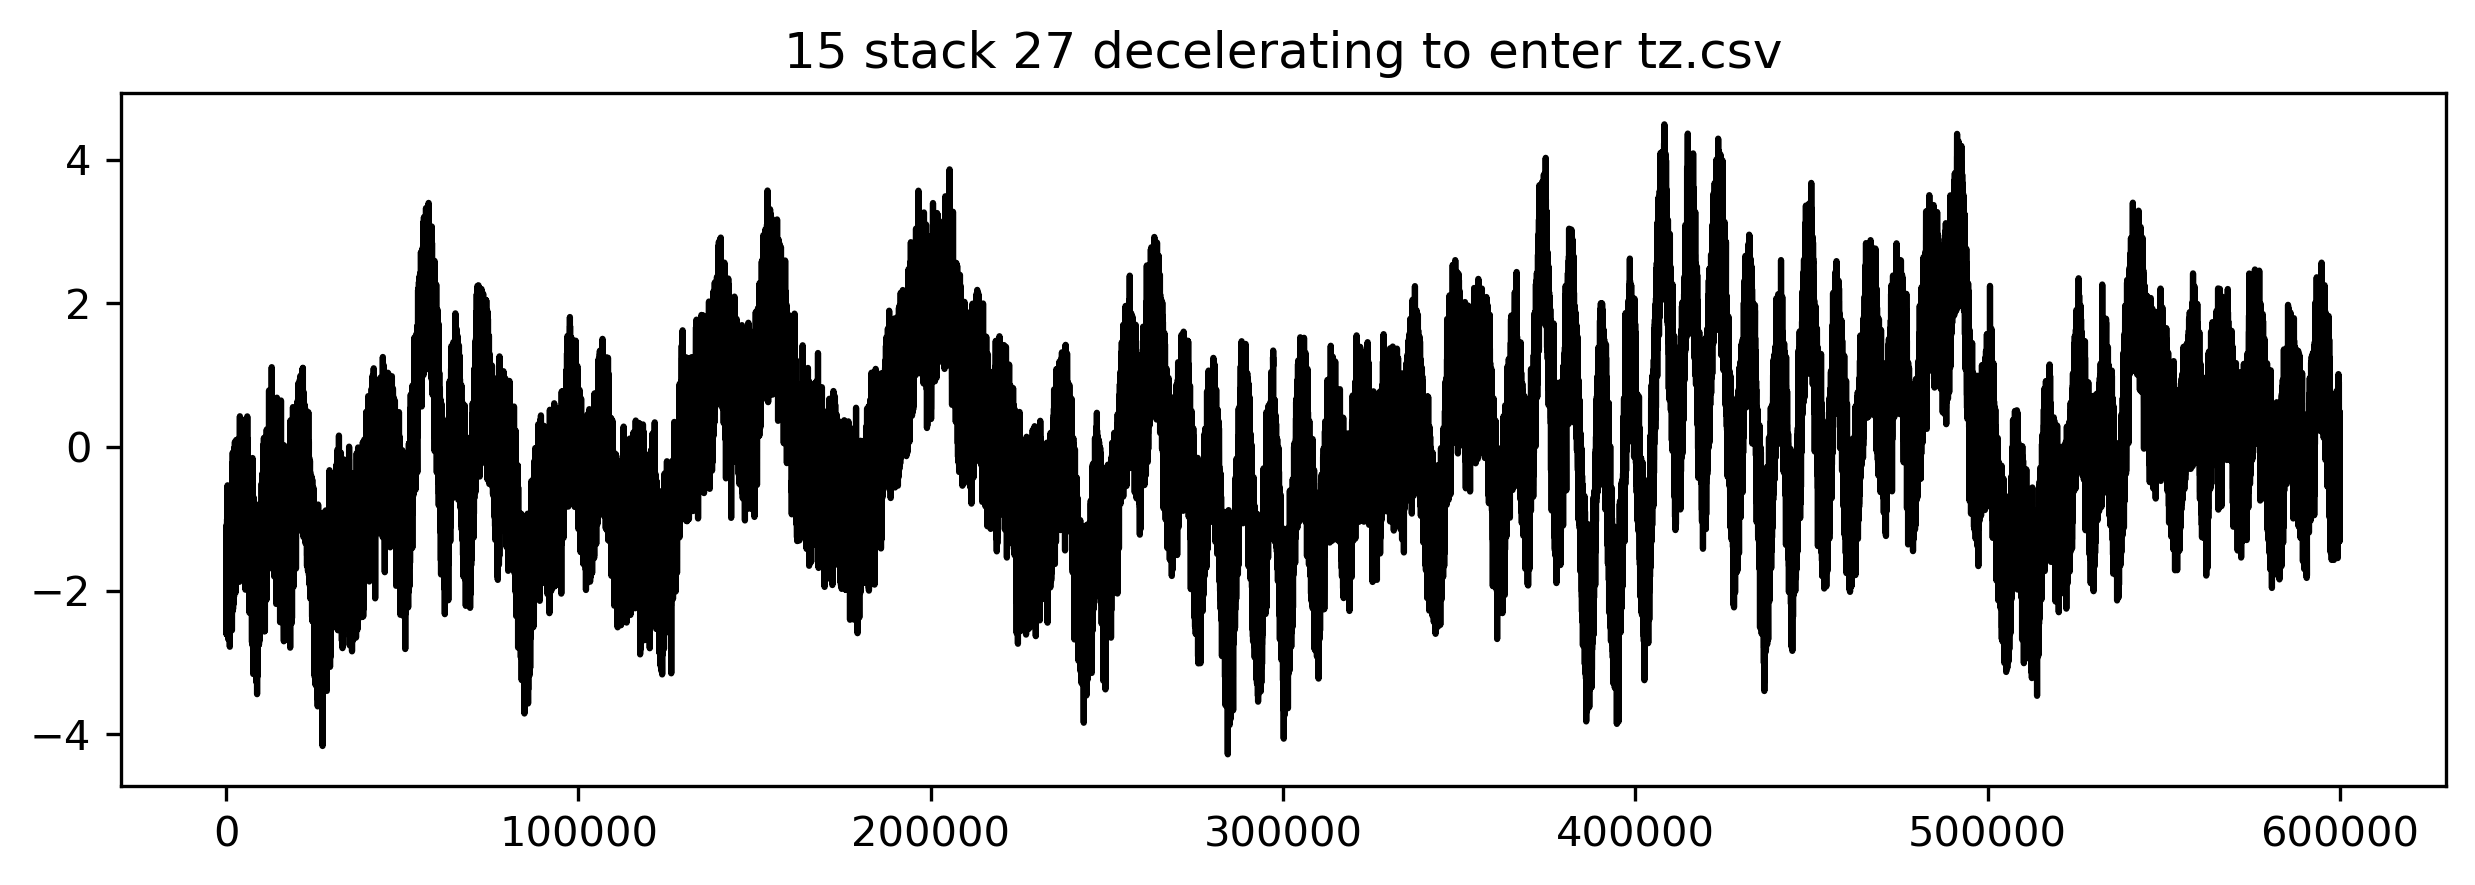

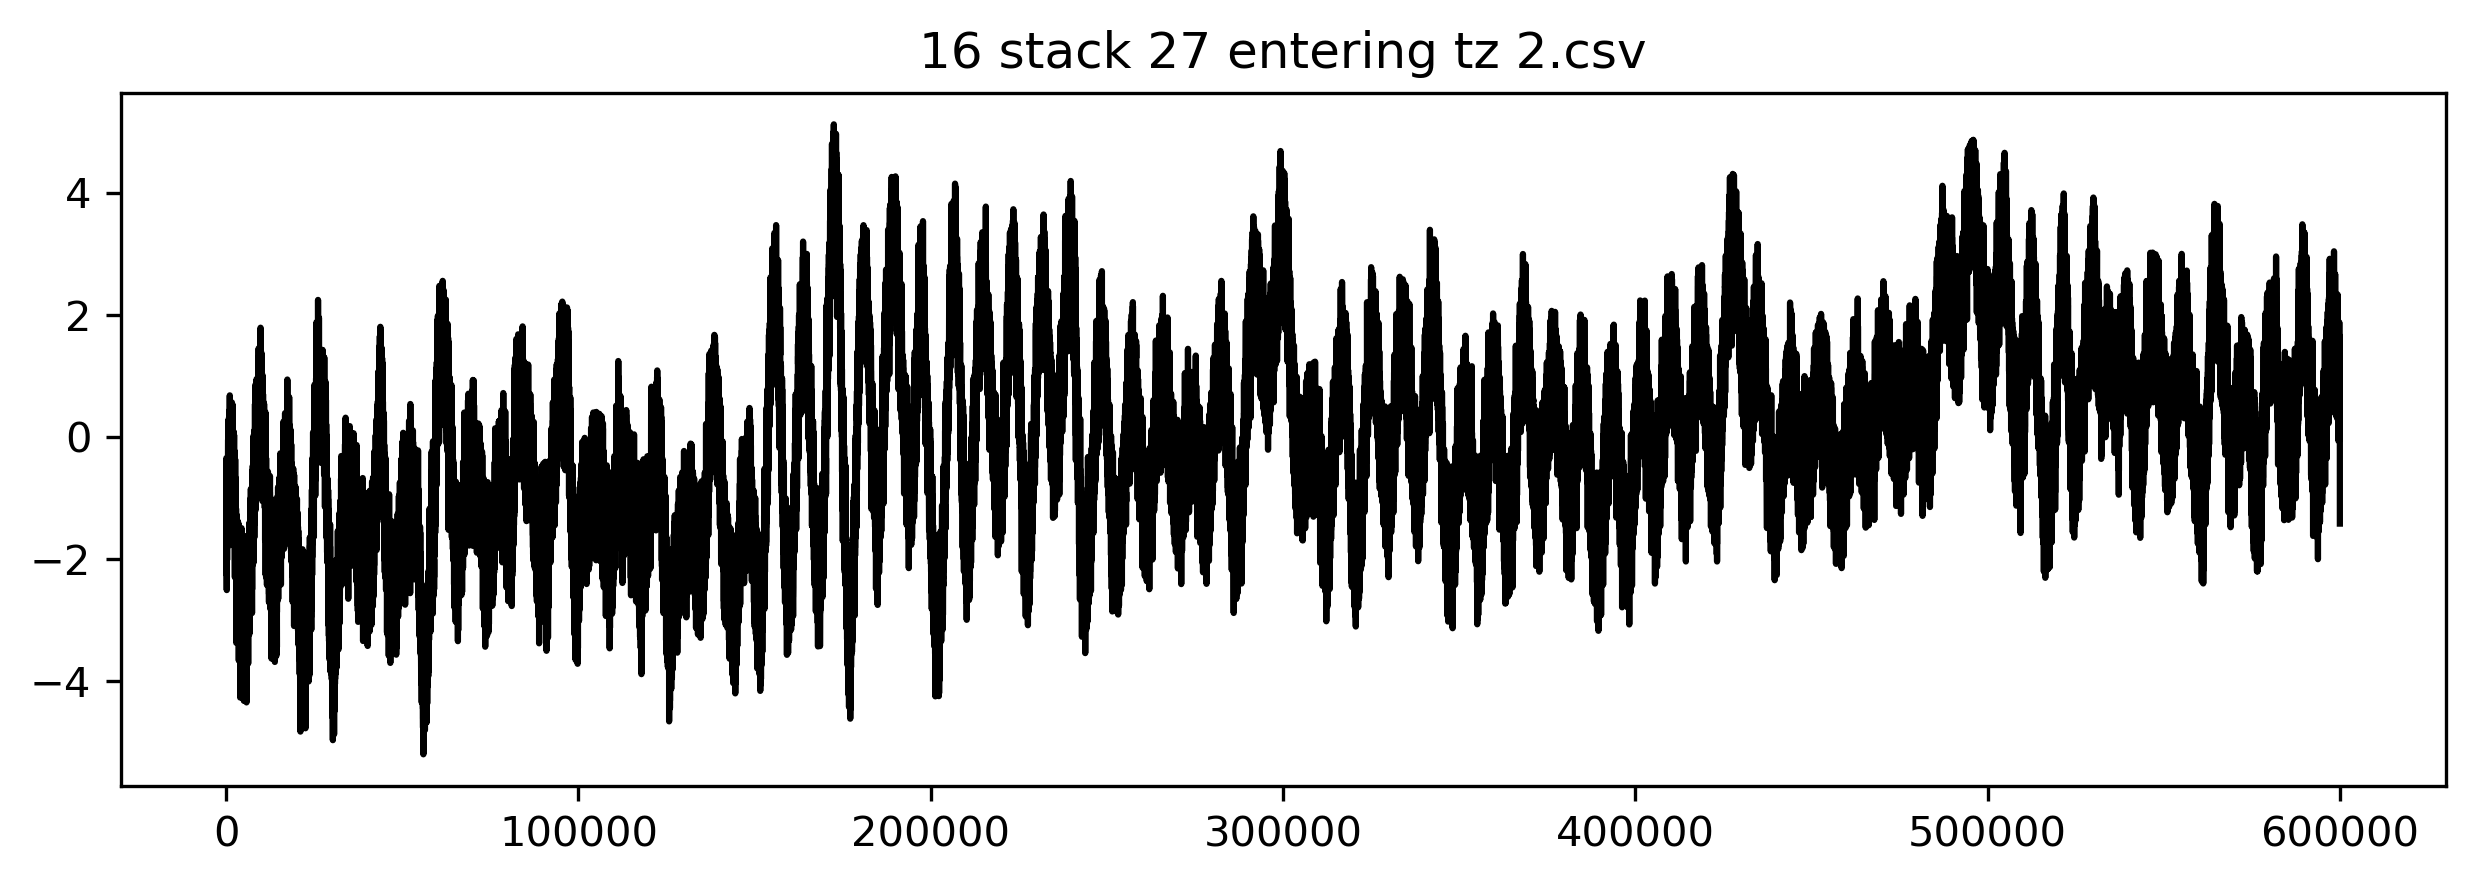

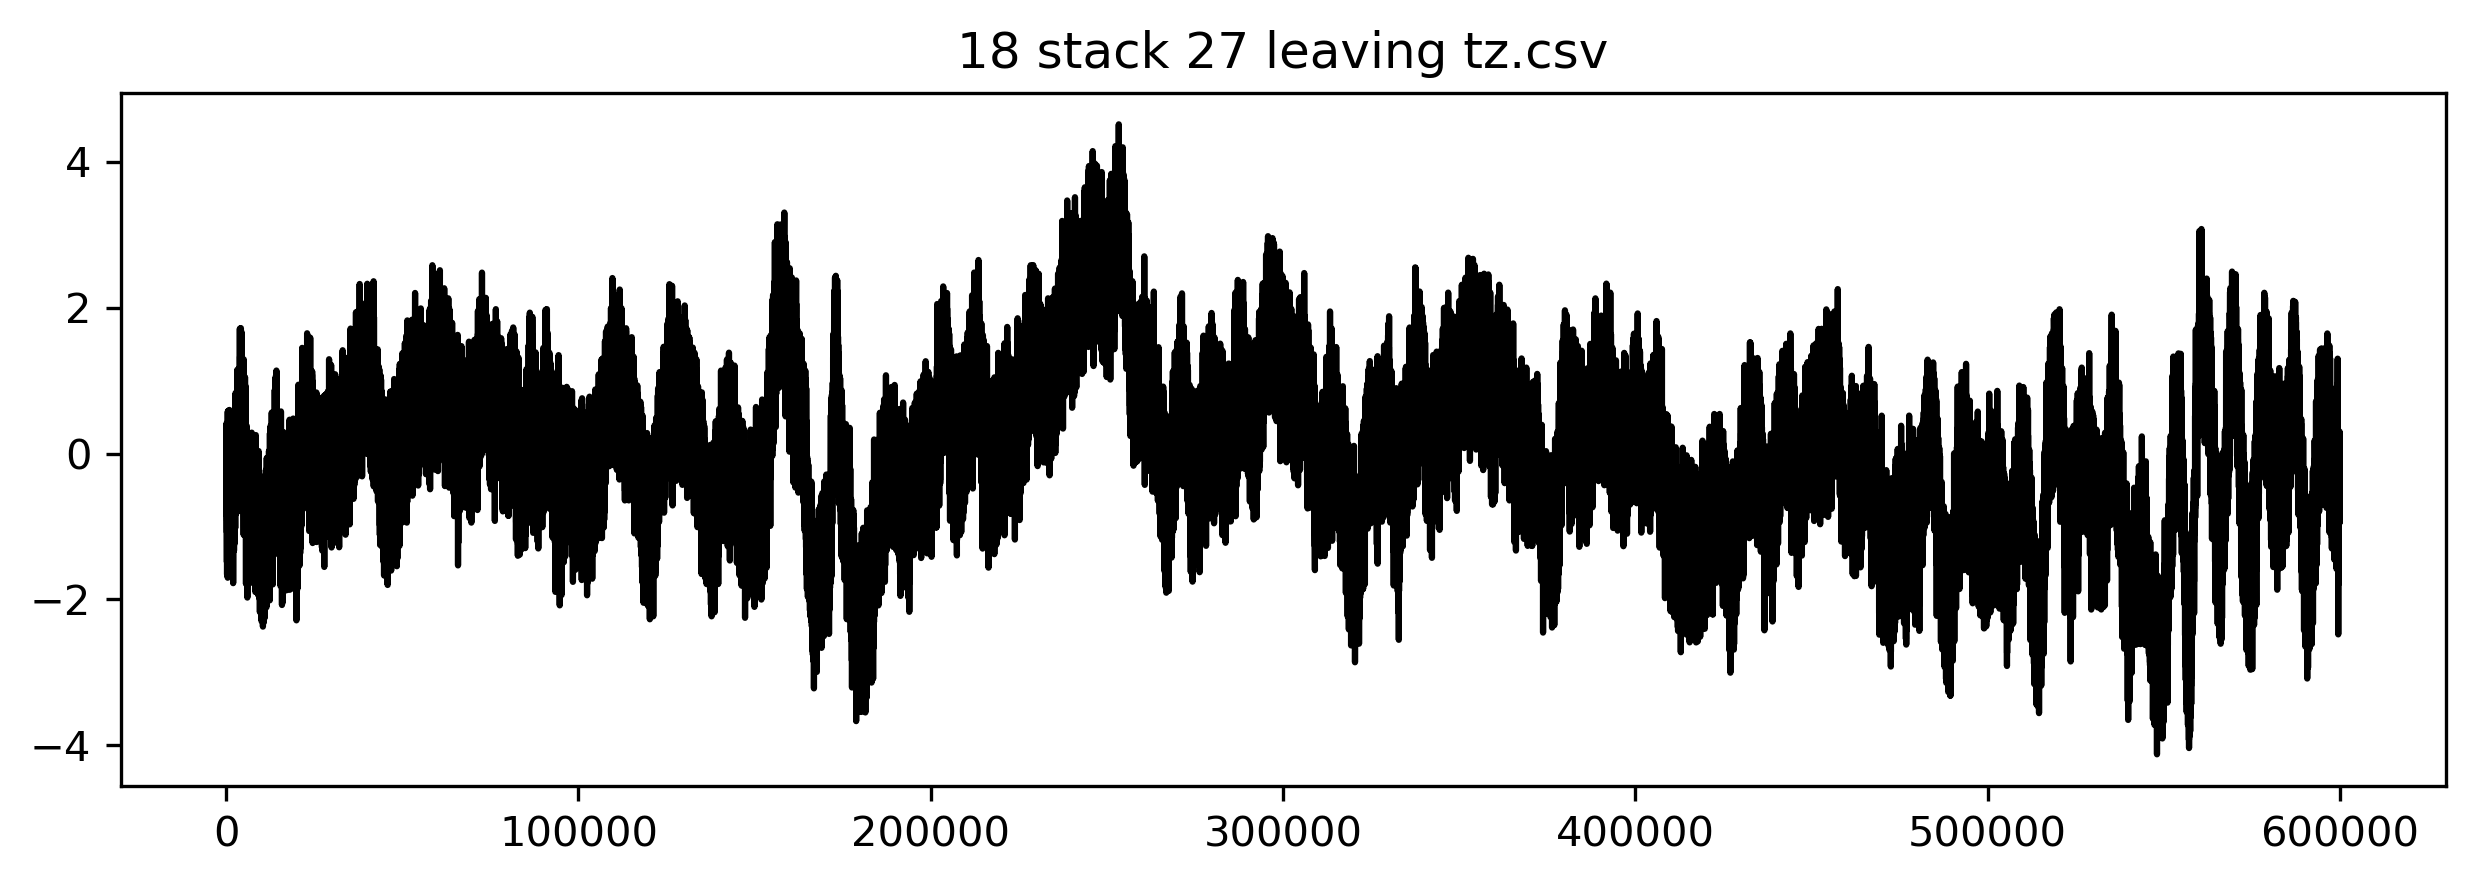

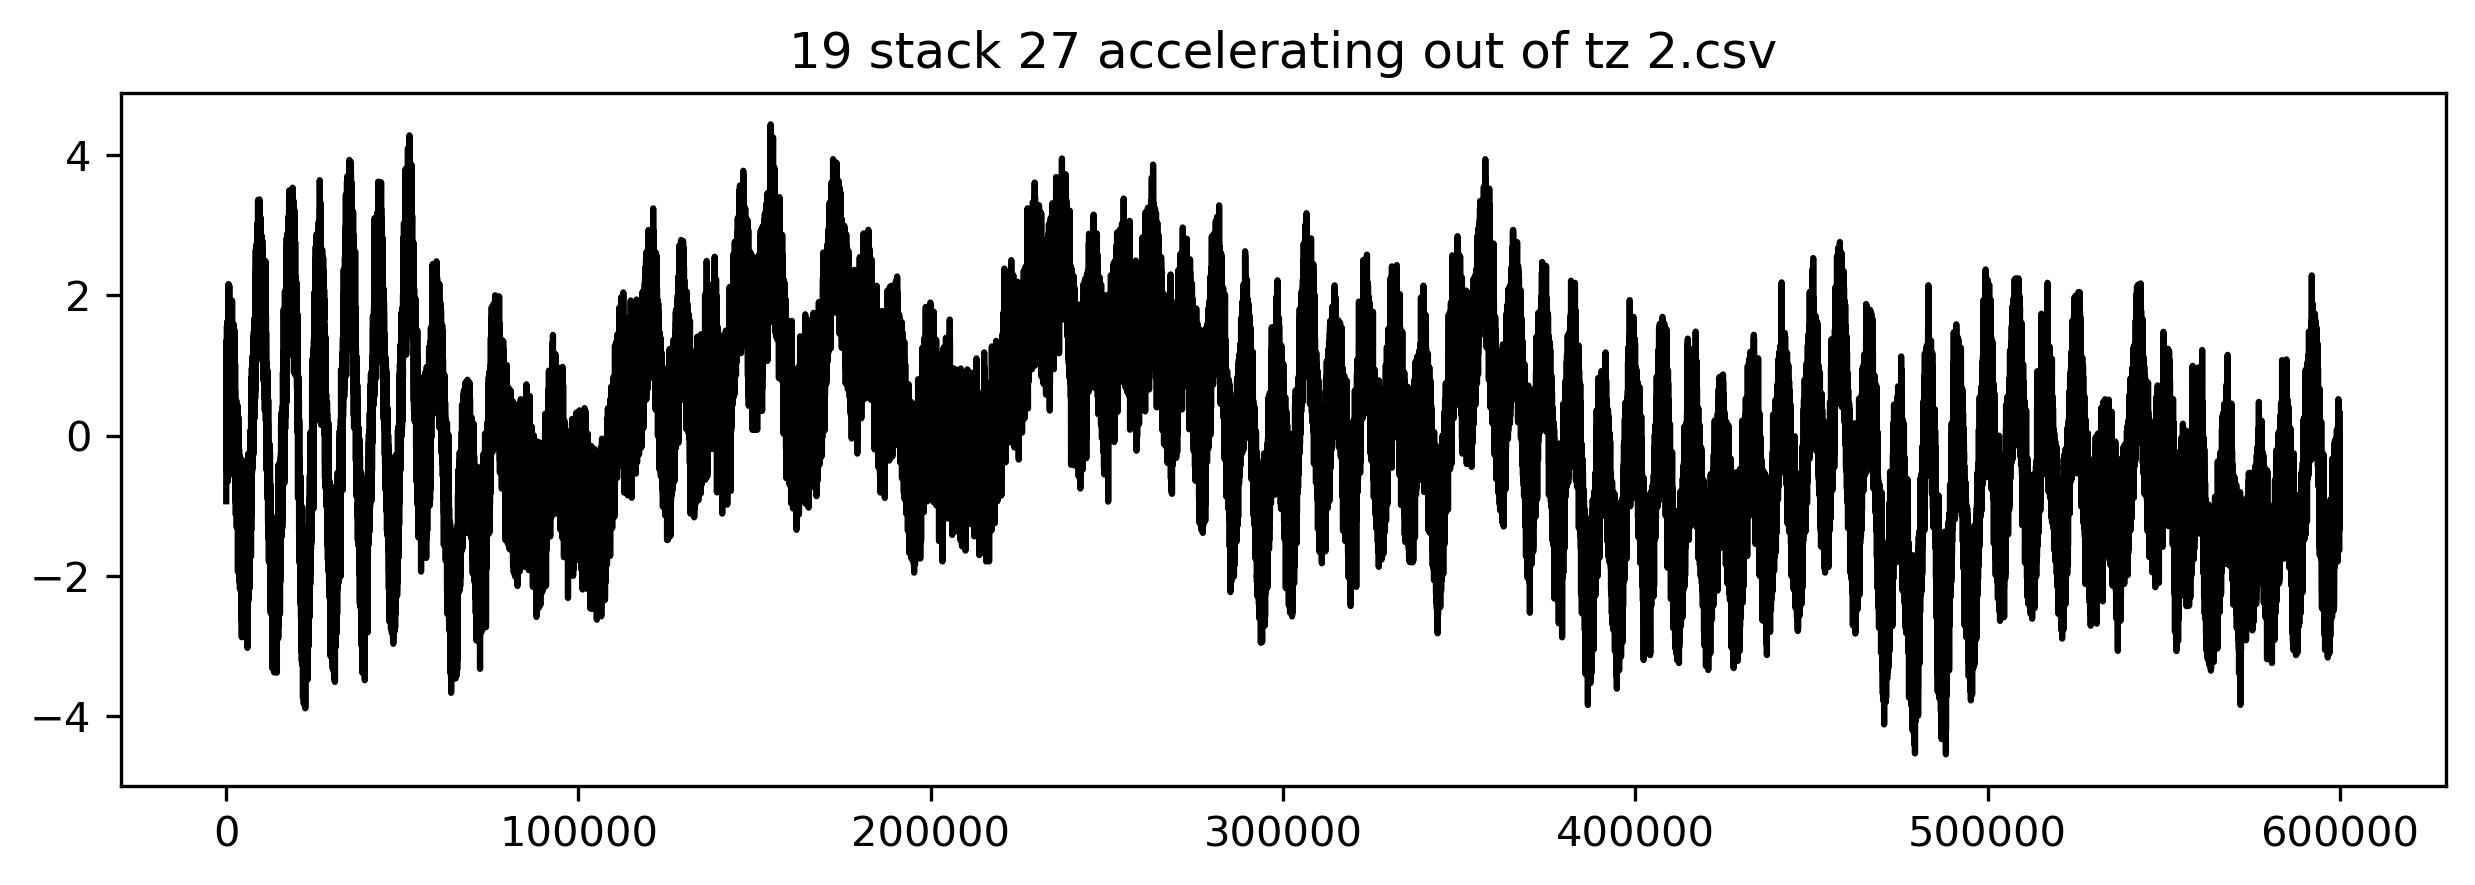

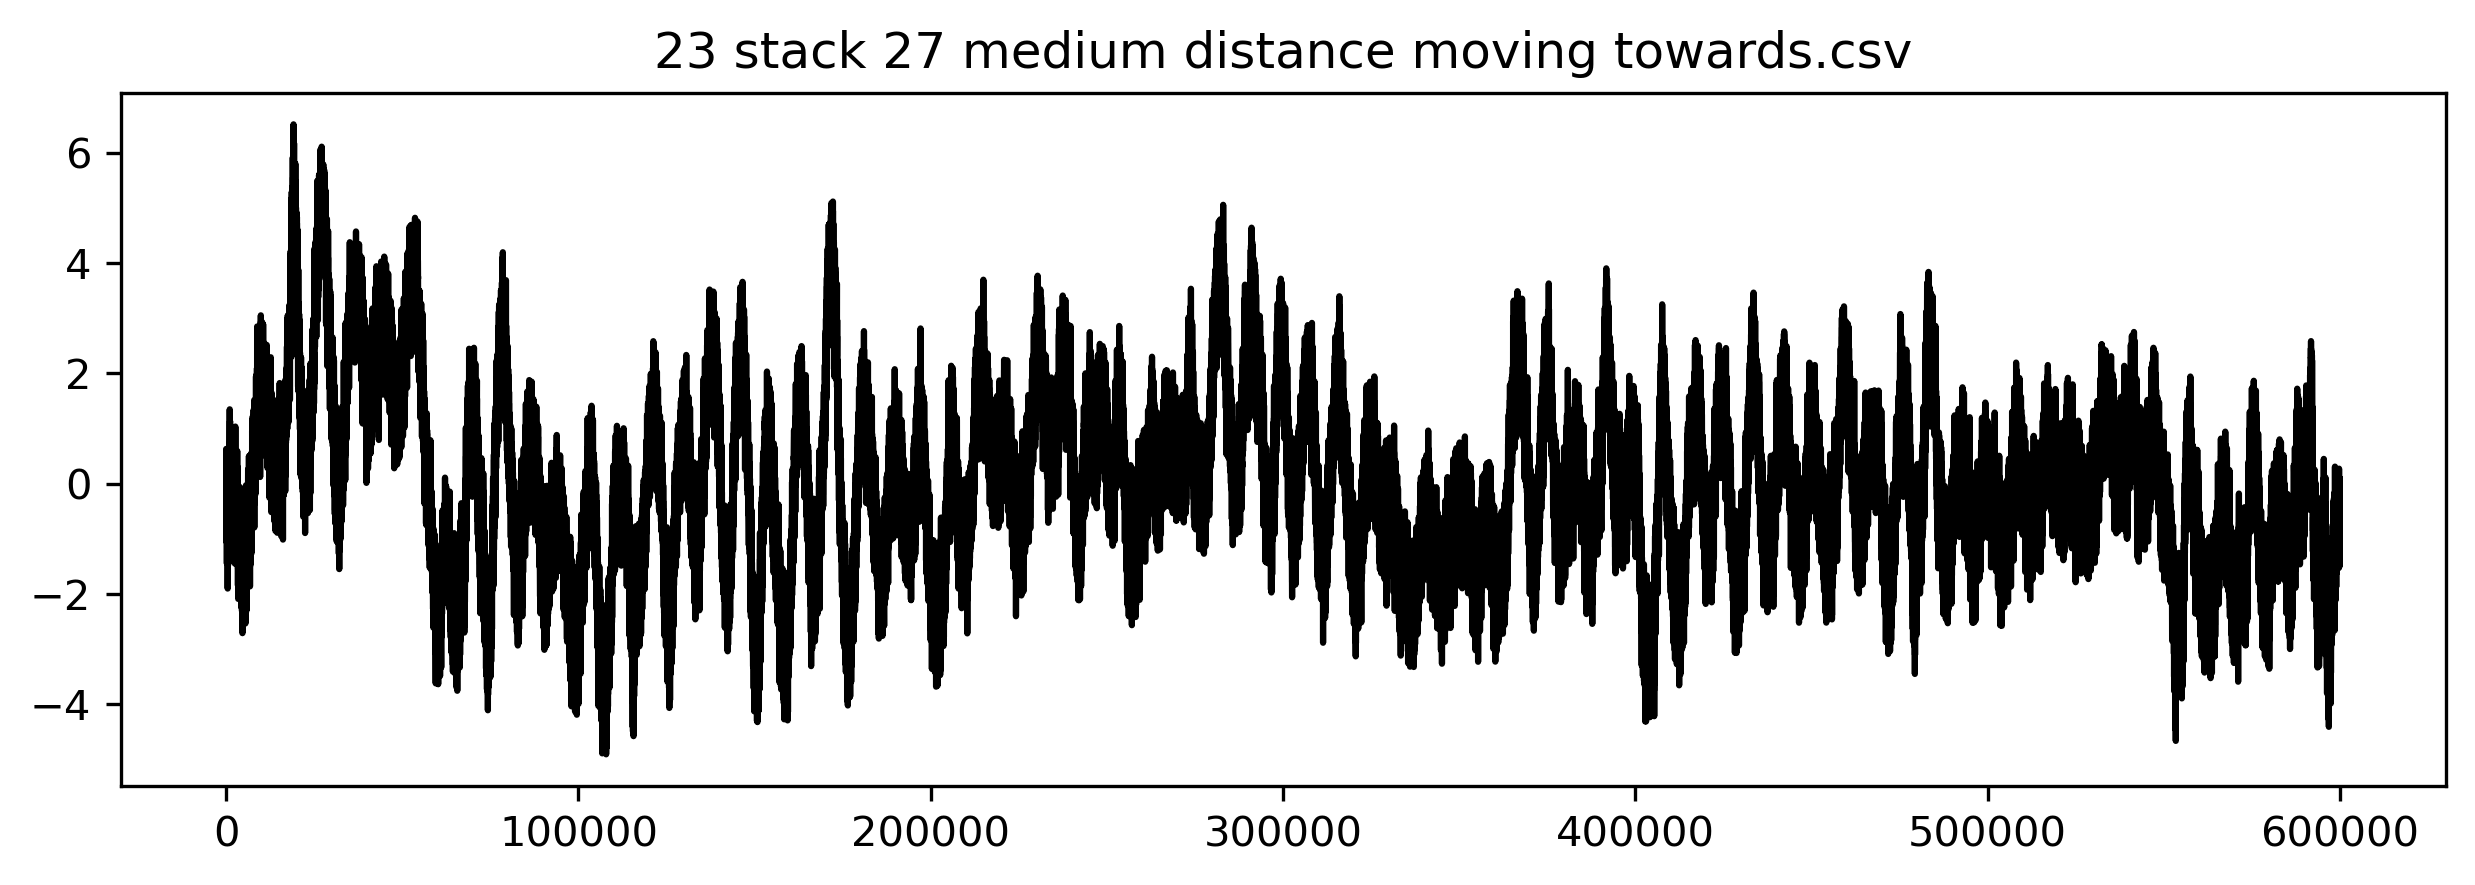

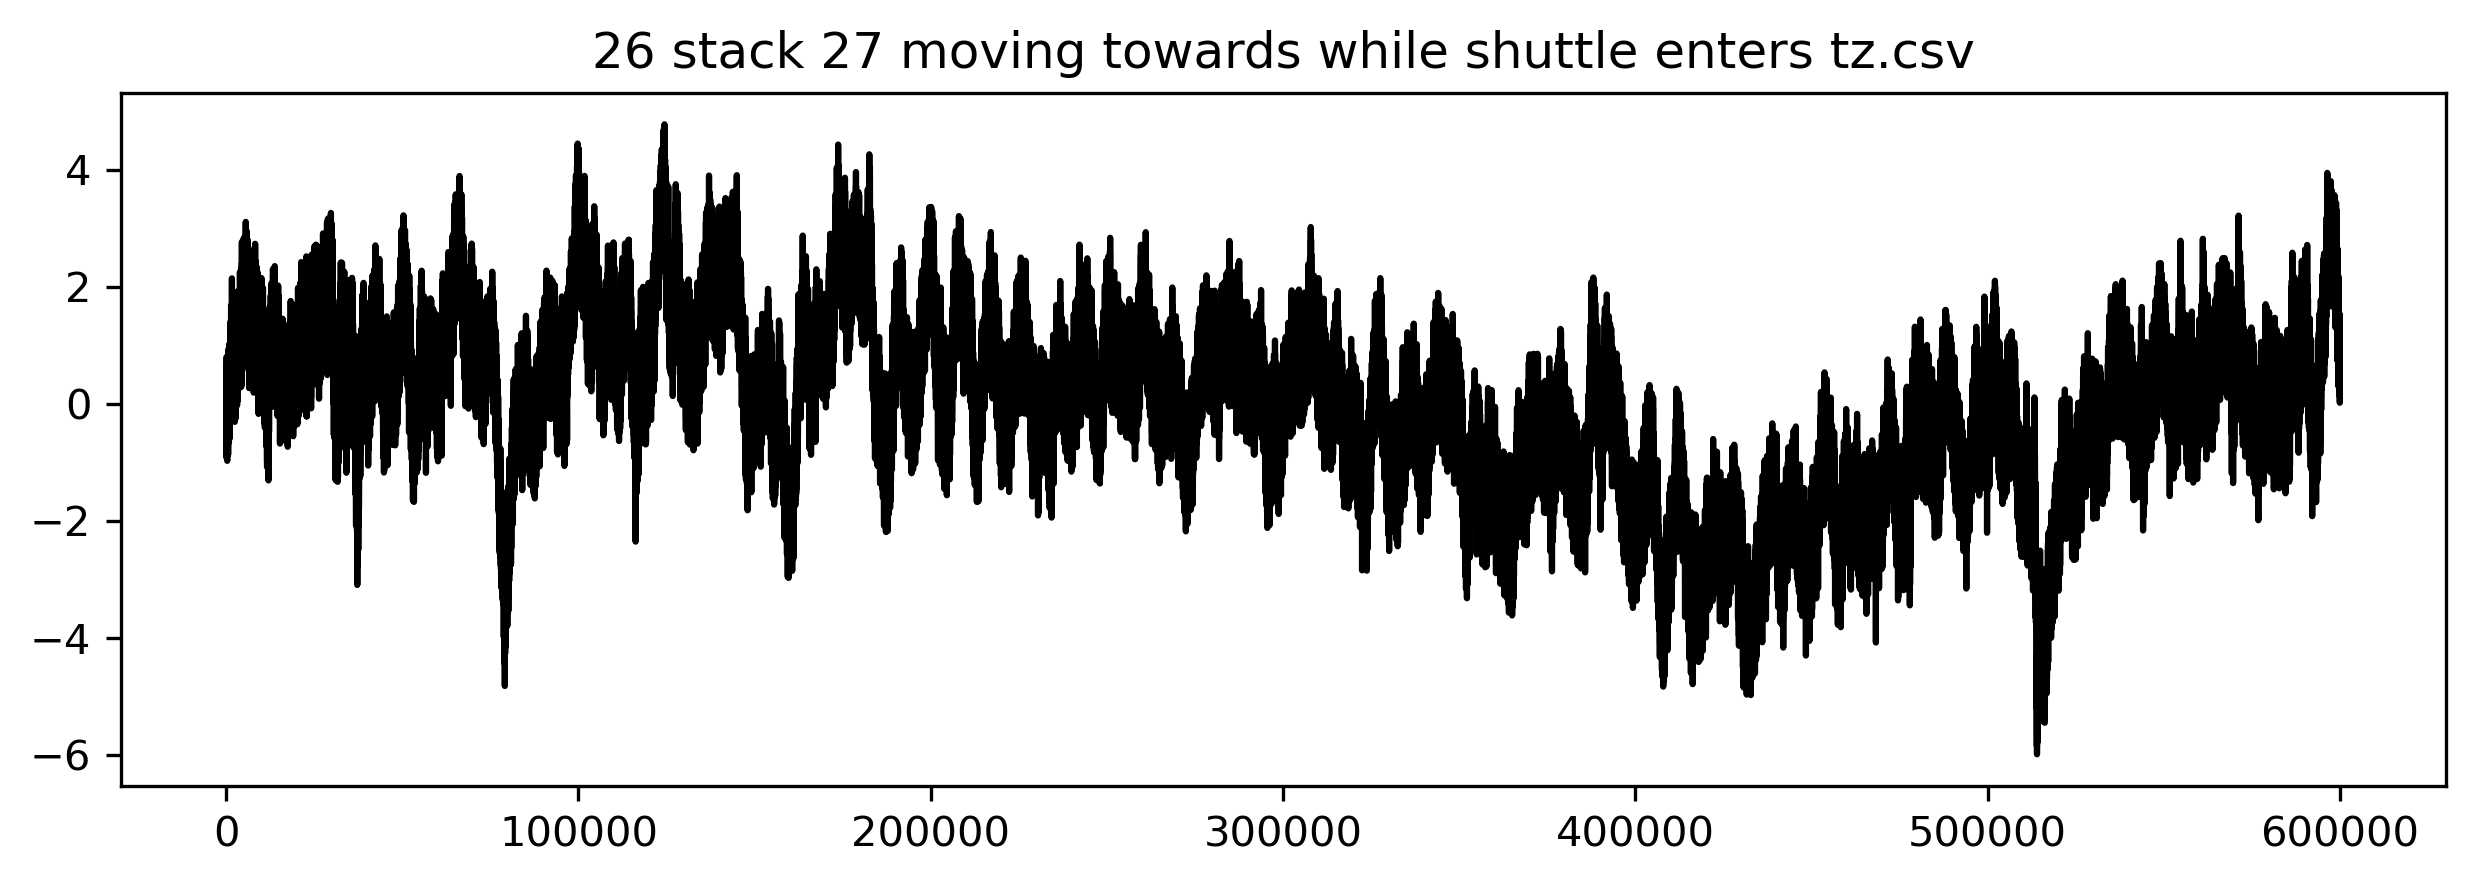

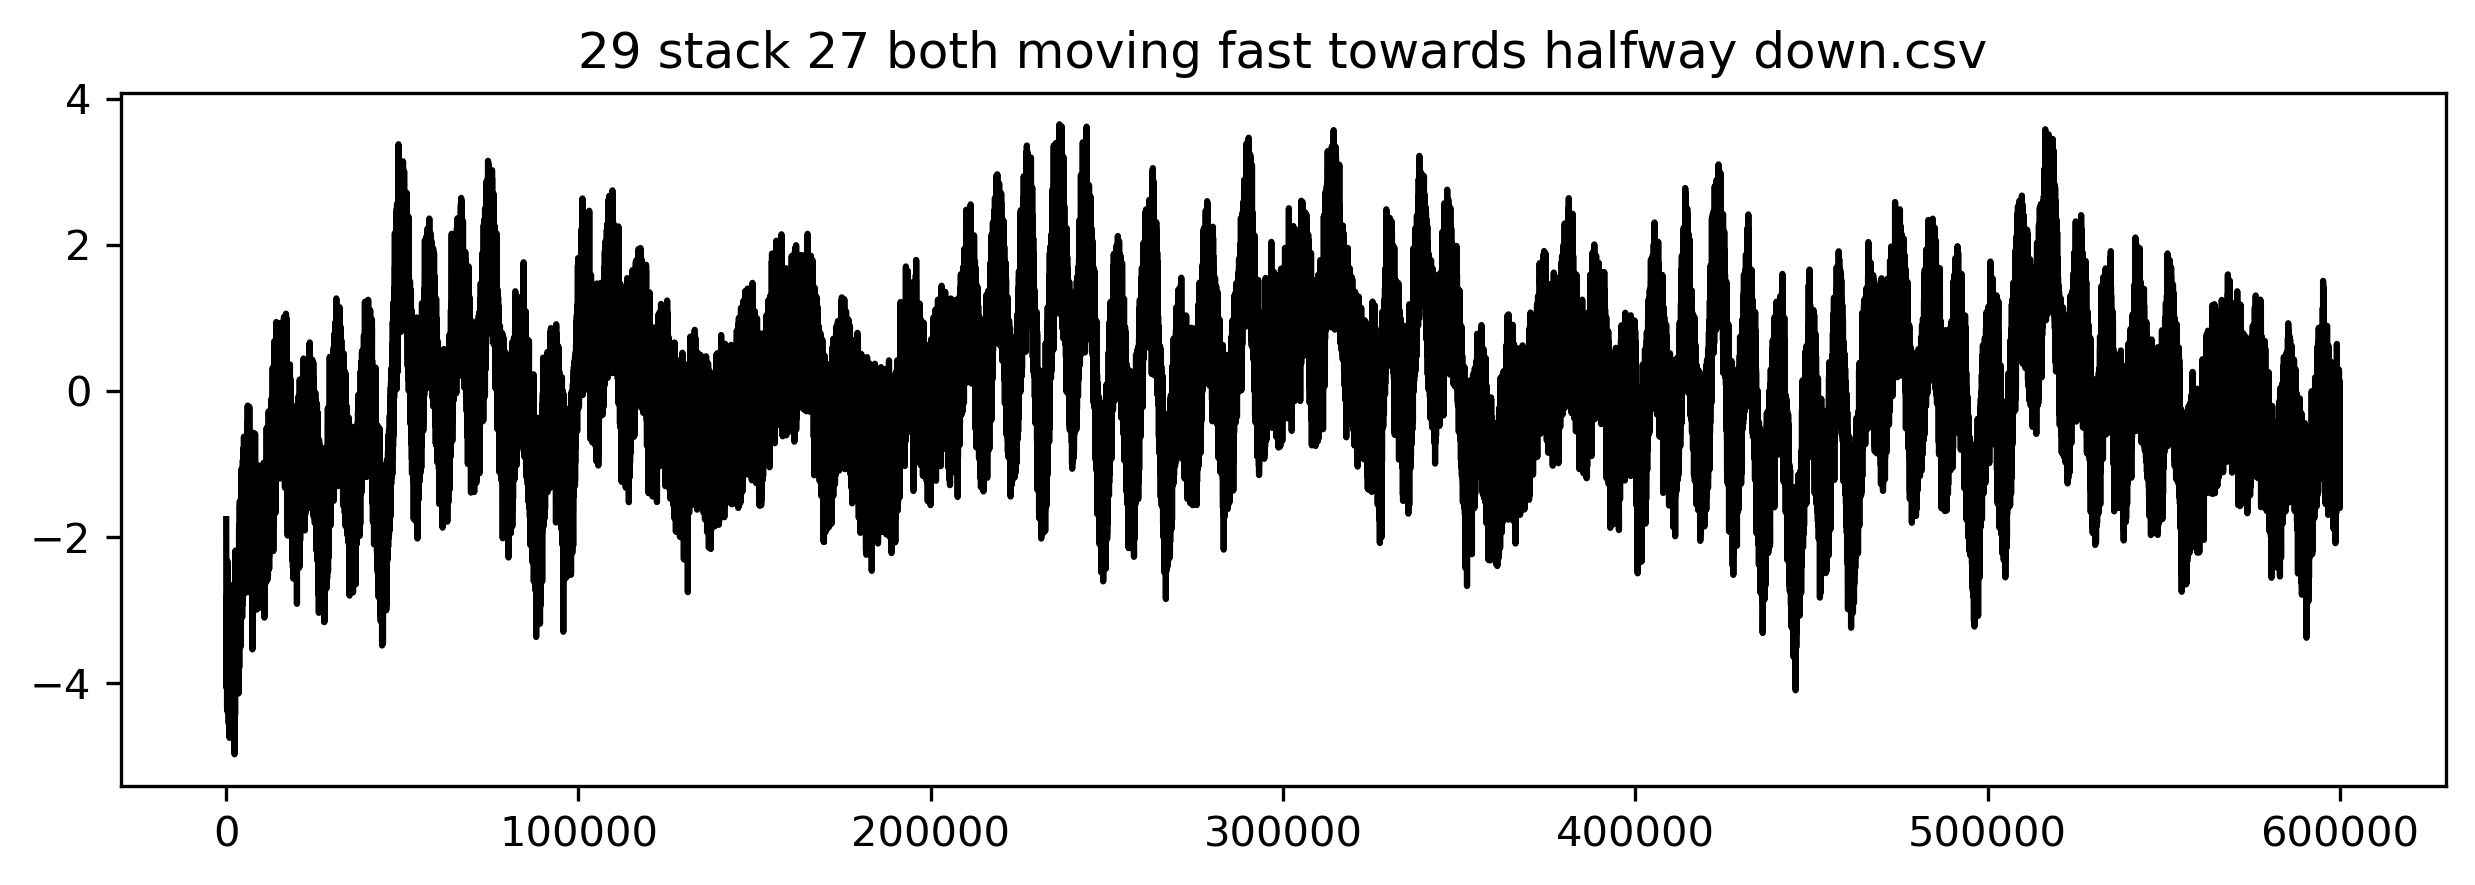

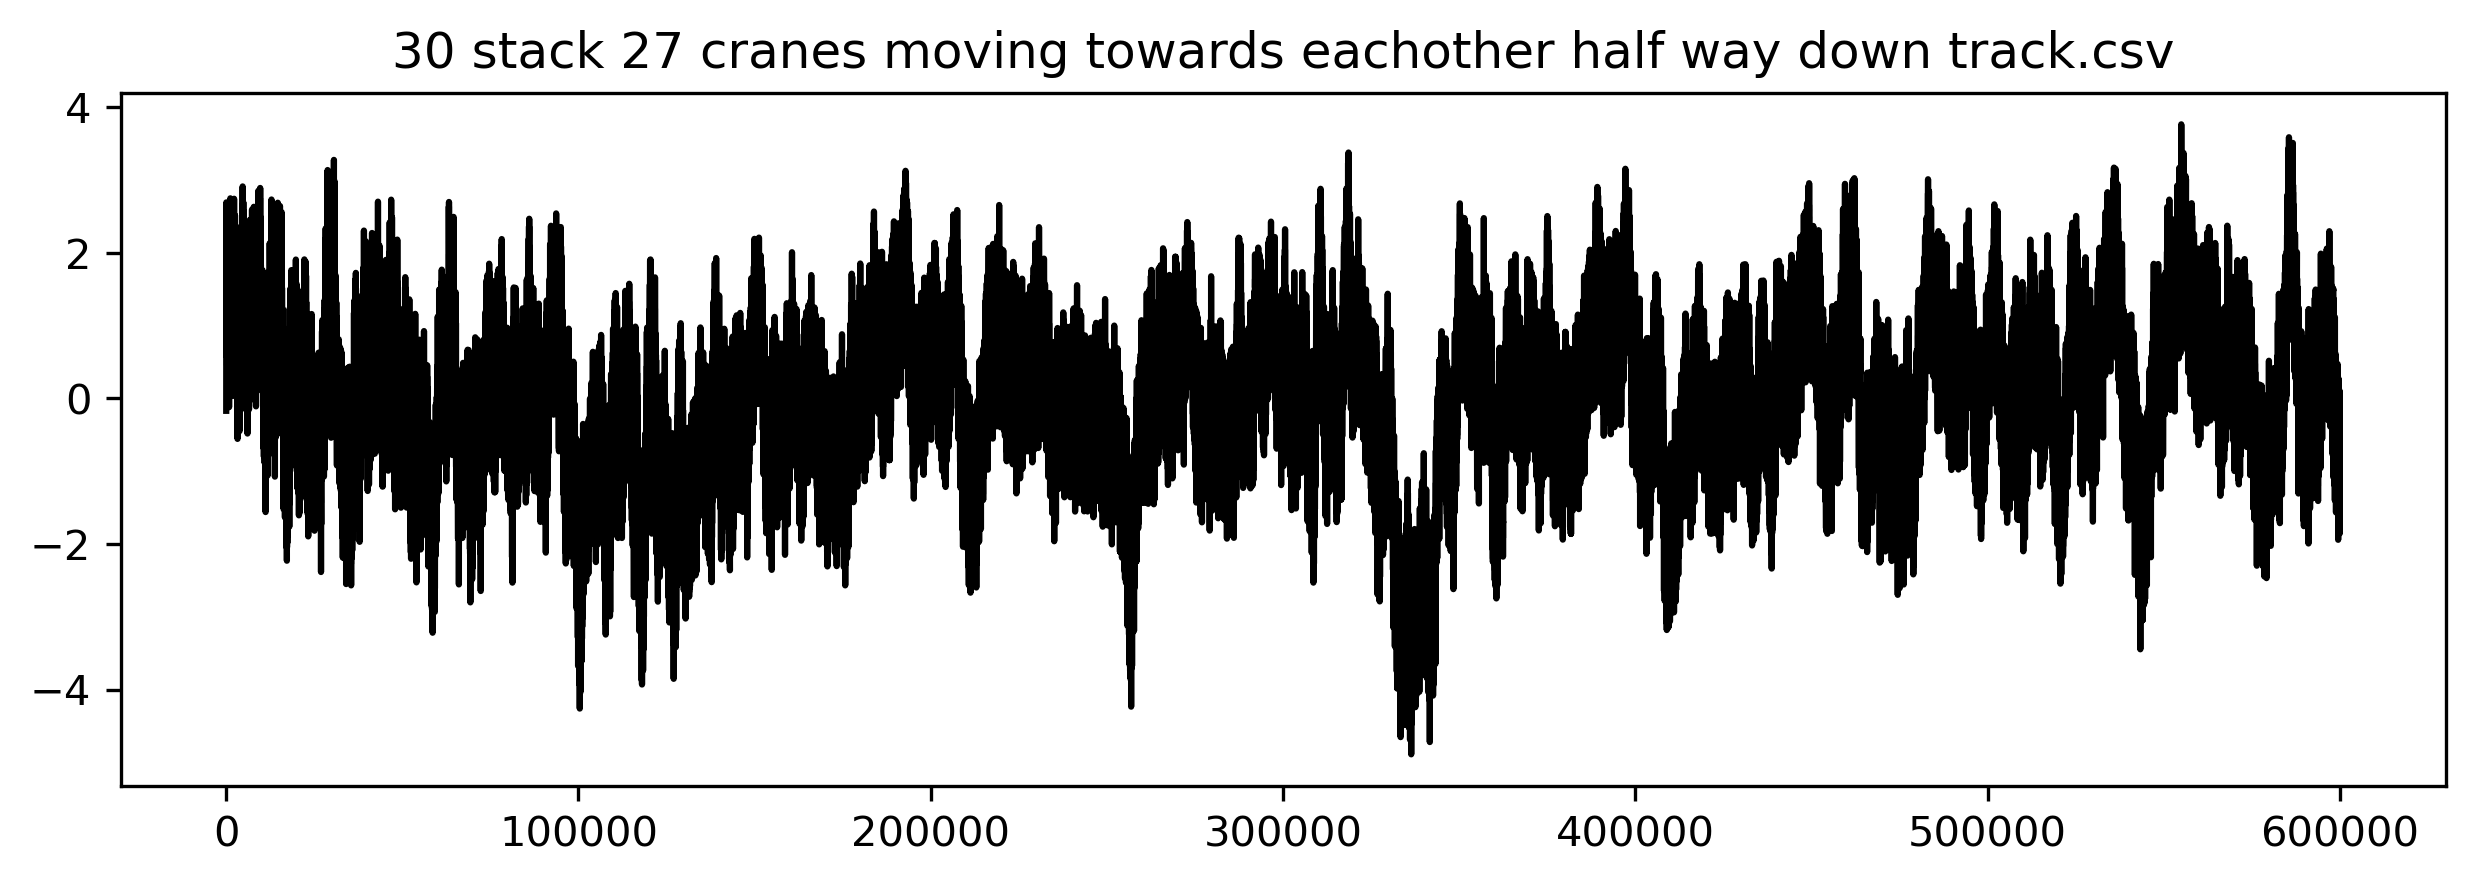

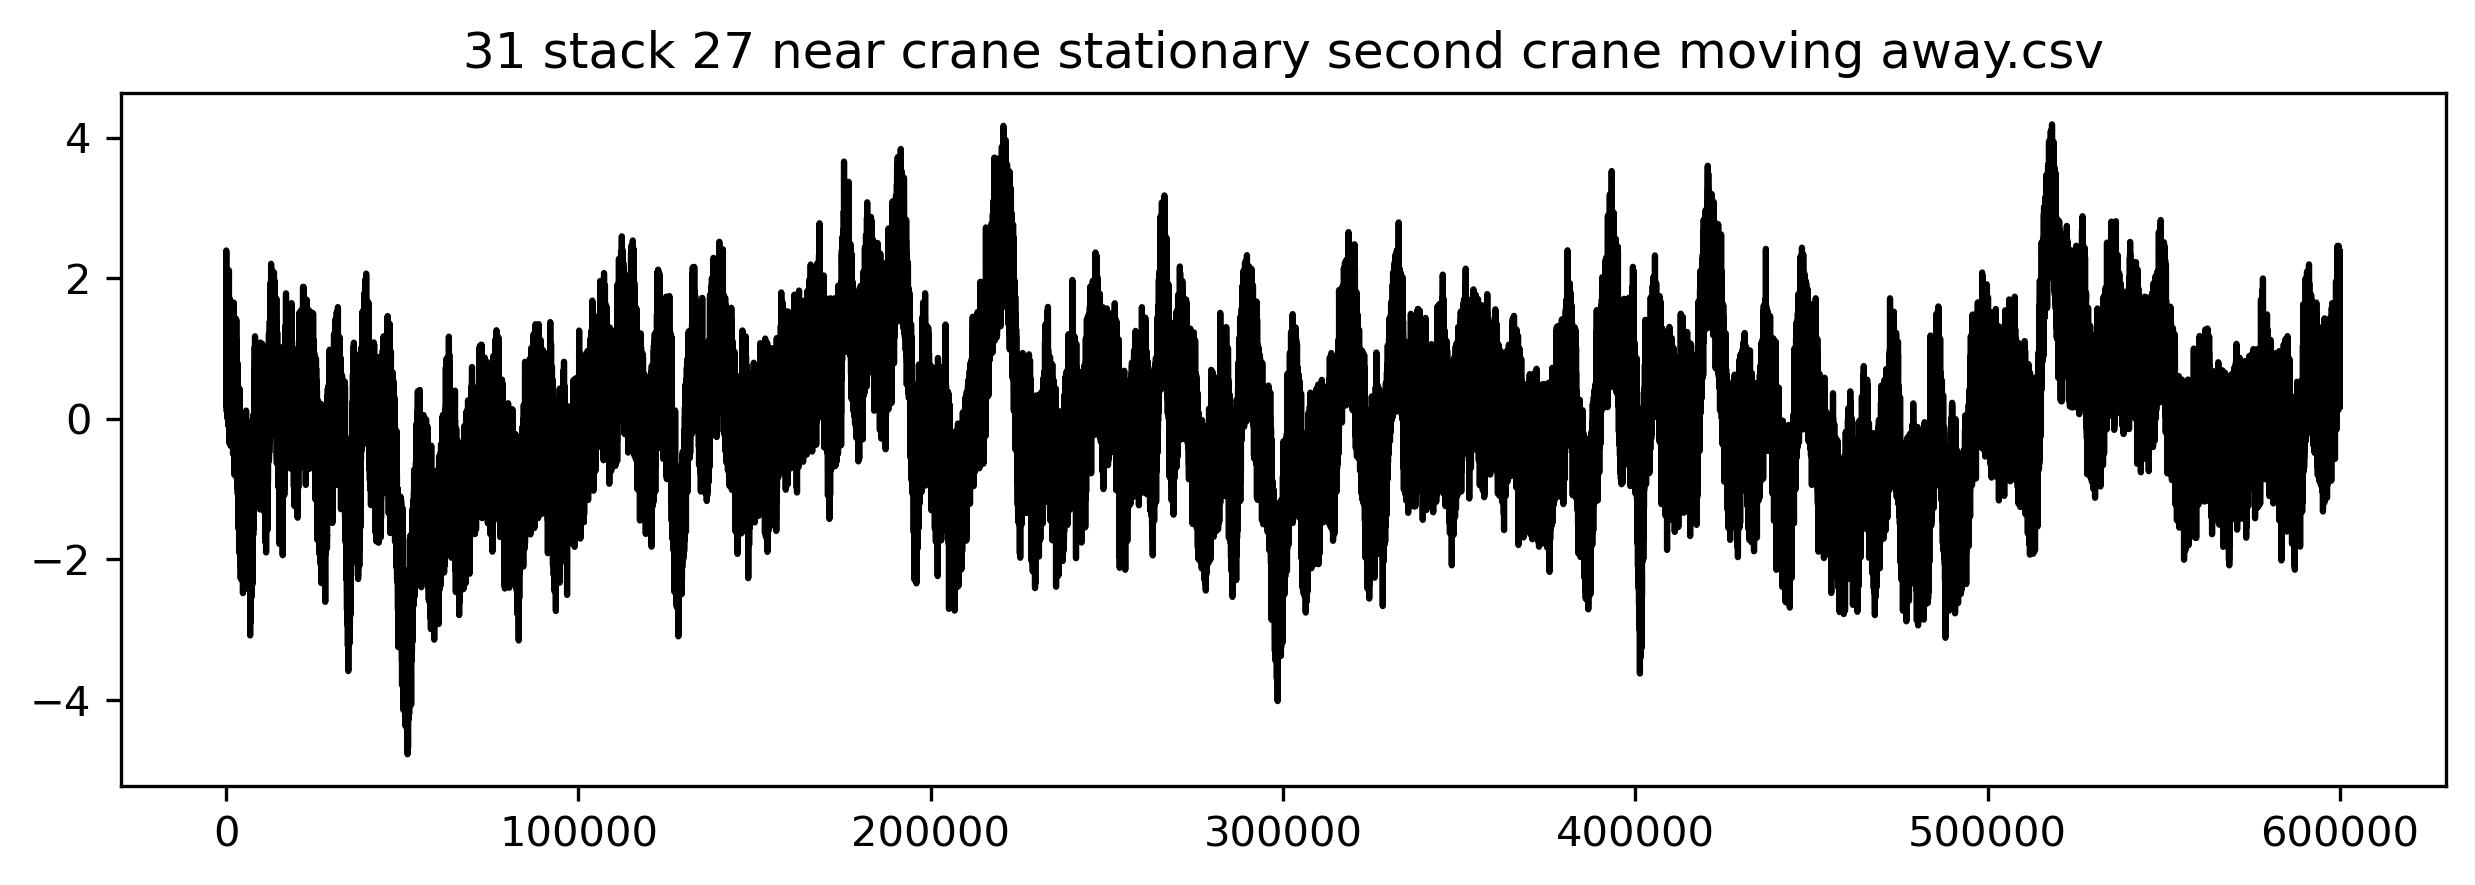

In [13]:
# make all wavelets one file
for g in good:
    file = f2[g]
    ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    ODataSet = ODataSet[:,2:5]
    for coord in range(2):
        for j in range(np.shape(ODataSet)[0]-1):
            try:
                ODataSet[j,coord] = float(ODataSet[j,coord])
            except:
                ODataSet[j,coord] = ODataSet[j-1,coord]
            if ODataSet[j,coord] == -999.999:
                ODataSet[j,coord] = ODataSet[j-1,coord]

    Diffs = np.zeros(np.shape(ODataSet)[0])
    for j in range(np.shape(ODataSet)[0]-1):
        Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
    norm = np.average(Diffs)
    Diffs[:]-=norm
    Cdiff = cf.Smoothing(Diffs,2,dets_to_remove=3)
    
    fig=plt.figure(figsize=(10,3),dpi=300)
    plt.plot(Cdiff)
    plt.title(str(g) + ' ' + file)
    plt.show()
    
    

## Functions for visual search


In [14]:
def focusArea(f, start, end, Wvlt = wvlt):
    file = f2[f]
    ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    ODataSet = ODataSet[:,2:5]
    for coord in range(2):
        for j in range(np.shape(ODataSet)[0]-1):
            try:
                ODataSet[j,coord] = float(ODataSet[j,coord])
            except:
                ODataSet[j,coord] = ODataSet[j-1,coord]
            if ODataSet[j,coord] == -999.999:
                ODataSet[j,coord] = ODataSet[j-1,coord]

    Diffs = np.zeros(np.shape(ODataSet)[0])
    for j in range(np.shape(ODataSet)[0]-1):
        Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
    norm = np.average(ODataSet[:,0])
    ODataSet[:,0]-=norm
    norm = np.average(ODataSet[:,1])
    ODataSet[:,1]-=norm
    norm = np.average(Diffs)
    Diffs[:]-=norm
    Cdiff = cf.Smoothing(Diffs,2,dets_to_remove=3)
    
    if end > len(Cdiff):
        end = len(Cdiff)
    
    fig,axs = plt.subplots(2,figsize=(6,4), dpi=600)
    plt.subplots_adjust(hspace=0.5)
    plt.title(str(f)+' ' + file)
    axs[0].plot(Cdiff[25:-50], linewidth=0.5)
    axs[1].plot(np.linspace(start,end,end-start),Cdiff[start:end]-np.average(Cdiff[start:end]), linewidth=0.5)
    plt.show()
    
    return Cdiff

In [15]:
def focusRanges(CDiff, start, scales=50, Wvlt = wvlt,skips=1,lengths=1000):
    fig,axs = plt.subplots(5,figsize=(6,3), dpi=1200)
    plt.subplots_adjust(hspace=0.5)
    Y = np.arange(0,scales)

    for j in range(5):
        i=j-1
        starts = start + i*lengths
        ends = starts + 3*lengths
        NData = CDiff[starts:ends]
        
        NData -= np.average(NData)
        newFP = cf.getThumbprint2(NData, Wvlt, scales,skips)
        X = np.arange(starts+lengths,ends-lengths,dtype=int)
        axs[j].contourf(X,Y,newFP[lengths:2*lengths].T, cmap='gist_gray')
    #    axs[j].xaxis.set_ticks(X)
        axs[j].set_xticklabels(axs[j].get_xticks(),fontsize=5)
        axs[j].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axs[j].set_yticklabels(axs[j].get_yticks(),fontsize=5)
        axs[j].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        #plt.title(str(start))
    plt.show()




In [16]:
def fineFocus(CDiff, start, gap, Wvlt = wvlt, scales=50, skips=1):
    starts = start-1000
    START = gap

    ends = starts + 4000
    
    NData = Cdiff[starts:ends]
    
    NData -= np.average(NData)
    newFP = cf.getThumbprint2(NData, Wvlt, scales,skips)
    X = np.arange(starts+START+1000,starts+START+1250)
    Y = np.arange(0,50)
    fig = plt.figure(figsize=(10,3), dpi=600)
    plt.contourf(X,Y,newFP[START+1000:START+1250].T, cmap='gist_gray')
    #plt.title(str(start))
    plt.show()

    return newFP[START+1000:START+1250].T

## File Search 1

In [17]:
start = 0
end = 50000

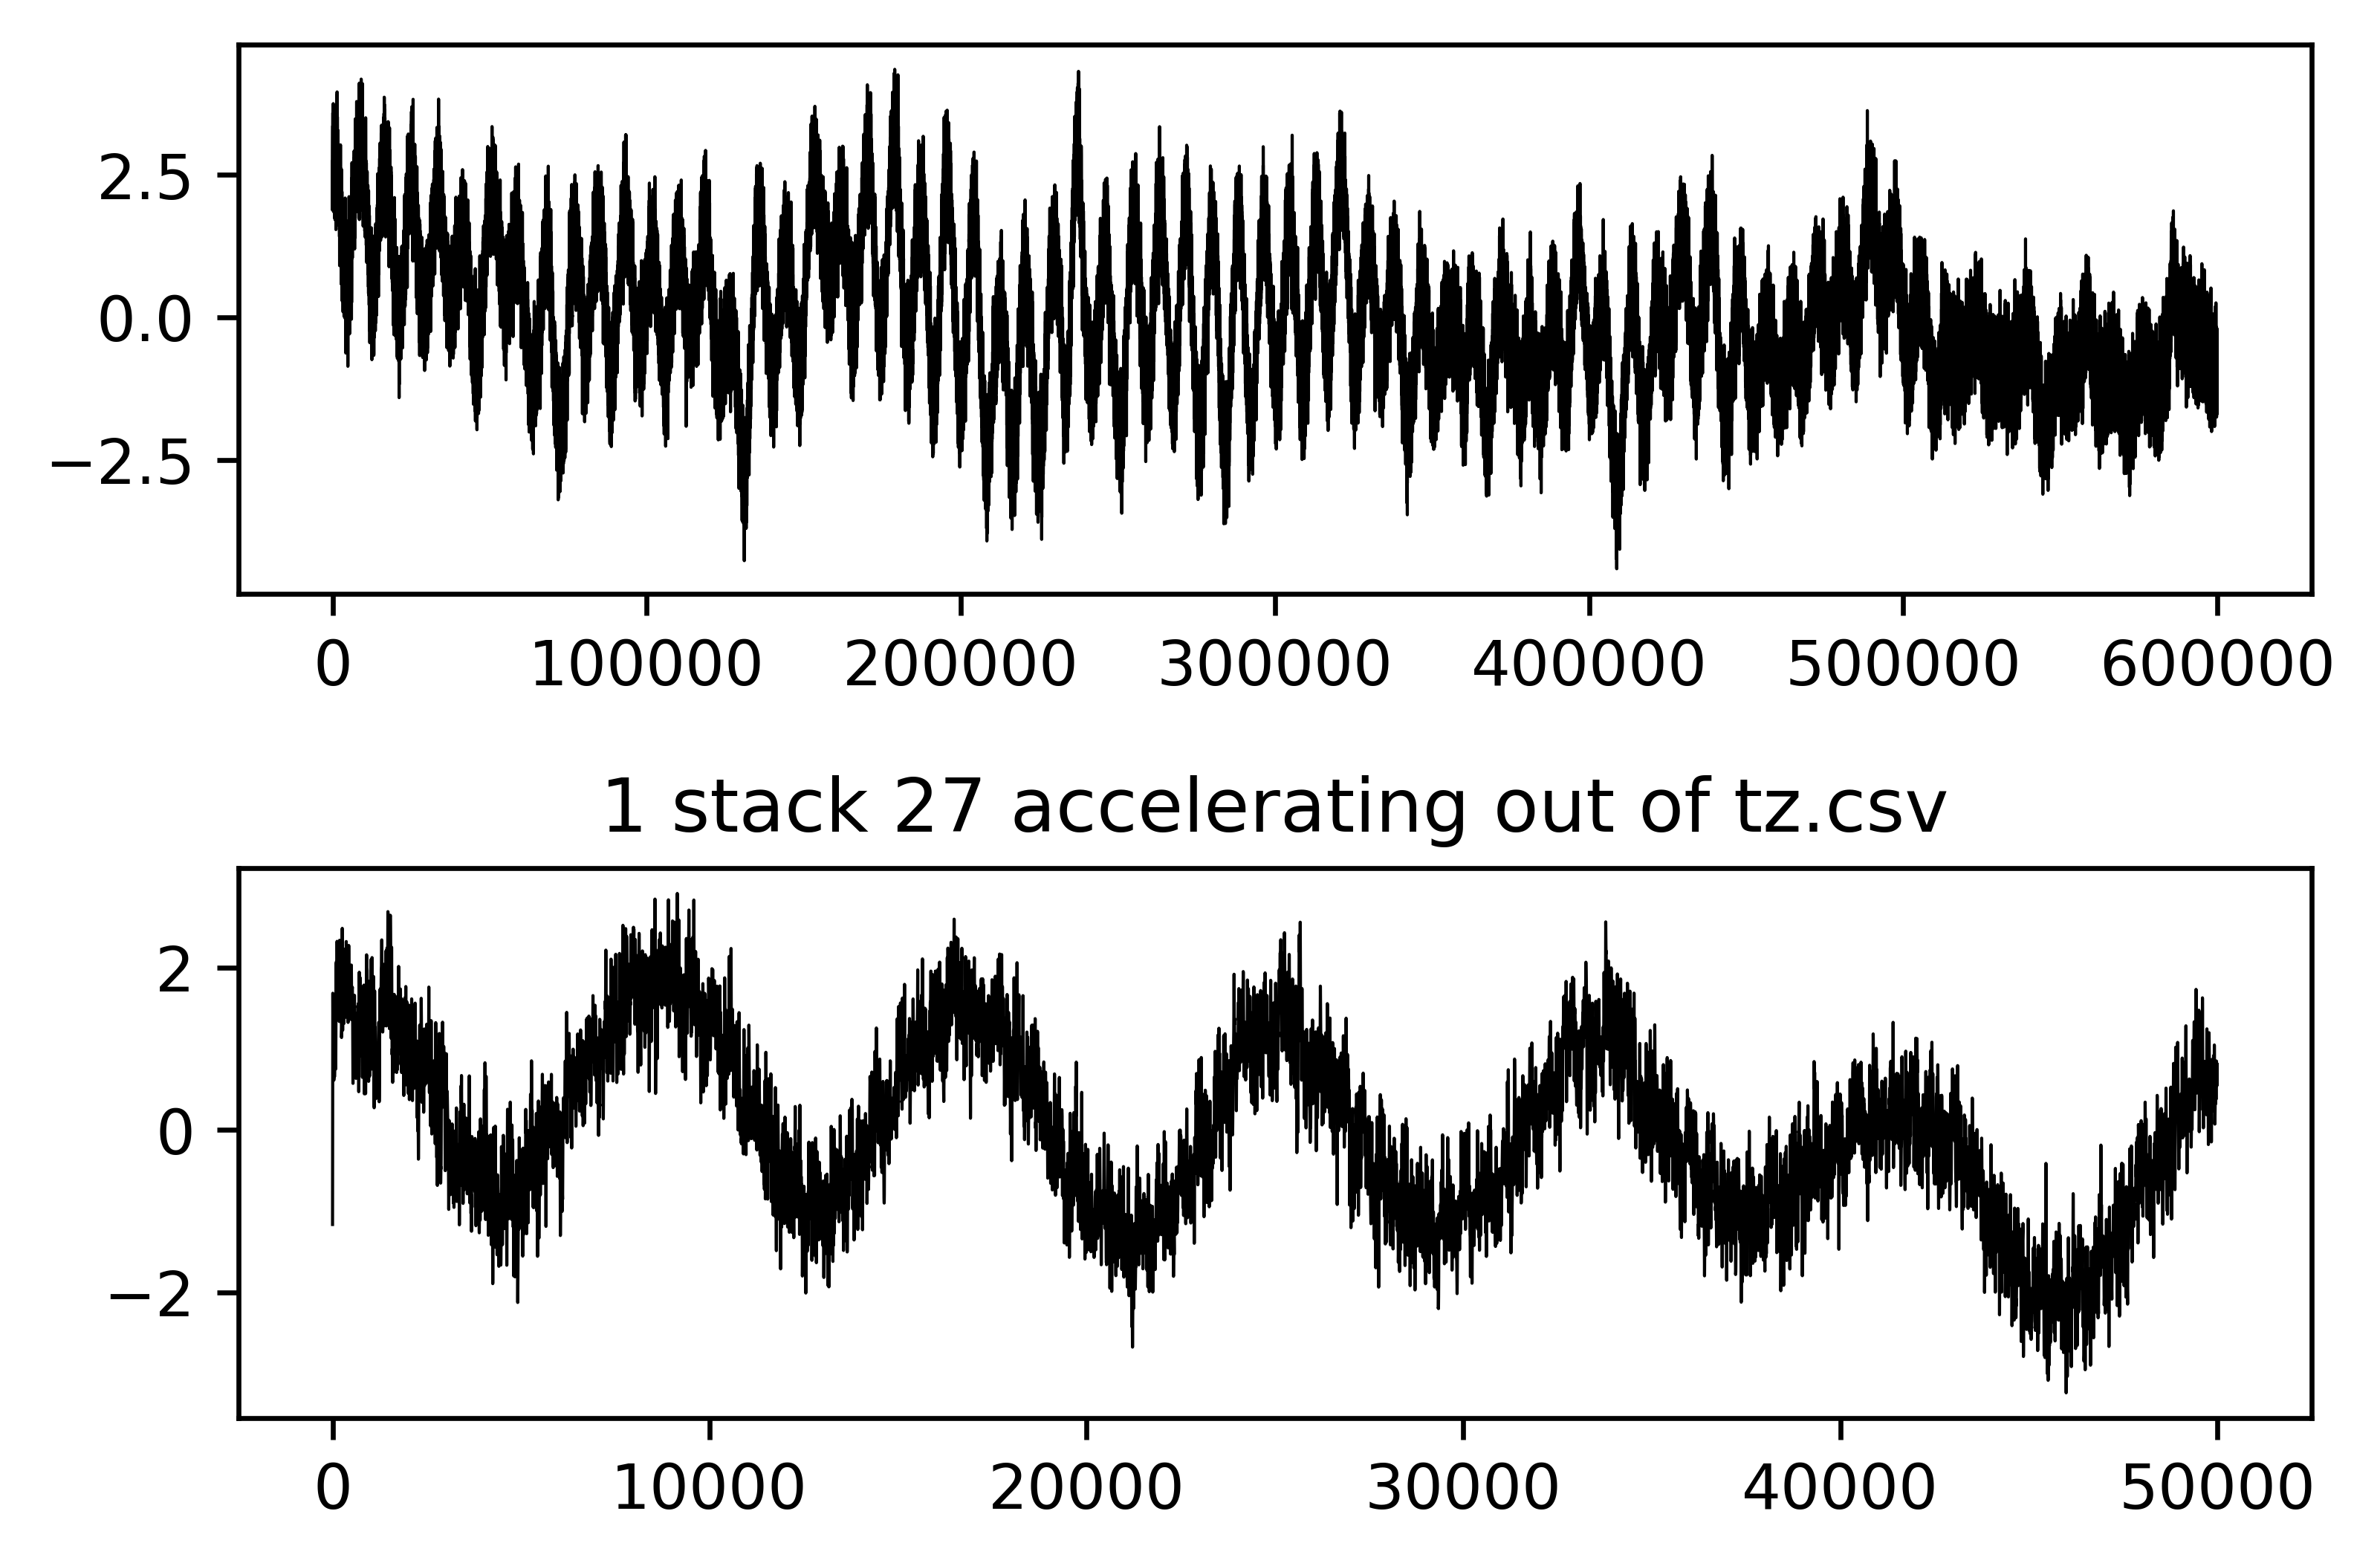

In [18]:
Cdiff = focusArea(1,start,end)

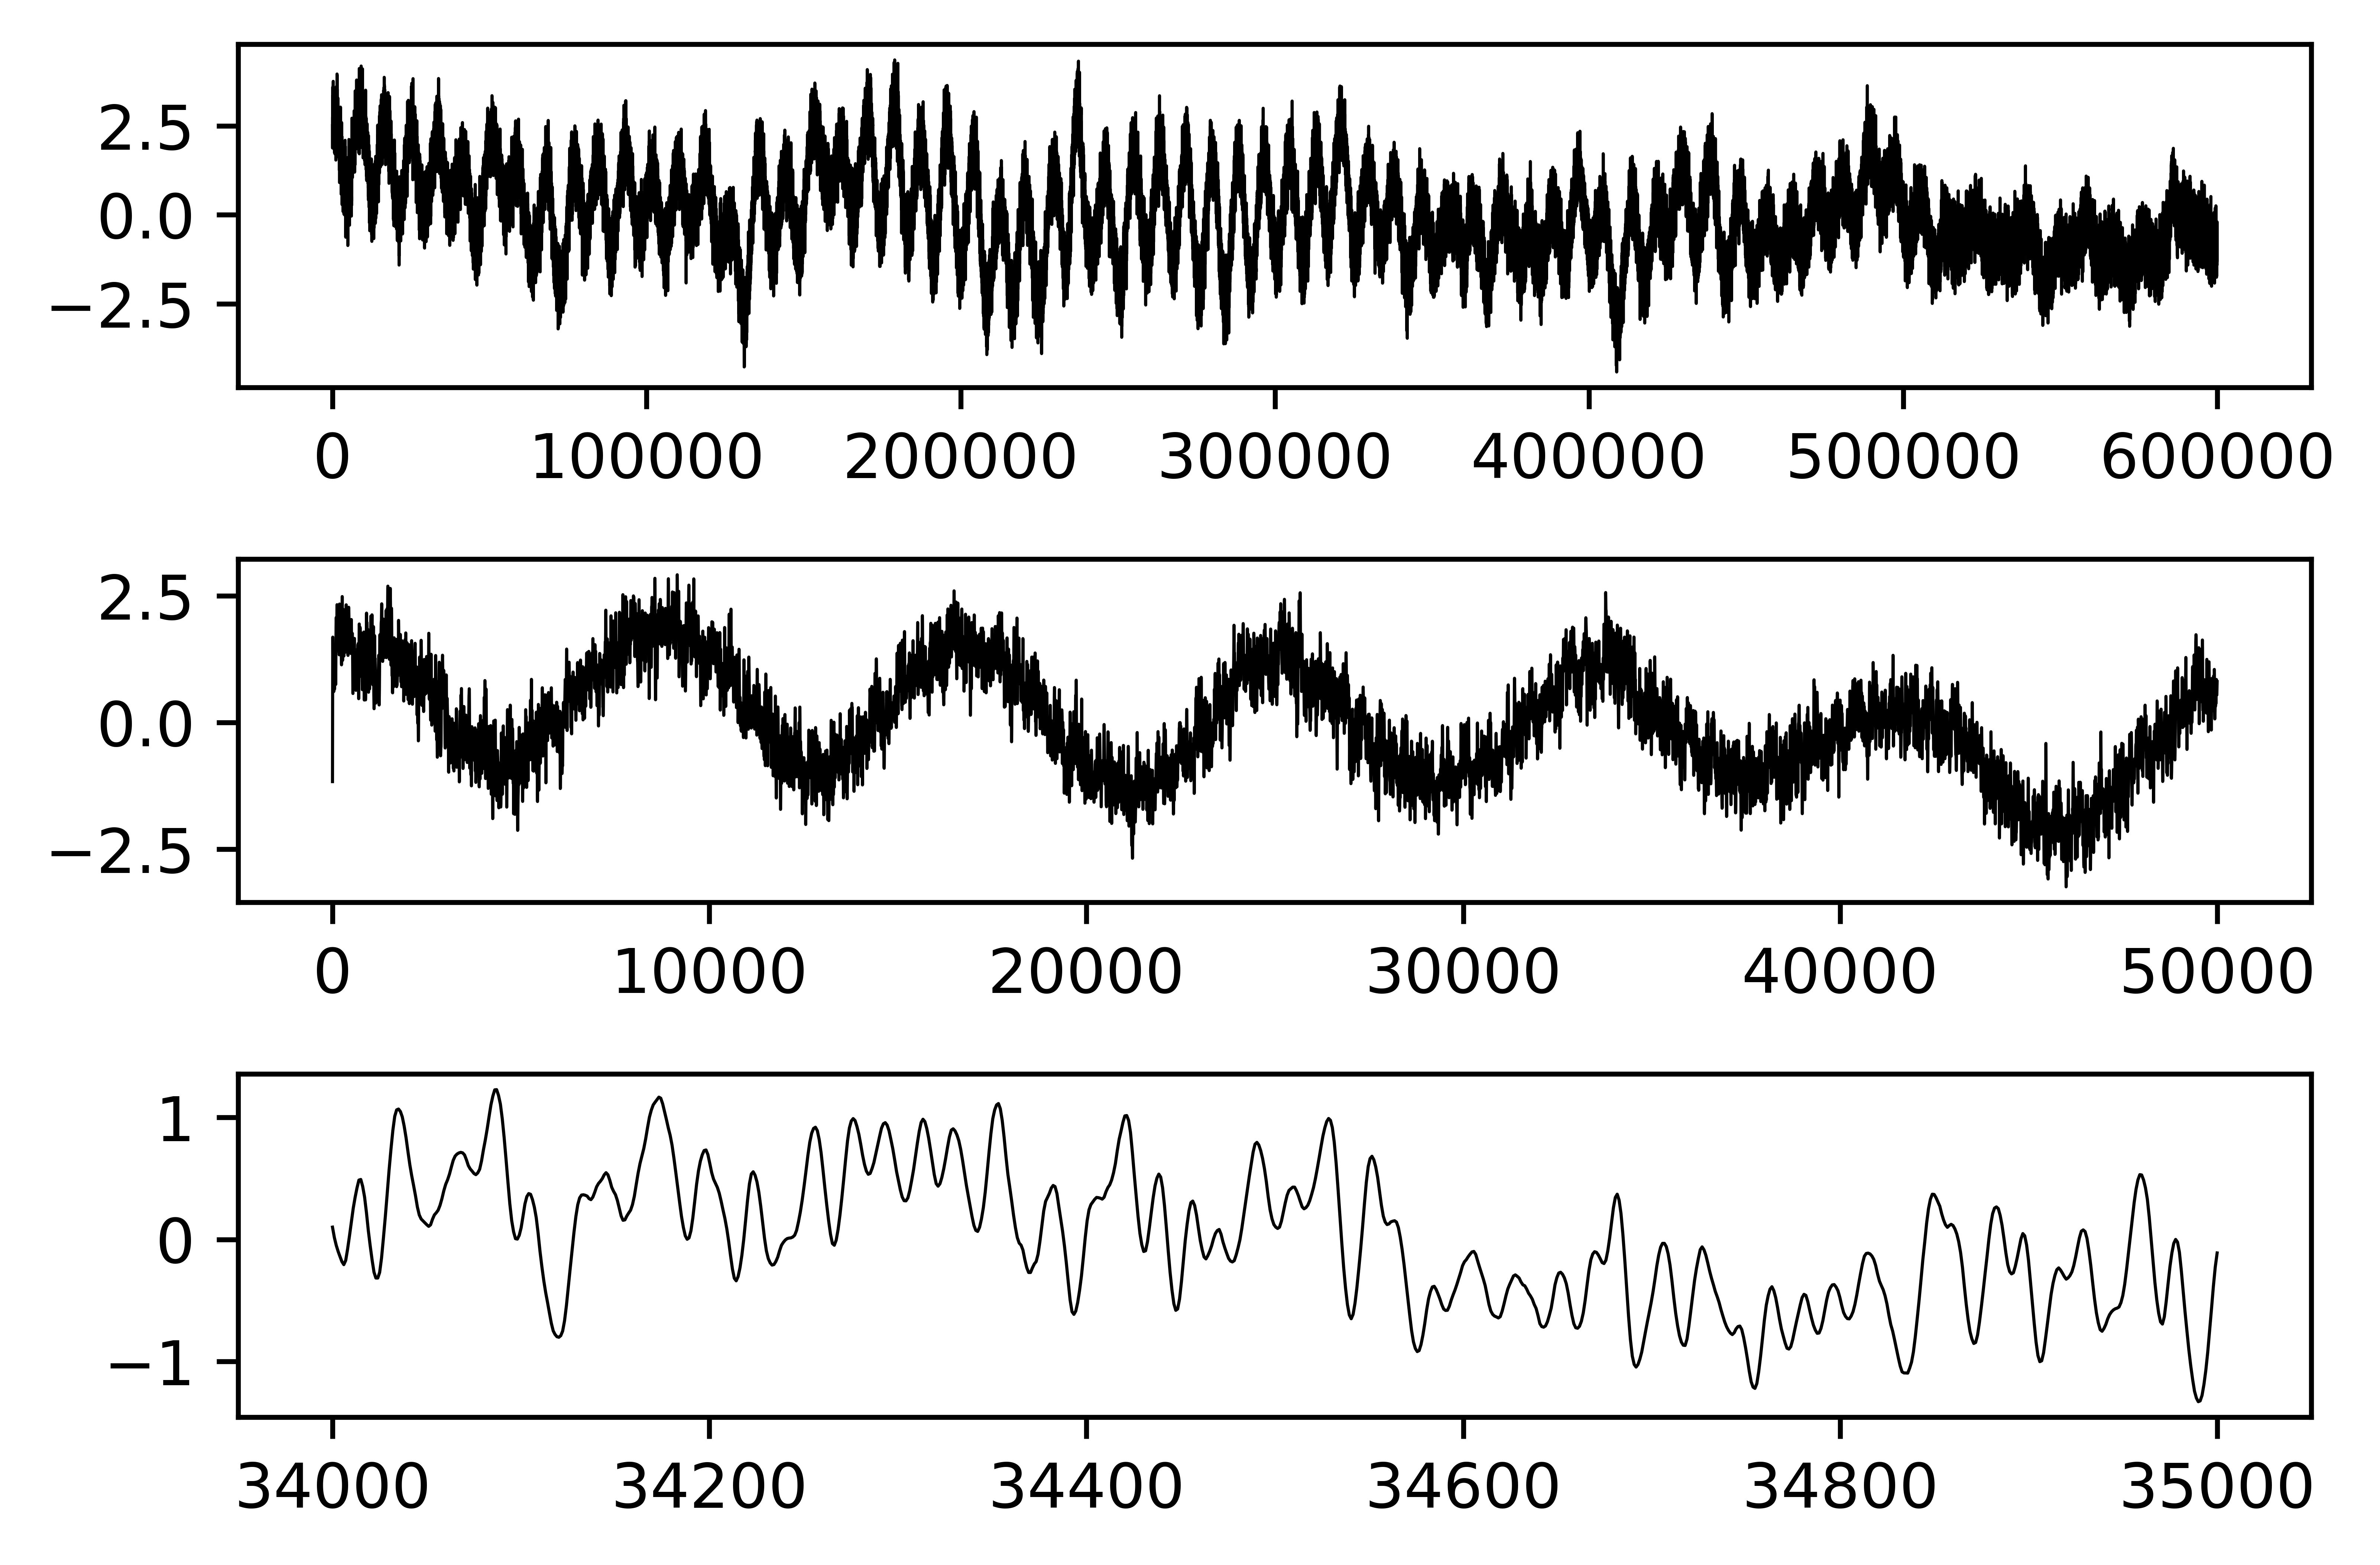

In [19]:
start = 0
end = 50000
sstart = 34000
eend = 35000

fig,axs = plt.subplots(3,figsize=(6,4), dpi=1200)
plt.subplots_adjust(hspace=0.5)
#plt.title(str(f)+' ' + file)
axs[0].plot(Cdiff[25:-50], linewidth=0.5)
axs[1].plot(np.linspace(start,end,end-start),Cdiff[start:end]-np.average(Cdiff[start:end]), linewidth=0.5)
axs[2].plot(np.linspace(sstart,eend,eend-sstart),Cdiff[sstart:eend]-np.average(Cdiff[sstart:eend]), linewidth=0.5)
plt.show()


/local/scr/dchendrickson01/TMPDIR/ipykernel_156186/910686761.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_xticklabels(axs[j].get_xticks(),fontsize=5)
/local/scr/dchendrickson01/TMPDIR/ipykernel_156186/910686761.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_yticklabels(axs[j].get_yticks(),fontsize=5)


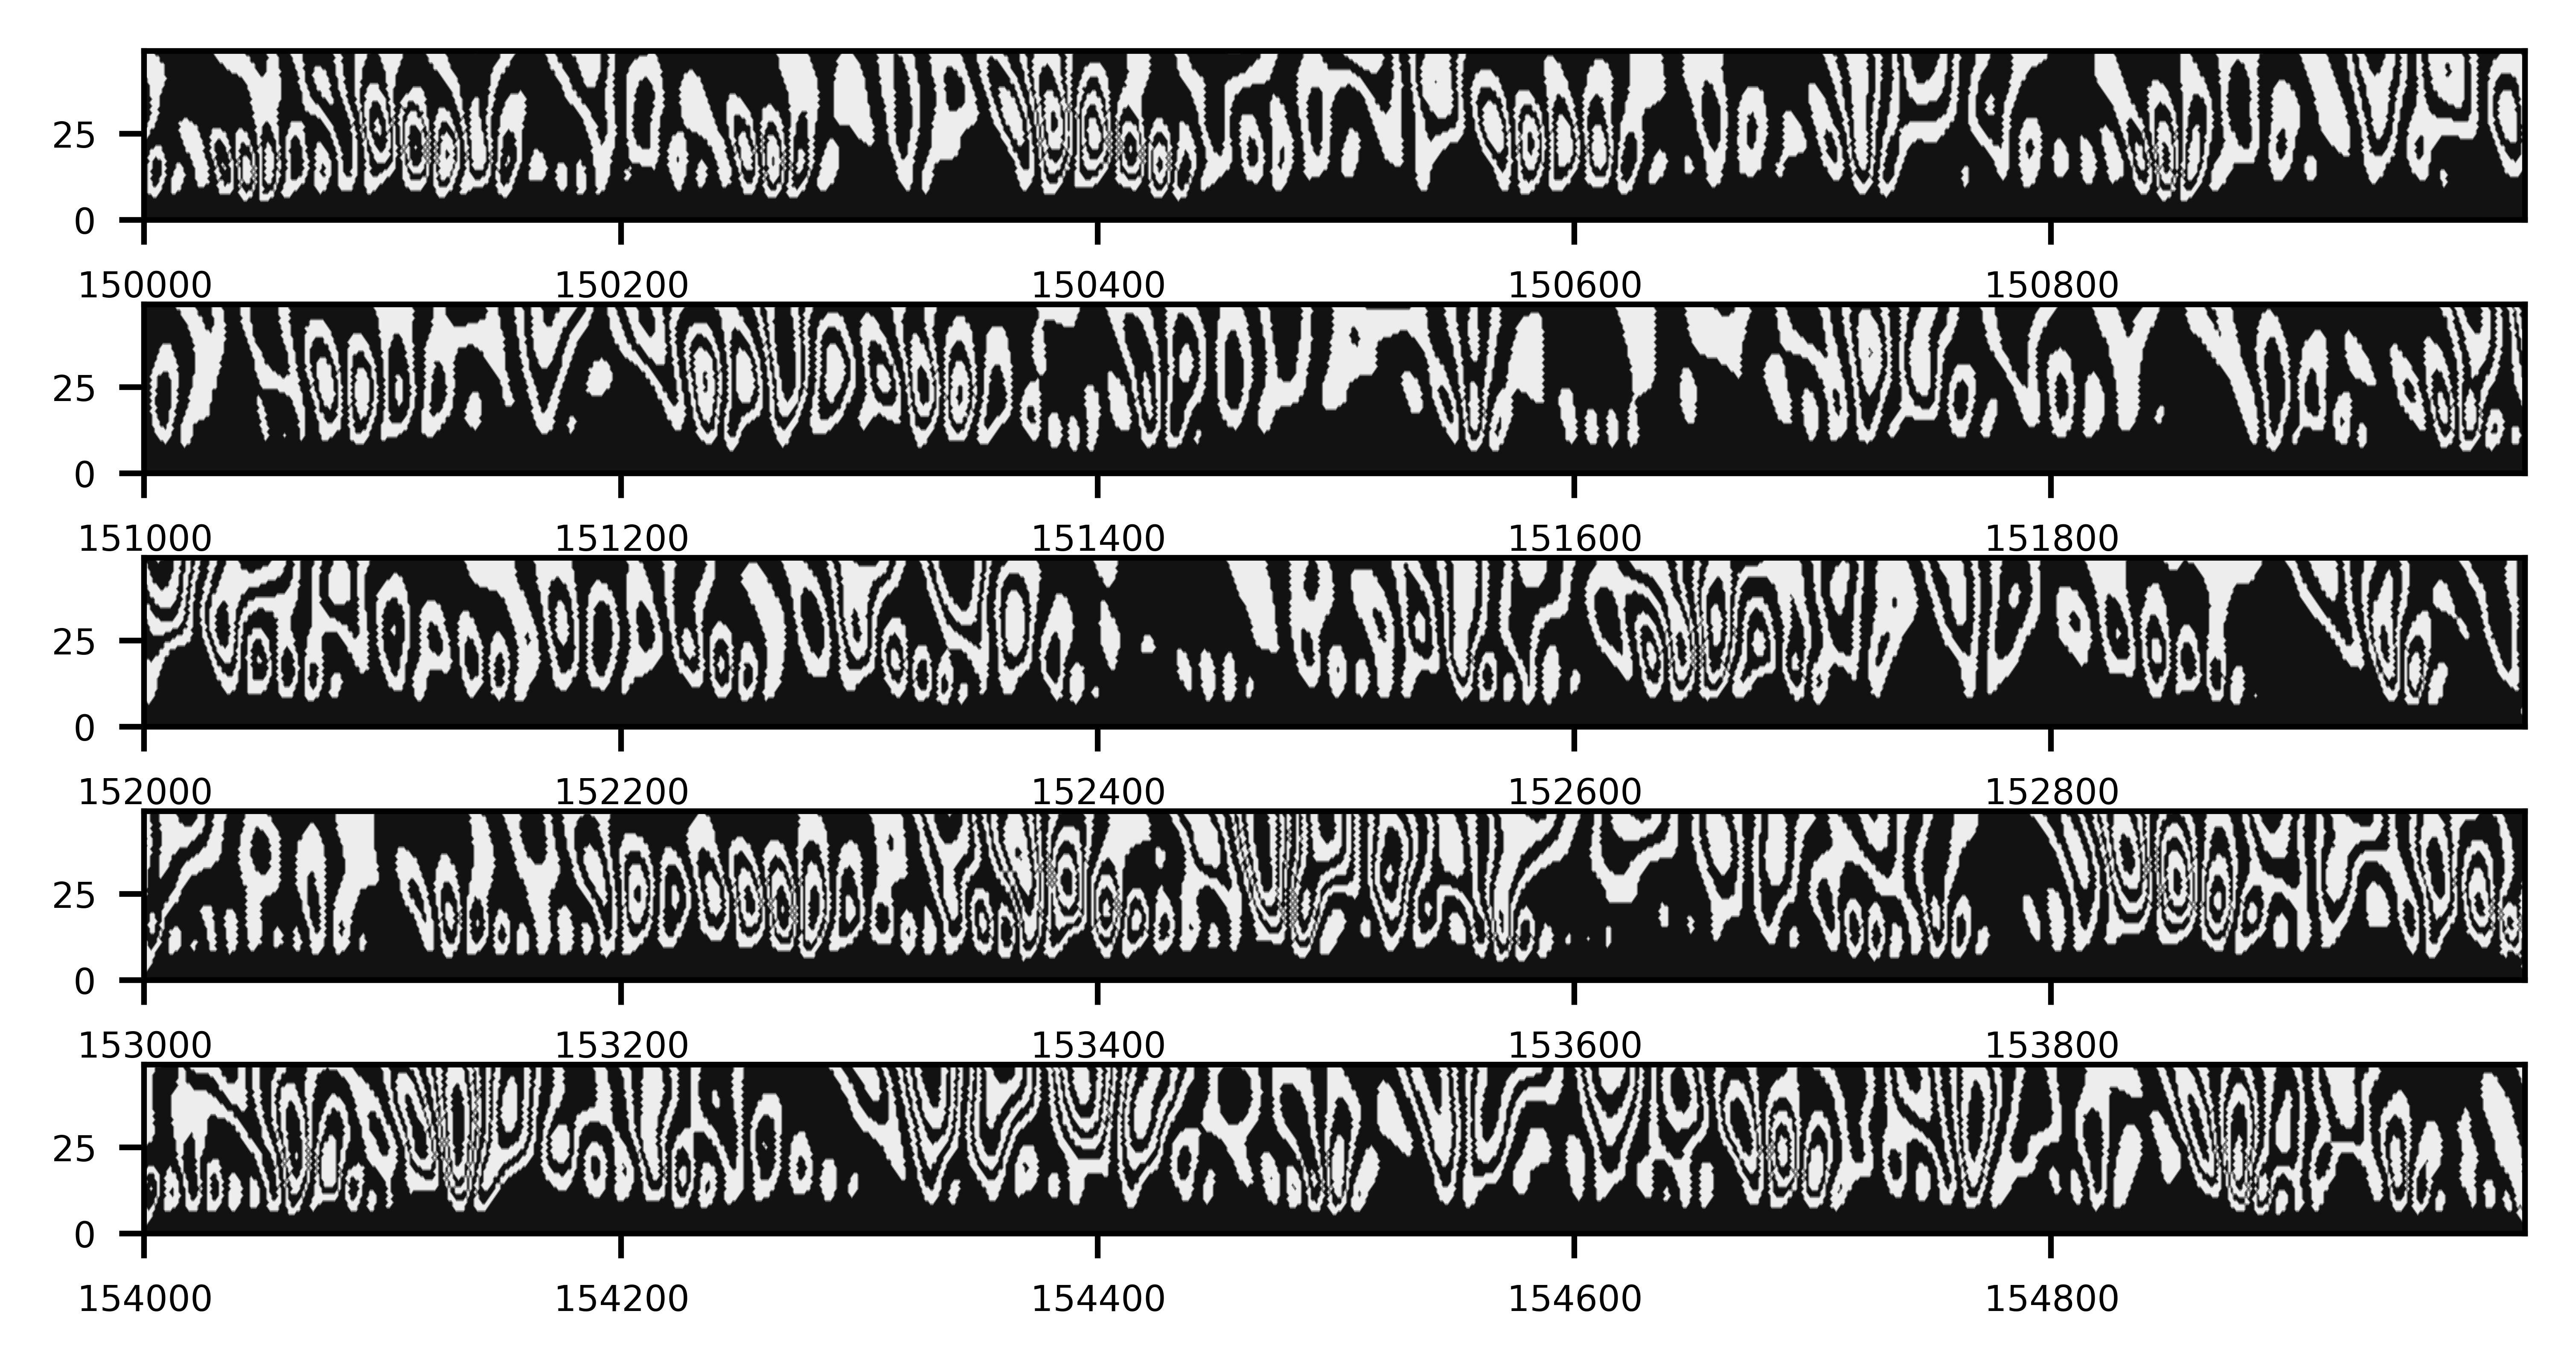

In [20]:
focusRanges(Cdiff, 150000)

In [ ]:
h = fineFocus(Cdiff, 34000,800)

In [ ]:
h.shape

In [ ]:
X = np.arange(34820,34885)
Y = np.arange(0,50)
fig = plt.figure(figsize=(10,3), dpi=600)
plt.contourf(X,Y,h[:,20:85], cmap='gist_gray')
#plt.title(str(start))
plt.show()


In [ ]:
h =fineFocus(Cdiff, 229000,400)

In [ ]:
X = np.arange(229489,229540)
Y = np.arange(0,50)
fig = plt.figure(figsize=(10,4), dpi=600)
plt.contourf(X,Y,h[:,89:140], cmap='gist_gray')
#plt.title(str(start))
plt.show()


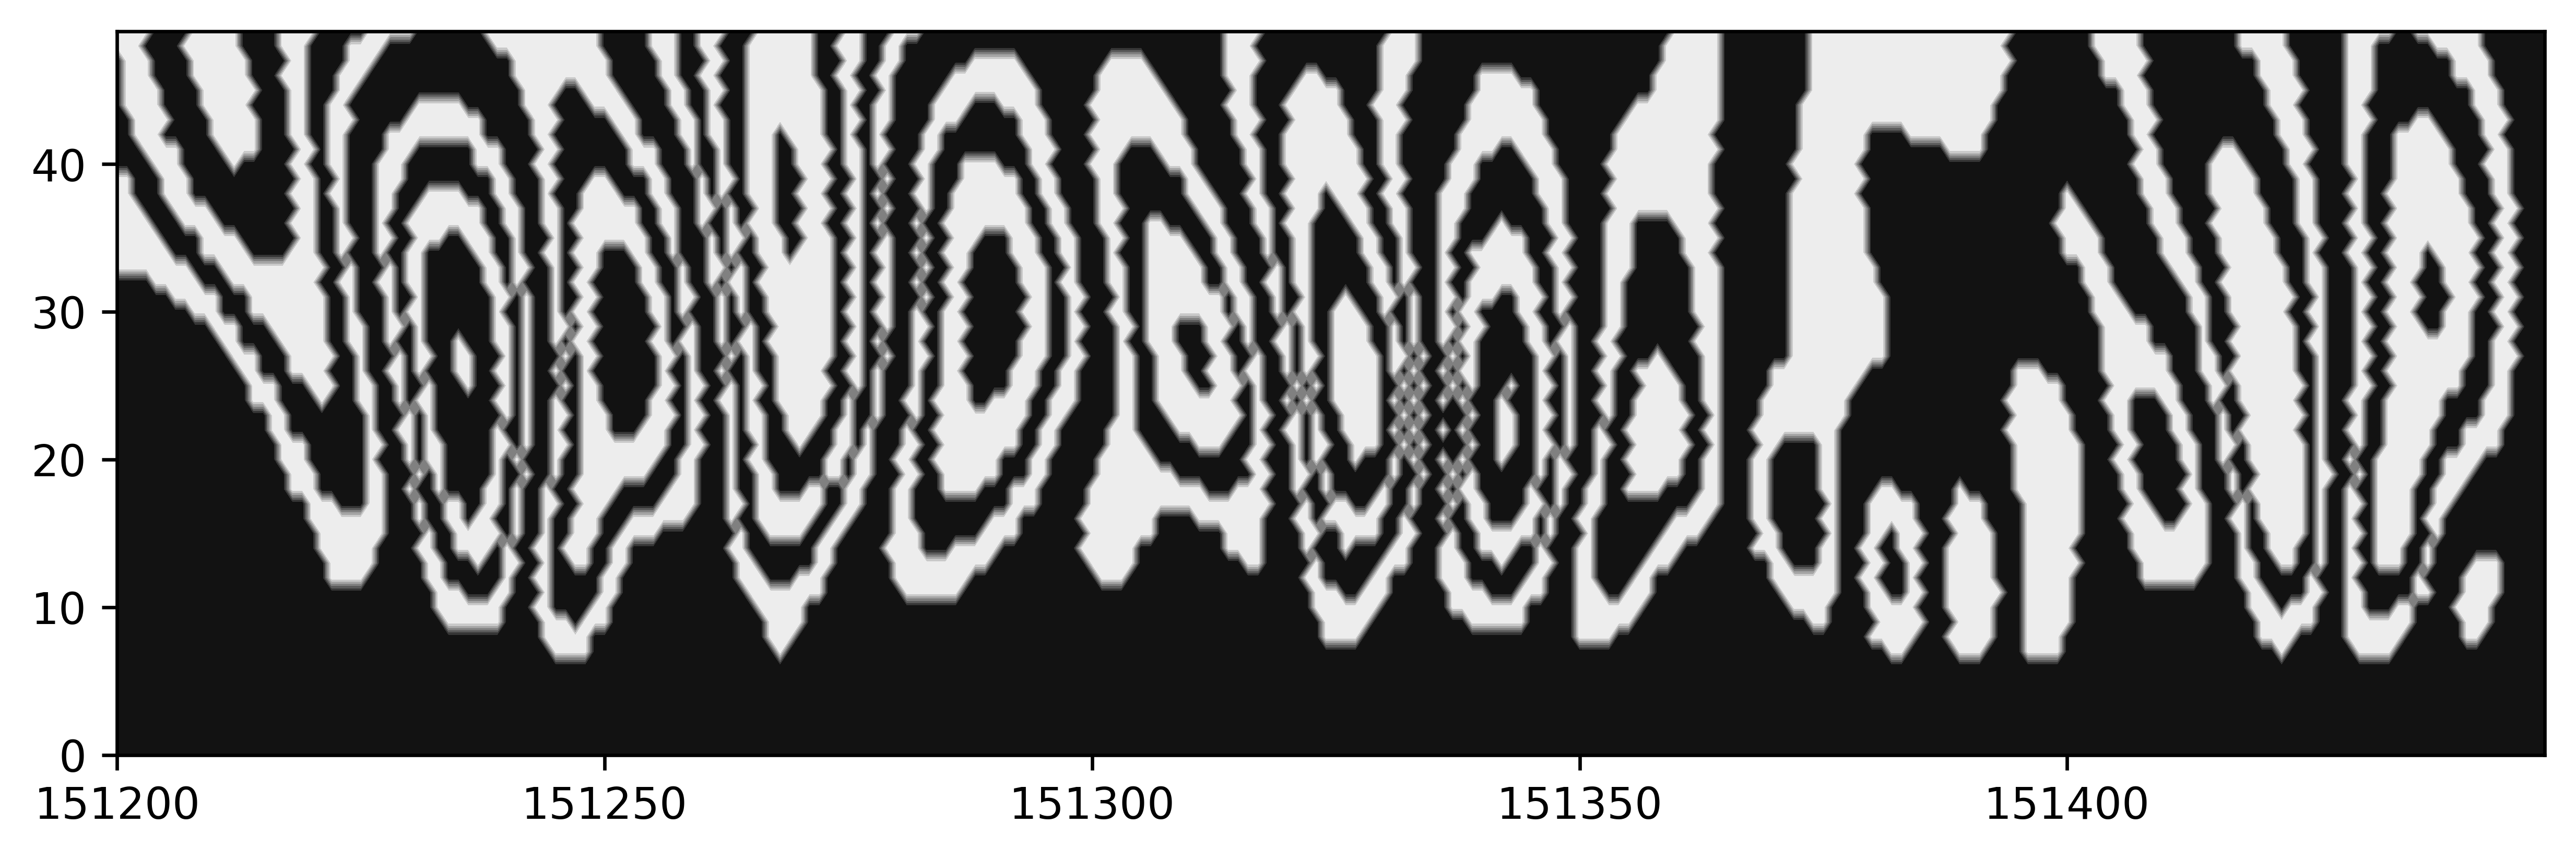

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])

In [21]:
fineFocus(Cdiff, 151000,200)

## File Search 2

In [ ]:
start = 250000
end = 300000

In [ ]:
Cdiff = focusArea(4,start,end)

In [ ]:
focusRanges(Cdiff, 361000)

In [ ]:
fineFocus(Cdiff, 578000,700)

In [ ]:
fineFocus(Cdiff, 367900,0)

In [ ]:
fineFocus(Cdiff, 368000,800)

## File Search 3

In [ ]:
start = 220000
end = 240000

In [ ]:
Cdiff = focusArea(5,start,end)

In [ ]:
focusRanges(Cdiff, 220000)

In [ ]:
fineFocus(Cdiff, 222000,850)

In [ ]:
fineFocus(Cdiff, 358000,600)

In [ ]:
fineFocus(Cdiff, 405000,400)

## File Search 4


In [ ]:
start = 475000
end = 525000

In [ ]:
Cdiff = focusArea(12,start,end)

In [ ]:
focusRanges(Cdiff, 500000)

In [ ]:
fineFocus(Cdiff, 317000,600)

In [ ]:
fineFocus(Cdiff, 263000,50)

In [ ]:
fineFocus(Cdiff, 503000,150)

## File Search 5


In [ ]:
start = 225000
end = 250000

In [ ]:
Cdiff = focusArea(14,start,end)

In [ ]:
focusRanges(Cdiff, 225000)

In [ ]:
fineFocus(Cdiff, 443000,800)

In [ ]:
fineFocus(Cdiff, 451000,550)

In [ ]:
fineFocus(Cdiff, 229000,450)

## File Search 6

In [ ]:
start = 400000
end = 450000

In [ ]:
Cdiff = focusArea(30,start,end)

In [ ]:
focusRanges(Cdiff, 105000)

In [ ]:
fineFocus(Cdiff, 106000,300)

In [ ]:
fineFocus(Cdiff, 402000,750)

In [ ]:
fineFocus(Cdiff, 226000,300)

## File Search 7

In [ ]:
start = 140000
end  =  160000

In [ ]:
Cdiff = focusArea(13,start,end)

In [ ]:
focusRanges(Cdiff, 140000)

In [ ]:
focusRanges(Cdiff, 140000, Wvlt = 'gaus7')

In [ ]:
a= focusRanges(Cdiff, start, 200, 'db3', 5, 5000)

In [ ]:
fineFocus(Cdiff, 143000,660)

In [ ]:
focusRanges(Cdiff, 200000)

In [ ]:
fineFocus(Cdiff, 200000,175)

In [ ]:
fineFocus(Cdiff, 201000,800)

In [ ]:
focusRanges(Cdiff, 290000)

In [ ]:
fineFocus(Cdiff, 290000,750)

## File Search 8

In [22]:
start = 500000
end  =  600000

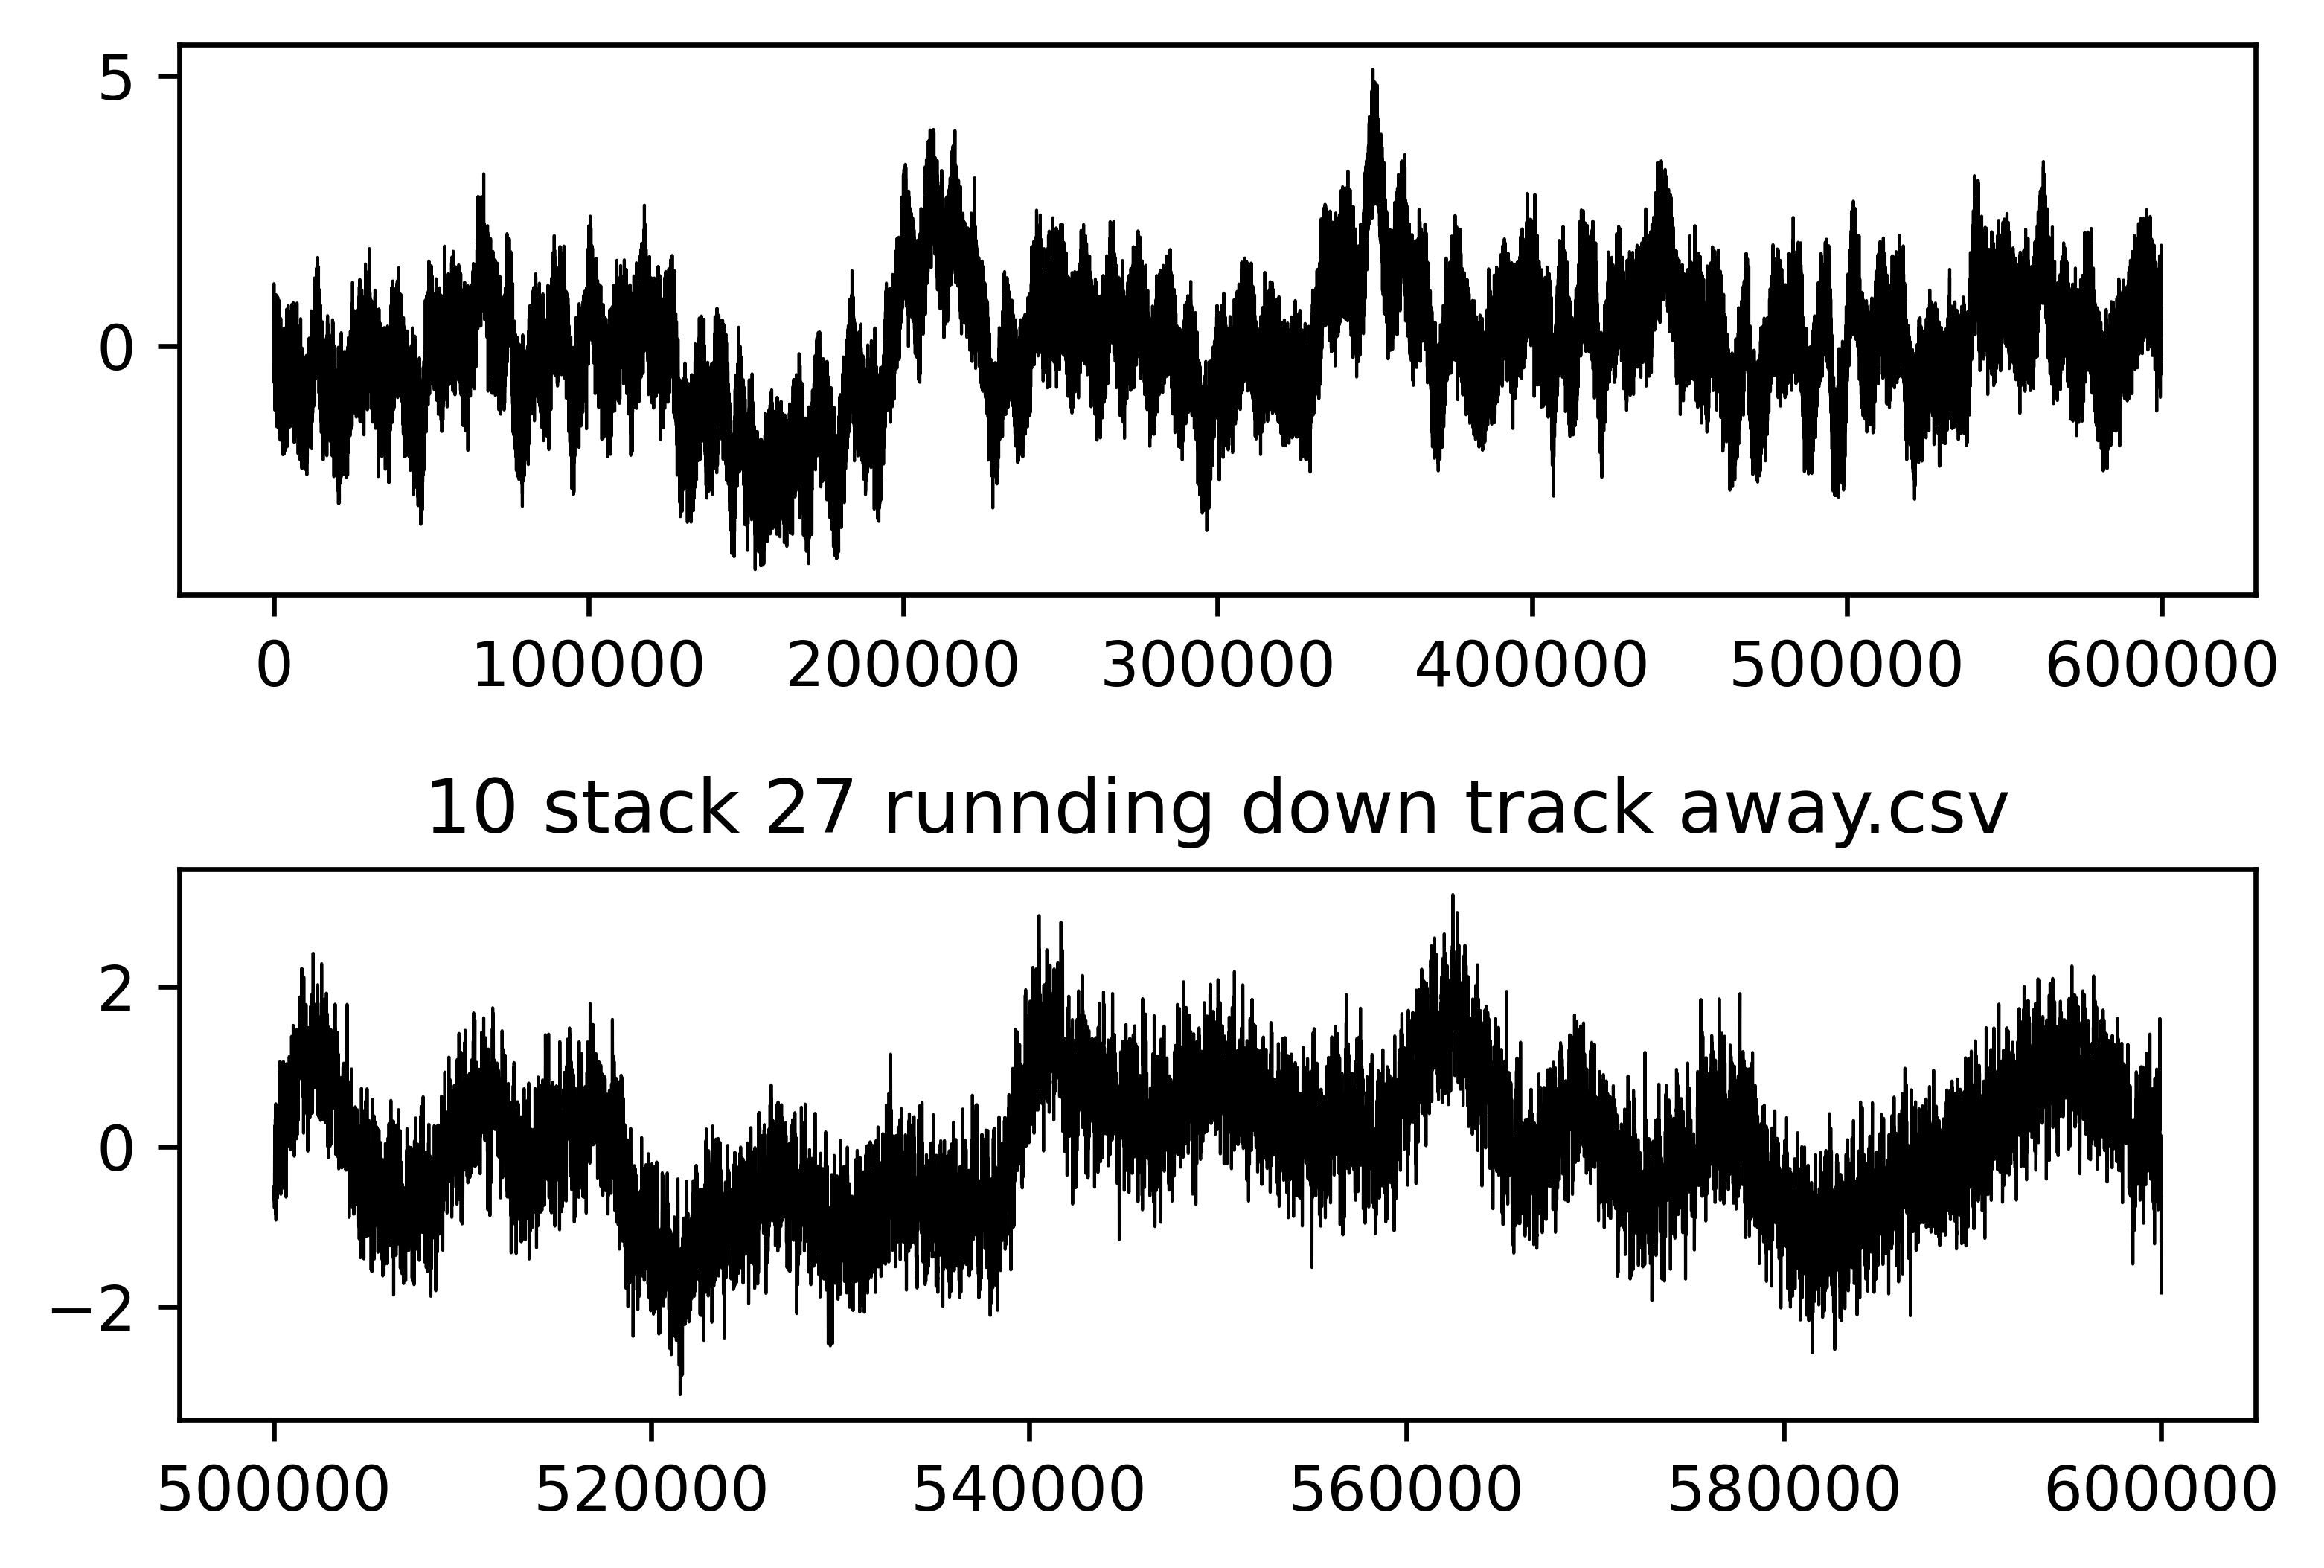

In [23]:
Cdiff = focusArea(10,start,end)

/local/scr/dchendrickson01/TMPDIR/ipykernel_156186/910686761.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_xticklabels(axs[j].get_xticks(),fontsize=5)
/local/scr/dchendrickson01/TMPDIR/ipykernel_156186/910686761.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_yticklabels(axs[j].get_yticks(),fontsize=5)


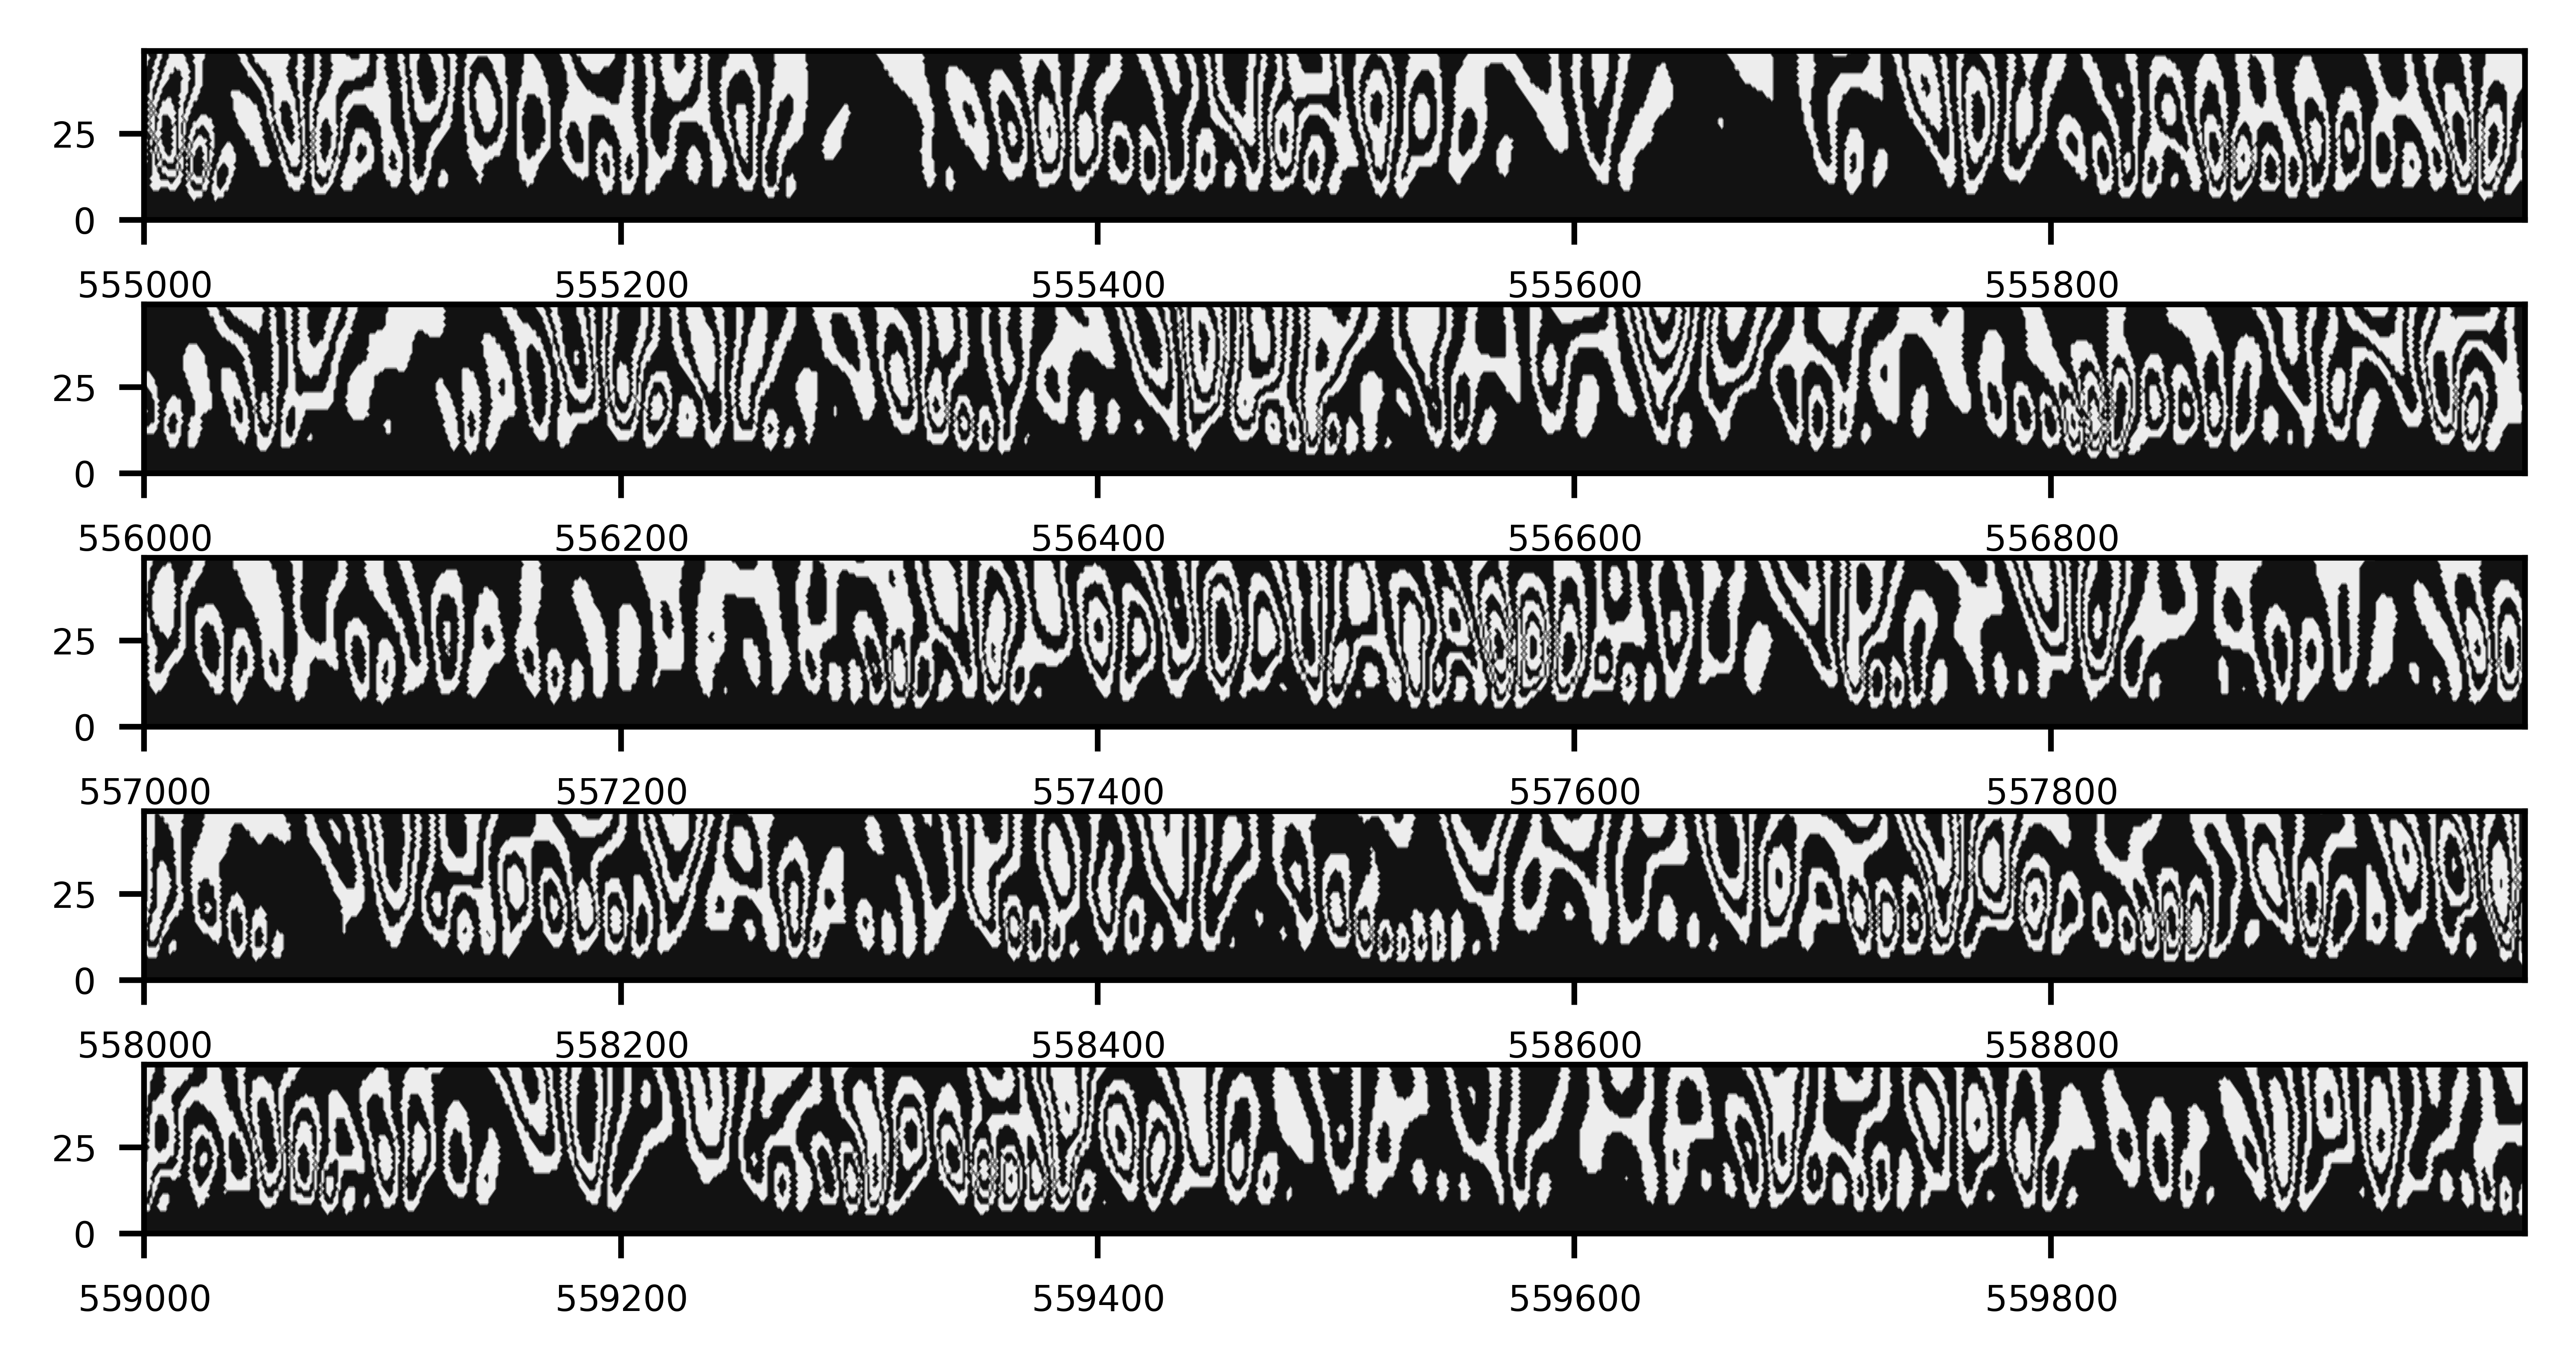

In [24]:
focusRanges(Cdiff, 555000)

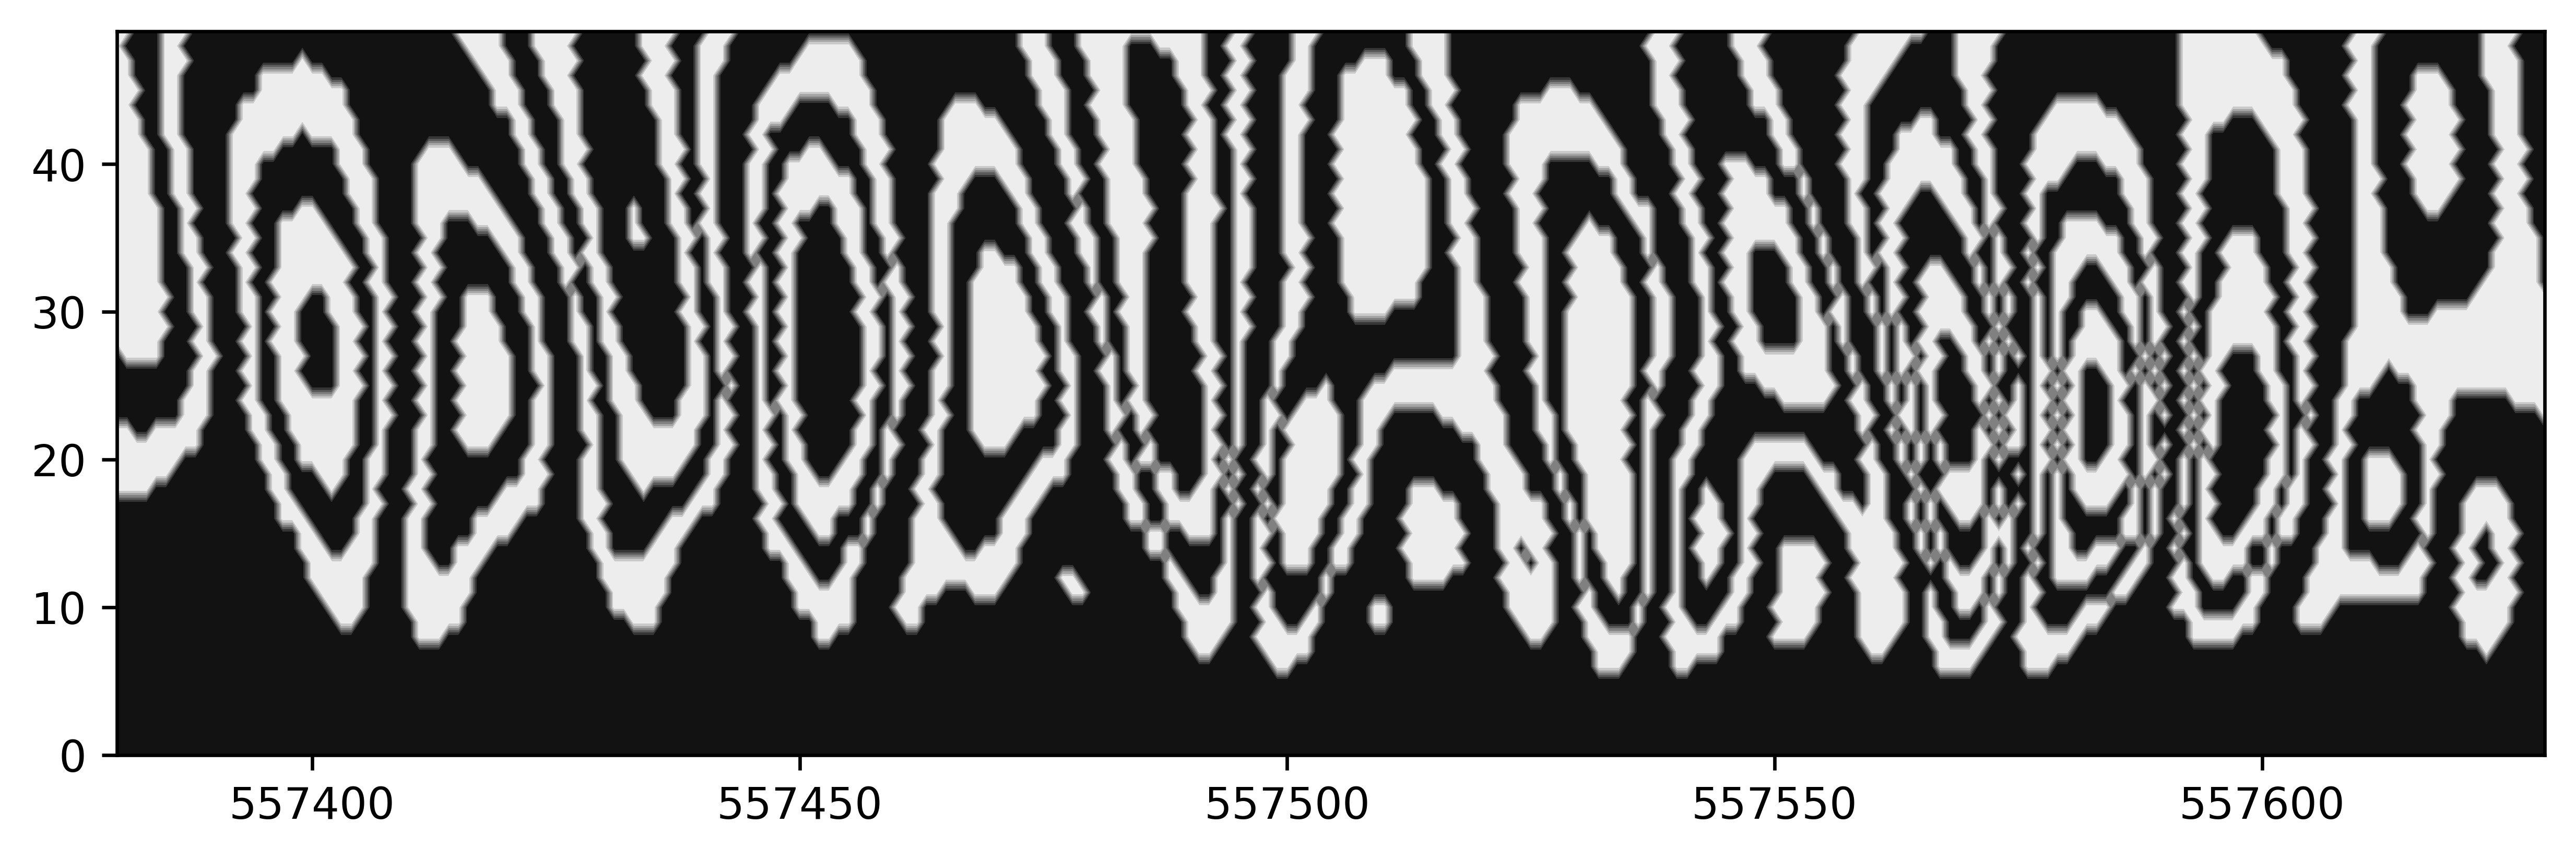

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0]])

In [25]:
fineFocus(Cdiff, 557000,380)